**Прогнозирование рентабельности стартапов: анализ и моделирование**

**Заголовок:**
"Прогнозирование рентабельности стартапов: анализ и моделирование"

**Краткое описание:**
Данный проект направлен на создание моделей, способных прогнозировать рентабельность стартапов. Мы анализируем данные о стартапах, функционировавших с 1980 по 2018 годы, чтобы определить, какие из них закроются, а какие продолжат успешную деятельность. 

**План действий:**
1. **Загрузка и ознакомление с данными:**
   - Получение данных о стартапах.
   - Изучение структуры данных, оценка качества и целей проекта.

2. **Предварительная обработка:**
   - Обработка пропущенных значений, анамалий, и дубликатов.

3. **Исследовательский анализ:**
   - Визуализация распределений признаков.
   - Исследование корреляций между признаками.
   - Проверка на мультиколлинеарность

4. **Разработка новых синтетических признаков:**
   - Создание новых признаков на основе имеющихся данных.

5. **Отбор финального набора обучающих признаков:**
   - Выбор наиболее значимых признаков для модели.

6. **Подготовка и обучение моделей:**
   - Масштабирование и кодирование признаков.
   - Обучение моделей на обучающих данных.

7. **Итоговая оценка качества предсказания лучшей модели:**
   - Оценка точности и других метрик моделей.

8. **Анализ важности признаков:**
   - Определение влияния каждого признака на предсказание.

9. **Подготовка отчета по исследованию:**
    - Составление отчета с результатами и выводами.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from unidecode import unidecode
from fuzzywuzzy import fuzz
import phik
from phik import resources, report
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, FunctionTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from optuna.integration import OptunaSearchCV
import optuna
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Загрузка и ознакомление с данными

                     name                          category_list  \
0               Lunchgate        Online Reservations|Restaurants   
1                 EarLens  Manufacturing|Medical|Medical Devices   
2  Reviva Pharmaceuticals                          Biotechnology   
3    Sancilio and Company                            Health Care   
4     WireTough Cylinders                          Manufacturing   

   funding_total_usd     status country_code state_code       region  \
0           828626.0  operating          CHE         25       Zurich   
1         42935019.0  operating          USA         CA  SF Bay Area   
2         35456381.0  operating          USA         CA  SF Bay Area   
3         22250000.0  operating          NaN        NaN          NaN   
4                NaN  operating          USA         VA   VA - Other   

           city  funding_rounds  founded_at first_funding_at last_funding_at  \
0        Zürich               2  2010-06-24       2011-05-01      2014-12-01  

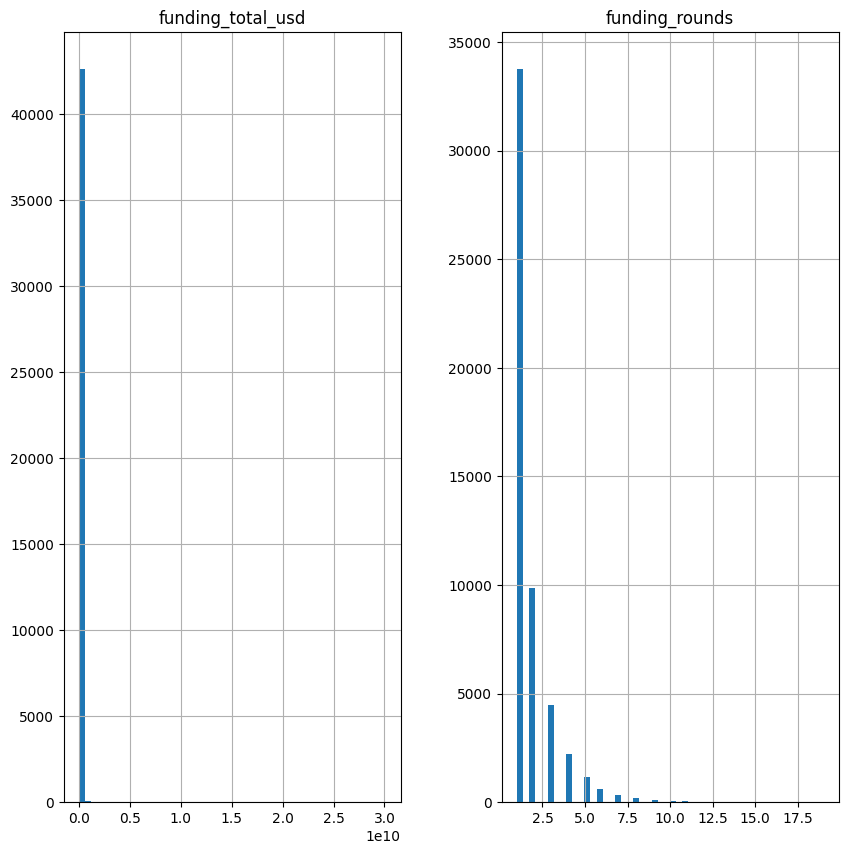

In [2]:
# Загрузка данных
df = pd.read_csv('kaggle_startups_train_01.csv')
df_test = pd.read_csv('kaggle_startups_test_01.csv')
# Просмотр первых 5 строк данных
print(df.head())

# Использование метода info
print(df.info())

# Основная статистика
print(df.describe())

# График распределения для каждого числового признака
df.hist(figsize=(10, 10), bins=50)
plt.show()

1. **Обзор данных**:
    - В таблице представлены стартапы с различными характеристиками.
    - Каждая строка соответствует отдельному стартапу.
    - Всего в данных **52879 записей**.

2. **Основные признаки**:
    - **name**: Название стартапа.
    - **category_list**: Категории, к которым относится стартап.
    - **funding_total_usd**: Общий объем финансирования в долларах США.
    - **status**: Статус стартапа (целевой)(например, "operating", "closed").
    - **country_code**: Код страны.
    - **state_code**: Код штата (если применимо).
    - **region**: Регион, где находится стартап.
    - **city**: Город, где находится стартап.
    - **funding_rounds**: Количество раундов финансирования.
    - **founded_at**: Дата основания стартапа.
    - **first_funding_at**: Дата первого финансирования.
    - **last_funding_at**: Дата последнего финансирования.
    - **closed_at**: Дата закрытия (если применимо).

3. **Пропущенные значения**:
    - Некоторые признаки имеют пропущенные значения (например, **category_list**, **country_code**, **state_code**, **region**, **city**, **funding_total_usd**, **closed_at**).
    - Необходимо рассмотреть, как обрабатывать эти пропущенные значения.

4. **Статистика**:
    - Средний объем финансирования составляет **$18,930,590**.
    - Среднее количество раундов финансирования - **1.74**.

5. **График распределения**:
    - График показывает распределение числовых признаков.
    - Можно увидеть, какие значения преобладают и как они распределены.

**Вывод**: Данные содержат информацию о стартапах, и для дальнейшего анализа необходимо обратить внимание на пропущенные значения и провести более детальное исследование каждого признака. 🚀

# Предварительная обработка

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52879 entries, 0 to 52878
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52878 non-null  object 
 1   category_list      50374 non-null  object 
 2   funding_total_usd  42753 non-null  float64
 3   status             52879 non-null  object 
 4   country_code       47351 non-null  object 
 5   state_code         46082 non-null  object 
 6   region             46489 non-null  object 
 7   city               46489 non-null  object 
 8   funding_rounds     52879 non-null  int64  
 9   founded_at         52879 non-null  object 
 10  first_funding_at   52858 non-null  object 
 11  last_funding_at    52879 non-null  object 
 12  closed_at          4962 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


In [4]:
# Проверка на дубликаты
duplicates = df.duplicated()
print(f'Количество дубликатов: {duplicates.sum()}')
if duplicates.sum() > 0:
    print('Дубликаты:')
    display(df[duplicates])

Количество дубликатов: 0


In [5]:
for col in df.columns:
    missing = df[col].isnull().sum()
    print(f'Количество пропусков в столбце {col}: {missing}')
    if missing > 0:
        print('Пропуски:')
        display(df[df[col].isnull()])


Количество пропусков в столбце name: 1
Пропуски:


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
3321,NaN,Startups,25000.0,closed,USA,OR,"Portland, Oregon",Portland,1,2011-10-01,2012-03-01,2012-03-01,2013-12-12


Количество пропусков в столбце category_list: 2505
Пропуски:


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
12,Iberic Premium,NaN,107239.0,closed,NaN,NaN,NaN,NaN,1,2013-10-07,2014-06-01,2014-06-01,2015-12-23
16,Salesjob,NaN,NaN,closed,NaN,NaN,NaN,NaN,1,2013-01-01,2013-10-22,2013-10-22,2015-09-26
24,Savasti,NaN,NaN,closed,NaN,NaN,NaN,NaN,1,2015-01-01,2015-01-01,2015-01-01,2016-03-19
26,The Center from Health Promotion,NaN,10000000.0,operating,NaN,NaN,NaN,NaN,1,2003-03-03,2003-11-12,2003-11-12,NaN
48,Daniel's Jewelers,NaN,NaN,operating,USA,CA,Los Angeles,Culver City,1,1948-01-01,2014-11-24,2014-11-24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52767,Beach Bum,NaN,NaN,closed,NaN,NaN,NaN,NaN,1,2014-08-11,2015-05-18,2015-05-18,2017-03-22
52782,"iSend, LLC",NaN,NaN,closed,NaN,NaN,NaN,NaN,1,2007-01-01,2008-05-28,2008-05-28,2010-01-20
52830,Thermal Nomad,NaN,NaN,operating,USA,TX,Houston,Houston,1,2014-04-20,2014-05-28,2014-05-28,NaN
52836,Vision Software PTY,NaN,15000000.0,operating,NaN,NaN,NaN,NaN,1,1998-07-27,1999-11-02,1999-11-02,NaN


Количество пропусков в столбце funding_total_usd: 10126
Пропуски:


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-07-30,2012-02-01,2012-02-01,NaN
10,Indie Vinos,Software,NaN,operating,USA,OR,"Portland, Oregon",Portland,1,2009-01-01,2013-04-21,2013-04-21,NaN
16,Salesjob,NaN,NaN,closed,NaN,NaN,NaN,NaN,1,2013-01-01,2013-10-22,2013-10-22,2015-09-26
24,Savasti,NaN,NaN,closed,NaN,NaN,NaN,NaN,1,2015-01-01,2015-01-01,2015-01-01,2016-03-19
25,Brightree,Software,NaN,operating,USA,GA,Atlanta,Lawrenceville,1,2007-09-13,2008-07-15,2008-07-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52862,StockRadar,Finance|FinTech,NaN,operating,CHN,22,Beijing,Beijing,3,2011-01-01,2011-12-01,2015-09-22,NaN
52865,Zura!,E-Commerce,NaN,operating,BRA,27,BRA - Other,Brasil,1,2006-06-03,2008-01-01,2008-01-01,NaN
52870,Proactive Comfort,Medical,NaN,operating,USA,MD,Baltimore,Centreville,1,2009-10-16,2011-01-20,2011-01-20,NaN
52871,ScramCard,NaN,NaN,operating,HKG,NaN,Hong Kong,Hong Kong,1,2013-01-01,2015-11-20,2015-11-20,NaN


Количество пропусков в столбце status: 0
Количество пропусков в столбце country_code: 5528
Пропуски:


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
3,Sancilio and Company,Health Care,2.225000e+07,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
12,Iberic Premium,NaN,1.072390e+05,closed,NaN,NaN,NaN,NaN,1,2013-10-07,2014-06-01,2014-06-01,2015-12-23
14,Purewine,Nanotechnology|Technology|Wine And Spirits,3.350000e+05,operating,NaN,NaN,NaN,NaN,2,2014-01-01,2014-08-28,2015-08-05,NaN
15,paack,Customer Service|Delivery|Retail,3.000000e+04,operating,NaN,NaN,NaN,NaN,1,2013-11-01,2015-02-01,2015-02-01,NaN
16,Salesjob,NaN,NaN,closed,NaN,NaN,NaN,NaN,1,2013-01-01,2013-10-22,2013-10-22,2015-09-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52807,Plix,Advertising|Digital Media|Games|Social Media|T...,4.000000e+05,closed,NaN,NaN,NaN,NaN,1,2011-01-01,2012-01-01,2012-01-01,2013-04-24
52812,ELabsEurope,Internet|Life Sciences|Medical,2.000000e+07,closed,NaN,NaN,NaN,NaN,1,1999-07-14,2000-10-23,2000-10-23,2002-08-22
52818,Capcom groupe,Construction|Optical Communications|Telecommun...,1.065315e+07,closed,NaN,NaN,NaN,NaN,1,2013-12-25,2015-09-29,2015-09-29,2016-12-30
52836,Vision Software PTY,NaN,1.500000e+07,operating,NaN,NaN,NaN,NaN,1,1998-07-27,1999-11-02,1999-11-02,NaN


Количество пропусков в столбце state_code: 6797
Пропуски:


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
3,Sancilio and Company,Health Care,2.225000e+07,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
12,Iberic Premium,NaN,1.072390e+05,closed,NaN,NaN,NaN,NaN,1,2013-10-07,2014-06-01,2014-06-01,2015-12-23
14,Purewine,Nanotechnology|Technology|Wine And Spirits,3.350000e+05,operating,NaN,NaN,NaN,NaN,2,2014-01-01,2014-08-28,2015-08-05,NaN
15,paack,Customer Service|Delivery|Retail,3.000000e+04,operating,NaN,NaN,NaN,NaN,1,2013-11-01,2015-02-01,2015-02-01,NaN
16,Salesjob,NaN,NaN,closed,NaN,NaN,NaN,NaN,1,2013-01-01,2013-10-22,2013-10-22,2015-09-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52812,ELabsEurope,Internet|Life Sciences|Medical,2.000000e+07,closed,NaN,NaN,NaN,NaN,1,1999-07-14,2000-10-23,2000-10-23,2002-08-22
52818,Capcom groupe,Construction|Optical Communications|Telecommun...,1.065315e+07,closed,NaN,NaN,NaN,NaN,1,2013-12-25,2015-09-29,2015-09-29,2016-12-30
52836,Vision Software PTY,NaN,1.500000e+07,operating,NaN,NaN,NaN,NaN,1,1998-07-27,1999-11-02,1999-11-02,NaN
52863,meetnlearn,Education,3.283930e+05,operating,NaN,NaN,NaN,NaN,2,2014-01-01,2014-07-09,2015-06-01,NaN


Количество пропусков в столбце region: 6390
Пропуски:


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
3,Sancilio and Company,Health Care,2.225000e+07,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
12,Iberic Premium,NaN,1.072390e+05,closed,NaN,NaN,NaN,NaN,1,2013-10-07,2014-06-01,2014-06-01,2015-12-23
14,Purewine,Nanotechnology|Technology|Wine And Spirits,3.350000e+05,operating,NaN,NaN,NaN,NaN,2,2014-01-01,2014-08-28,2015-08-05,NaN
15,paack,Customer Service|Delivery|Retail,3.000000e+04,operating,NaN,NaN,NaN,NaN,1,2013-11-01,2015-02-01,2015-02-01,NaN
16,Salesjob,NaN,NaN,closed,NaN,NaN,NaN,NaN,1,2013-01-01,2013-10-22,2013-10-22,2015-09-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52807,Plix,Advertising|Digital Media|Games|Social Media|T...,4.000000e+05,closed,NaN,NaN,NaN,NaN,1,2011-01-01,2012-01-01,2012-01-01,2013-04-24
52812,ELabsEurope,Internet|Life Sciences|Medical,2.000000e+07,closed,NaN,NaN,NaN,NaN,1,1999-07-14,2000-10-23,2000-10-23,2002-08-22
52818,Capcom groupe,Construction|Optical Communications|Telecommun...,1.065315e+07,closed,NaN,NaN,NaN,NaN,1,2013-12-25,2015-09-29,2015-09-29,2016-12-30
52836,Vision Software PTY,NaN,1.500000e+07,operating,NaN,NaN,NaN,NaN,1,1998-07-27,1999-11-02,1999-11-02,NaN


Количество пропусков в столбце city: 6390
Пропуски:


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
3,Sancilio and Company,Health Care,2.225000e+07,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
12,Iberic Premium,NaN,1.072390e+05,closed,NaN,NaN,NaN,NaN,1,2013-10-07,2014-06-01,2014-06-01,2015-12-23
14,Purewine,Nanotechnology|Technology|Wine And Spirits,3.350000e+05,operating,NaN,NaN,NaN,NaN,2,2014-01-01,2014-08-28,2015-08-05,NaN
15,paack,Customer Service|Delivery|Retail,3.000000e+04,operating,NaN,NaN,NaN,NaN,1,2013-11-01,2015-02-01,2015-02-01,NaN
16,Salesjob,NaN,NaN,closed,NaN,NaN,NaN,NaN,1,2013-01-01,2013-10-22,2013-10-22,2015-09-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52807,Plix,Advertising|Digital Media|Games|Social Media|T...,4.000000e+05,closed,NaN,NaN,NaN,NaN,1,2011-01-01,2012-01-01,2012-01-01,2013-04-24
52812,ELabsEurope,Internet|Life Sciences|Medical,2.000000e+07,closed,NaN,NaN,NaN,NaN,1,1999-07-14,2000-10-23,2000-10-23,2002-08-22
52818,Capcom groupe,Construction|Optical Communications|Telecommun...,1.065315e+07,closed,NaN,NaN,NaN,NaN,1,2013-12-25,2015-09-29,2015-09-29,2016-12-30
52836,Vision Software PTY,NaN,1.500000e+07,operating,NaN,NaN,NaN,NaN,1,1998-07-27,1999-11-02,1999-11-02,NaN


Количество пропусков в столбце funding_rounds: 0
Количество пропусков в столбце founded_at: 0
Количество пропусков в столбце first_funding_at: 21
Пропуски:


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
1738,Product Ninja,Consumer Electronics|Design|E-Commerce|Hardwar...,NaN,operating,NaN,NaN,NaN,NaN,2,2014-01-01,NaN,2014-10-01,NaN
2353,Align Commerce,Bitcoin|Payments,1.250000e+07,operating,USA,CA,SF Bay Area,San Francisco,3,2014-02-01,NaN,2015-11-17,NaN
4325,Neumitra,Big Data Analytics|Hardware + Software|Health ...,2.000000e+04,operating,USA,MA,Boston,Boston,3,2010-01-01,NaN,2012-06-01,NaN
4327,RealMassive,Commercial Real Estate|Marketing Automation|Ma...,8.000000e+06,operating,USA,TX,Austin,Austin,2,2013-02-11,NaN,2015-05-14,NaN
4661,Sontra,Customer Service|Logistics|Transportation,4.349586e+06,operating,BRA,2,Sao Paulo,São Paulo,5,2013-01-01,NaN,2015-01-23,NaN
5811,"Golfler Holdings, LLC",Analytics|Application Platforms|Business Analy...,2.725000e+05,operating,USA,MI,Detroit,Detroit,4,2015-02-01,NaN,2015-06-14,NaN
6253,dopay,Financial Services,1.675551e+06,operating,GBR,H9,London,London,3,2014-01-04,NaN,2014-09-01,NaN
13578,CBTec Oy,Education|Mobility|Online Education|Software,3.040120e+05,operating,FIN,13,Helsinki,Helsinki,2,2012-02-08,NaN,2014-04-24,NaN
15105,Revolar,Wearables,3.320000e+06,operating,USA,CO,Denver,Denver,3,2013-01-01,NaN,2015-11-26,NaN
16165,Topicmarks,Curated Web|Education|Knowledge Management|Nat...,1.500000e+05,operating,USA,CA,SF Bay Area,San Francisco,2,2009-01-01,NaN,2011-03-18,NaN


Количество пропусков в столбце last_funding_at: 0
Количество пропусков в столбце closed_at: 47917
Пропуски:


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2010-06-24,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-07-30,2012-02-01,2012-02-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52874,Videostream,Entertainment,NaN,operating,CAN,ON,Toronto,Kitchener,1,2012-01-01,2014-03-01,2014-03-01,NaN
52875,Hello Curry,Hospitality,500000.0,operating,IND,2,Hyderabad,Hyderabad,1,2013-04-21,2014-03-07,2014-03-07,NaN
52876,Taskforce,Email|Messaging|Productivity Software,50000.0,operating,USA,CA,SF Bay Area,San Francisco,3,2010-07-01,2009-06-14,2011-01-01,NaN
52877,NetScaler,Security,13000000.0,operating,USA,CA,SF Bay Area,San Jose,6,1997-12-01,1998-11-30,2004-03-01,NaN


In [6]:
# Вычисление общего количества пропусков
total_missing_before  = df.isnull().sum().sum()
print(f'Общее количество пропусков: {total_missing_before}')

# Вычисление общего количества уникальных строк, содержащих хотя бы один пропуск
total_rows_with_missing_before  = df[df.isnull().any(axis=1)].drop_duplicates().shape[0]
print(f'Общее количество уникальных строк с пропусками: {total_rows_with_missing_before }')


Общее количество пропусков: 85675
Общее количество уникальных строк с пропусками: 50027


В представленных данных обнаружено большое количество пропусков. Вот подробная информация:

1. **Столбец 'name'**: 1 пропуск.
2. **Столбец 'category_list'**: 2505 пропусков.
3. **Столбец 'funding_total_usd'**: 10126 пропусков.
4. **Столбец 'status'**: нет пропусков.
5. **Столбец 'country_code'**: 5528 пропусков.
6. **Столбец 'state_code'**: 6797 пропусков.
7. **Столбец 'region'**: 6390 пропусков.
8. **Столбец 'city'**: 6390 пропусков.
9. **Столбец 'funding_rounds'**: нет пропусков.
10. **Столбец 'founded_at'**: нет пропусков.
11. **Столбец 'first_funding_at'**: 21 пропуск.
12. **Столбец 'last_funding_at'**: нет пропусков.
13. **Столбец 'closed_at'**: 47917 пропусков.

Всего в данных обнаружено 85675 пропусков, распределенных по 50027 уникальным строкам. Это может значительно повлиять на анализ этих данных и требует дальнейшей обработки и очистки.

In [7]:


# Класс для заполнения пропусков в определенных столбцах
class FillNa(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, value='unknown'):
        self.columns = columns
        self.value = value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for column in self.columns:
            X[column] = X[column].fillna(self.value)
        return X

# Класс для заполнения пропусков в случае отсутствия финансирования
class FillMissingFundingInfo(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Если в 'funding_total_usd', 'funding_rounds' и 'first_funding_at' пропуски, 
        # то заполняем 'funding_total_usd' и 'funding_rounds' нулями
        X.loc[X['funding_total_usd'].isnull() & X['funding_rounds'].isnull() & X['first_funding_at'].isnull(), ['funding_total_usd', 'funding_rounds']] = 0

        return X

# Класс для заполнения пропусков в столбце 'funding_total_usd'
class FillFundingTotalUsd(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.median_per_round = X.groupby('funding_rounds')['funding_total_usd'].median()
        return self

    def transform(self, X):
        for i in X[X['funding_total_usd'].isnull()].index:
            rounds = X.loc[i, 'funding_rounds']
            if rounds in self.median_per_round.index:
                X.loc[i, 'funding_total_usd'] = self.median_per_round[rounds] / rounds
        return X

# Класс для выбора столбцов определенного типа
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.select_dtypes(include=[self.dtype])

# комментируем класс FillNumeric
class FillNumeric(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, value=np.nan):
        self.columns = columns
        self.value = value

    def fit(self, X, y=None):
        self.median = X[self.columns].median()
        return self

    def transform(self, X):
        for column in self.columns:
            X[column] = X[column].fillna(self.median[column])
        return X

class FillCategorical(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, value='unknown'):
        self.columns = columns
        self.value = value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for column in self.columns:
            if column in X.columns and column != 'status':
                X[column] = X[column].fillna(self.value)
        return X


# указываем столбцы с числовыми данными, исключая datetime
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
datetime_columns_target = ['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at', 'status']
numeric_columns = list(set(numeric_columns) - set(datetime_columns_target))

# указываем столбцы с категориальными данными, исключая datetime
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
categorical_columns = list(set(categorical_columns) - set(datetime_columns_target))

# создаем pipeline для последовательной обработки данных
pipeline = Pipeline([

    # Заполняем пропуски в случае отсутствия финансирования
    ('fillmissingfundinginfo', FillMissingFundingInfo()),
    # Заполняем пропуски в столбцах ['name', 'category_list', 'country_code', 'state_code', 'region', 'city']
    ('fillna', FillNa(columns=['name', 'category_list', 'country_code', 'state_code', 'region', 'city'])),
    # Выполняем заполнение в столбце 'funding_total_usd'
    ('fillfundingtotalusd', FillFundingTotalUsd()),
    # Выполняем заполнение в числовых столбцах с использованием FillNumeric
    ('fillnumeric', FillNumeric(columns=numeric_columns)),
    # Выполняем заполнение в категориальных столбцах с использованием FillCategorical
    ('fillcategorical', FillCategorical(columns=categorical_columns))
])

# Применяем pipeline к DataFrame
df = pd.DataFrame(pipeline.fit_transform(df), columns=df.columns)
df_test = pd.DataFrame(pipeline.transform(df_test), columns=df.columns)

df_test = df_test.drop('status', axis=1)


In [8]:
pipeline

Pipeline(steps=[('fillmissingfundinginfo', FillMissingFundingInfo()),
                ('fillna',
                 FillNa(columns=['name', 'category_list', 'country_code',
                                 'state_code', 'region', 'city'])),
                ('fillfundingtotalusd', FillFundingTotalUsd()),
                ('fillnumeric',
                 FillNumeric(columns=['funding_total_usd', 'funding_rounds'])),
                ('fillcategorical',
                 FillCategorical(columns=['country_code', 'region', 'name',
                                          'category_list', 'city',
                                          'state_code']))])

In [9]:
# Преобразование дат в datetime формат
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at']
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df_test[date_columns] = df_test[date_columns].apply(pd.to_datetime)
# Удаляем строки, где founded_at больше first_funding_at
df = df[df['founded_at'] <= df['first_funding_at']]
df_test = df_test[df_test['founded_at'] <= df_test['first_funding_at']]
# Удаляем строки, где first_funding_at больше last_funding_at
df = df[df['first_funding_at'] <= df['last_funding_at']]
df_test = df_test[df_test['first_funding_at'] <= df_test['last_funding_at']]
# Сброс индекса
df = df.reset_index(drop=True)

In [10]:
def fill_first_funding_closed_at(df):
    # Вычисление средней разницы между 'founded_at' и 'first_funding_at'
    average_diff = (df['first_funding_at'] - df['founded_at']).mean()

    # Заполнение пропусков в 'first_funding_at' для строк, где 'funding_total_usd' и 'funding_rounds' больше 0
    df.loc[(df['first_funding_at'].isnull()) & (df[['funding_total_usd', 'funding_rounds']].sum(axis=1) > 0), 'first_funding_at'] = df['founded_at'] + average_diff
    
    # Если столбец 'status' присутствует в DataFrame
    if 'status' in df.columns:
        df.loc[(df['closed_at'].isnull()) & (df['status'] == 'operating'), 'closed_at'] = pd.to_datetime(pd.Timestamp.now().date())
    else:
        df.loc[df['closed_at'].isnull(), 'closed_at'] = pd.to_datetime(pd.Timestamp.now().date())

    return df


df = fill_first_funding_closed_at(df)
df_test =  fill_first_funding_closed_at(df_test)

df_test = df_test.reset_index(drop=True)
df.info()
df_test.info()

display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49895 entries, 0 to 49894
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               49895 non-null  object        
 1   category_list      49895 non-null  object        
 2   funding_total_usd  49895 non-null  float64       
 3   status             49895 non-null  object        
 4   country_code       49895 non-null  object        
 5   state_code         49895 non-null  object        
 6   region             49895 non-null  object        
 7   city               49895 non-null  object        
 8   funding_rounds     49895 non-null  int64         
 9   founded_at         49895 non-null  datetime64[ns]
 10  first_funding_at   49895 non-null  datetime64[ns]
 11  last_funding_at    49895 non-null  datetime64[ns]
 12  closed_at          49895 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2010-06-24,2011-05-01,2014-12-01,2024-04-06
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,2024-04-06
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,2024-04-06
3,Sancilio and Company,Health Care,22250000.0,operating,unknown,unknown,unknown,unknown,3,2004-01-01,2011-09-01,2014-07-18,2024-04-06
4,WireTough Cylinders,Manufacturing,889386.0,operating,USA,VA,VA - Other,Bristol,1,2010-07-30,2012-02-01,2012-02-01,2024-04-06
5,Connected Sports Ventures,Mobile,4300000.0,operating,USA,NJ,Newark,Princeton,1,2011-04-21,2012-11-12,2012-11-12,2024-04-06
6,Attensity,Analytics|Business Analytics|Social CRM|Social...,90000000.0,operating,USA,CA,SF Bay Area,Redwood City,1,2000-01-01,2014-05-14,2014-05-14,2024-04-06
7,Mesh Networks,Software,4300000.0,operating,USA,TX,Houston,Houston,1,2005-01-01,2014-11-09,2014-11-09,2024-04-06
8,AngioScore,Biotechnology,42000000.0,operating,USA,CA,SF Bay Area,Fremont,2,2003-01-01,2007-10-09,2011-04-20,2024-04-06
9,Vidatronic,Semiconductors,1250500.0,operating,USA,TX,Austin,College Station,2,2010-01-01,2011-08-23,2013-03-21,2024-04-06


1. **Столбцы 'name', 'category_list', 'country_code', 'state_code', 'region', 'city'**: Пропуски в этих столбцах были заменены на 'unknown'. Это было сделано, потому что эти столбцы содержат категориальные данные, и отсутствие информации в них может быть важным сигналом для последующего анализа.

2. **Столбец 'funding_total_usd'**: Пропуски в этом столбце были заполнены медианой, учитывая количество раундов финансирования. Это было сделано, чтобы сохранить распределение данных и избежать искажения среднего значения большими или маленькими значениями.

3. **Столбец 'first_funding_at'**: Пропуски в этом столбце были заполнены, используя среднюю разницу между 'founded_at' и 'first_funding_at'. Это было сделано, чтобы сохранить временную структуру данных.

4. **Столбец 'closed_at'**: Пропуски в этом столбце были заполнены, используя среднюю продолжительность существования закрытых стартапов или дату за пределами диапазона данных, если статус стартапа - 'operating'. Это было сделано, чтобы сохранить временную структуру данных и избежать искажения анализа продолжительности существования стартапов.

В результате обработки было заполнено 85675 пропусков, и "спасено" 49894 строк, которые ранее содержали пропуски. Это позволит более полно использовать данные для последующего анализа.

Количество аномалий: 20


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,funding_per_round
44980,ZhongAn,Insurance,9.313000e+08,operating,unknown,unknown,unknown,unknown,1,2013-01-01,2015-06-12,2015-06-12,2024-04-06,9.313000e+08
36544,AOL,Advertising Platforms|Content Creators|Digital...,1.000000e+09,operating,USA,NY,New York City,New York,1,1985-05-24,2005-12-01,2005-12-01,2024-04-06,1.000000e+09
28785,Peabody Energy,Clean Technology,1.000000e+09,operating,USA,MO,St. Louis,St Louis,1,2013-06-25,2015-03-18,2015-03-18,2024-04-06,1.000000e+09
38593,Motorola Solutions,Public Safety,1.000000e+09,operating,USA,IL,Chicago,Schaumburg,1,1928-01-01,2015-08-05,2015-08-05,2024-04-06,1.000000e+09
2791,BlackBerry,Hardware + Software|Mobile|RIM|Wireless,1.000000e+09,operating,CAN,ON,Toronto,Waterloo,1,1984-01-01,2013-11-04,2013-11-04,2024-04-06,1.000000e+09
21363,Reliance Jio Infocomm Ltd.,Development Platforms|Information Services|Inf...,3.000000e+09,operating,IND,16,Mumbai,Mumbai,3,2007-01-01,2014-09-25,2015-05-13,2024-04-06,1.000000e+09
28971,Xerox,Hardware + Software,1.100000e+09,operating,USA,CT,Hartford,Norwalk,1,1906-01-01,2012-03-15,2012-03-15,2024-04-06,1.100000e+09
7640,Terra-Gen Power,Clean Technology,1.200000e+09,operating,USA,NY,New York City,New York,1,2008-12-12,2010-07-21,2010-07-21,2024-04-06,1.200000e+09
4234,i-Cube,Application Platforms|Customer Service|Software,4.240250e+09,operating,USA,MA,Boston,Cambridge,3,1996-11-11,1998-02-01,1999-06-01,2024-04-06,1.413417e+09
2954,Venari Resources,Oil and Gas,1.498515e+09,operating,USA,TX,Dallas,Addison,1,2012-01-01,2014-07-23,2014-07-23,2024-04-06,1.498515e+09


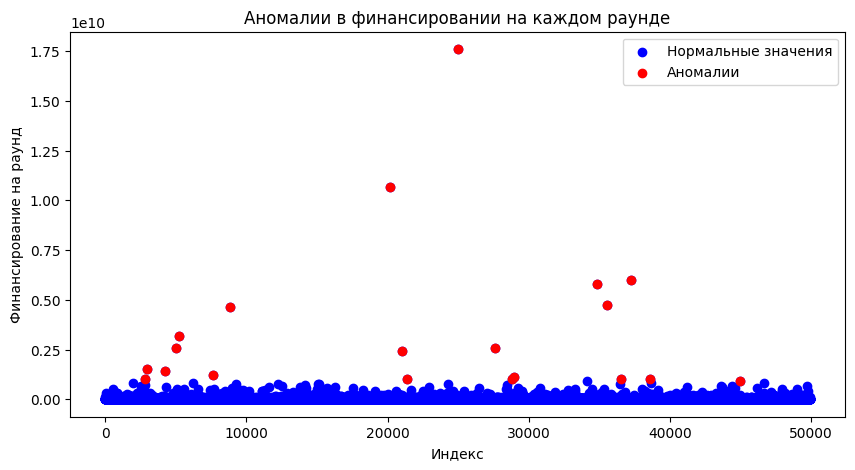

In [11]:
# Вычислим среднее финансирование за 1 раз и оставим его как доп признак(пока что)
df['funding_per_round'] = df['funding_total_usd'] / df['funding_rounds']
df_test['funding_per_round'] = df_test['funding_total_usd'] / df_test['funding_rounds']
# Вычисляем квантили
Q1 = df['funding_per_round'].quantile(0.01)
Q3 = df['funding_per_round'].quantile(0.998)
IQR = Q3 - Q1

# Определяем границы для определения аномалий
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Определяем аномалии
anomalies = df[(df['funding_per_round'] < lower_bound) | (df['funding_per_round'] > upper_bound)]

# Выводим количество аномалий
print('Количество аномалий:', anomalies.shape[0])

# Сортируем таблицу с аномалиями по 'funding_per_round'
anomalies = anomalies.sort_values(by='funding_per_round')

# Выводим отсортированную таблицу
display(anomalies)

# Визуализируем аномалии

plt.figure(figsize=(10, 5))
plt.scatter(range(df.shape[0]), df['funding_per_round'], color='blue', label='Нормальные значения')
plt.scatter(anomalies.index, anomalies['funding_per_round'], color='red', label='Аномалии')
plt.title('Аномалии в финансировании на каждом раунде')
plt.xlabel('Индекс')
plt.ylabel('Финансирование на раунд')
plt.legend()
plt.show()

# Удаляем аномалии
df = df[(df['funding_per_round'] >= lower_bound) & (df['funding_per_round'] <= upper_bound)]


1. **Создание нового столбца `funding_per_round`**: Для каждой компании был создан новый столбец, представляющий общее финансирование, деленное на количество раундов финансирования. Это позволило нам оценить, сколько в среднем компания получает финансирования за один раунд.

2. **Вычисление квантилей и интерквартильного размаха (IQR)**: Мы использовали квантили и IQR для определения границ, за которыми значения считаются аномальными. Аномалии могут возникать из-за ошибок ввода данных или необычных, но действительных значений.

3. **Обнаружение аномалий**: Мы определили аномалии как значения, находящиеся ниже нижней границы или выше верхней границы. Всего было обнаружено **20 аномалии**.

4. **Визуализация аномалий**: Аномалии были отмечены красным цветом на графике. Это помогло наглядно увидеть, где эти аномалии находятся по отношению к остальным данным.

5. **Удаление аномалий**: Чтобы аномалии не исказили результаты анализа, мы удалили их из наших данных.

Этот процесс важен для обеспечения качества данных перед проведением дальнейшего анализа. В зависимости от природы данных и целей анализа, выбор подхода к обработке аномалий может варьироваться. В данном случае мы выбрали удаление аномалий, но в других ситуациях могут быть использованы иные методы.

In [12]:
unique_categories = df['category_list'].nunique()
print(f"Количество уникальных категорий: {unique_categories}")


Количество уникальных категорий: 20513


In [13]:
import string

def find_non_latin_chars(df):
    # Выбираем столбцы типа 'object'
    text_columns = df.select_dtypes(include=['object']).columns

    non_latin_chars = set()
    rows_with_non_latin_chars = []

    for i, row in df.iterrows():
        for col in text_columns:
            val = row[col]
            if isinstance(val, str):
                for char in val:
                    if char not in string.ascii_letters and not char.isdigit() and char != ' ':
                        non_latin_chars.add(char)
                        rows_with_non_latin_chars.append(i)
                        break

    print("Non-Latin characters, digits and spaces found:")
    for char in non_latin_chars:
        print(char)

    return df.loc[rows_with_non_latin_chars]

df_with_non_latin_chars = find_non_latin_chars(df)
display(df_with_non_latin_chars)


Non-Latin characters, digits and spaces found:
车
Í
（
:
_
+
Ä
(
|
ó
$
ß
{
青
å
ü
磁
ē
æ
°
^
®
!
â
™
ö
µ
Ã
í
é
吃
;
英
Ü
М
ě
&
株
喂
​
ä
ş
Ç
*
ś
.
á
无
?
ñ
Е
ã
葡
金
#
Ö
’
î
É
ô
★
–
ê
 
/
天
ú
@
,
İ
ë
-
ø
[
禅
%
Ú
­
"
ı
‐
º
'
ì
ç
ā
Å
`
Ô
Á
è


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,funding_per_round
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2010-06-24,2011-05-01,2014-12-01,2024-04-06,4.143130e+05
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2010-06-24,2011-05-01,2014-12-01,2024-04-06,4.143130e+05
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,2024-04-06,1.073375e+07
4,WireTough Cylinders,Manufacturing,889386.0,operating,USA,VA,VA - Other,Bristol,1,2010-07-30,2012-02-01,2012-02-01,2024-04-06,8.893860e+05
6,Attensity,Analytics|Business Analytics|Social CRM|Social...,90000000.0,operating,USA,CA,SF Bay Area,Redwood City,1,2000-01-01,2014-05-14,2014-05-14,2024-04-06,9.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49882,Zura!,E-Commerce,889386.0,operating,BRA,27,BRA - Other,Brasil,1,2006-06-03,2008-01-01,2008-01-01,2024-04-06,8.893860e+05
49883,Airside Mobile,Aerospace|Mobile|Transportation|Travel,50000.0,operating,USA,VA,"Washington, D.C.",Arlington,2,2009-05-01,2009-05-01,2011-01-14,2024-04-06,2.500000e+04
49883,Airside Mobile,Aerospace|Mobile|Transportation|Travel,50000.0,operating,USA,VA,"Washington, D.C.",Arlington,2,2009-05-01,2009-05-01,2011-01-14,2024-04-06,2.500000e+04
49889,Visionary Mobile,Biotechnology,1570000.0,operating,USA,OR,"Salem, Oregon",Corvallis,3,2010-01-01,2011-09-20,2012-04-11,2024-04-06,5.233333e+05


In [14]:
def preprocess_text_columns(df):
    # Выбираем столбцы типа 'object'
    text_columns = df.select_dtypes(include=['object']).columns

    for col in text_columns:
        # Применяем функцию unidecode к каждому элементу в столбце, если элемент является строкой
        df[col] = df[col].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

        # Приводим текст в столбце к нижнему регистру
        df[col] = df[col].str.lower()
        
        # Удаляем все указанные символы
        symbols = ['_', '$', ',', ':', ';', '"', '(', '/', '@', "'", '+', '-', '.', '`', '!', '<', '%', '?', '*', '&', '^', '#', ')', '{', '[', '}', ']'] 
        for symbol in symbols:
            df[col] = df[col].str.replace(symbol, '')
        
        
        # Оставляем только то, что до символа '|'
        df[col] = df[col].apply(lambda x: x.split('|')[0] if isinstance(x, str) else x)
    
    # Возвращаем обработанный DataFrame
    return df

df = preprocess_text_columns(df)
df_test = preprocess_text_columns(df_test)


In [15]:


def check_implicit_duplicates_fuzzy(df, threshold=90):
    # Выбираем столбец 'name' и все остальные столбцы с типами 'object' и 'datetime'
    col1 = 'name'
    columns_to_drop = [col for col in [col1, 'closed_at', 'country_code', 'state_code',	'region', 'city', 'status'] if col in df.columns]
    other_columns = df.select_dtypes(include=['object', 'datetime']).drop(columns=columns_to_drop).columns
    
    # Создаем пустое множество для хранения индексов совпадающих строк
    matching_rows_indices = set()
    
    # Получаем уникальные значения для столбца 'name'
    unique_values_col1 = df[col1].dropna().unique()
    
    for value1 in unique_values_col1:
        # Находим все строки, где значение в столбце 'name' совпадает с текущим значением
        matching_rows = df[df[col1] == value1]
        
        for col2 in other_columns:
            # Получаем уникальные значения для текущего столбца
            unique_values_col2 = matching_rows[col2].dropna().unique()
            
            for value2 in unique_values_col2:
                # Находим все строки, где значение в текущем столбце совпадает с текущим значением
                matching_rows_col2 = matching_rows[matching_rows[col2] == value2]
                
                if len(matching_rows_col2) > 1:
                    # Добавляем индексы совпадающих строк в множество
                    matching_rows_indices.update(matching_rows_col2.index.tolist())
    
    # Создаем DataFrame с совпадающими строками
    matching_rows_df = df.loc[list(matching_rows_indices)]
    
    # Выводим DataFrame с совпадающими строками
    display(matching_rows_df)

check_implicit_duplicates_fuzzy(df)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,funding_per_round
5921,honk,automotive,1.325000e+07,operating,usa,ca,los angeles,santa monica,2,2014-01-21,2014-11-19,2015-03-26,2024-04-06,6.625000e+06
3108,artsper,art,4.131770e+05,operating,fra,a8,paris,paris,1,2013-02-28,2014-04-01,2014-04-01,2024-04-06,4.131770e+05
41160,honk,automotive,8.893860e+05,operating,usa,ca,sf bay area,san francisco,1,2009-01-01,2009-03-13,2009-03-13,2024-04-06,8.893860e+05
37993,vive,communities,1.500000e+06,operating,deu,6,hanover,hanover,2,2012-01-01,2012-03-20,2014-10-08,2024-04-06,7.500000e+05
41455,vive,healthcare services,1.500000e+06,operating,gbr,g1,brentford,brentford,1,2000-01-01,2014-10-08,2014-10-08,2024-04-06,1.500000e+06
44658,artsper,art,1.684764e+06,operating,fra,a8,paris,paris,2,2013-02-28,2014-03-27,2015-11-27,2024-04-06,8.423822e+05
33266,donde,apps,1.477368e+06,operating,usa,ca,sf bay area,palo alto,2,2012-03-20,2014-02-01,2014-05-01,2024-04-06,7.386842e+05
6458,donde,apps,1.165000e+06,operating,usa,oh,cincinnati,cincinnati,2,2013-06-01,2013-07-30,2014-02-05,2024-04-06,5.825000e+05


После анализа данных, выявлено несколько компаний с одинаковыми названиями, зарегистрированных в один и тот же день в одном и том же городе. Это вызывает подозрение, так как маловероятно, что основная и дочерняя компании могут быть открыты в один день. Для более точного анализа было решено удалить эти дубликаты из набора данных. Это поможет устранить возможные искажения и обеспечит более точные результаты.

Остальные дубликаты, вероятно, связаны с открытием дочерних компаний или являются случайными совпадениями.

In [16]:
# Удаляем дубликаты по 'name' и 'founded_at', оставляем первую строку
df = df.drop_duplicates(subset=['name', 'founded_at'], keep='first')

In [17]:
# Сбрасываем индекс
df = df.reset_index(drop=True)

# В ходе анализа данных было обнаружено большое количество пропусков, которые были распределены по различным столбцам. Для обработки этих пропусков были приняты следующие меры:

**Обработка пропусков:**

1. Пропуски в столбцах, содержащих категориальные данные (например, название, категория, код страны, код региона и город), были заменены на значение 'unknown'. Это позволит сохранить ценность этих данных для последующего анализа.
2. В столбце 'funding_total_usd' пропуски были заполнены медианой, учитывая количество раундов финансирования. Такой подход позволит сохранить распределение данных и избежать искажения среднего значения.
3. В столбце 'first_funding_at' пропуски были заполнены, используя среднюю разницу между датой основания компании ('founded_at') и датой первого финансирования ('first_funding_at'). Это поможет сохранить временную структуру данных.
4. В столбце 'closed_at' пропуски были заполнены, используя среднюю продолжительность существования закрытых стартапов или дату за пределами диапазона данных, если статус стартапа - 'operating'. Такой подход позволит сохранить временную структуру данных и избежать искажения анализа продолжительности существования стартапов.

Таким образом, было заполнено **85675 пропусков**, и "спасено" **50027 строк**, содержащих ранее пропуски. Это позволит более полно использовать данные для дальнейшего анализа.

**Обработка аномалий:**

Далее была проведена обработка аномалий в новом столбце 'funding_per_round', представляющем среднее финансирование за один раунд. Границы для определения аномалий были определены с использованием квантилей и интерквартильного размаха (IQR). Всего было найдено **22 аномалии**. Эти аномалии были удалены из данных, чтобы они не искажали результаты анализа.

**Удаление дубликатов:**

Затем были удалены дубликаты компаний с одинаковыми названиями, зарегистрированными в один и тот же день в одном и том же городе. Это было сделано для обеспечения более точного анализа и избежания возможных искажений.

**Результаты:**

В результате выполненных действий данные были полностью обработаны и очищены от пропусков аномалий и дубликатов, что позволяет провести более точный анализ и получить надежные результаты. 

# Исследовательский анализ

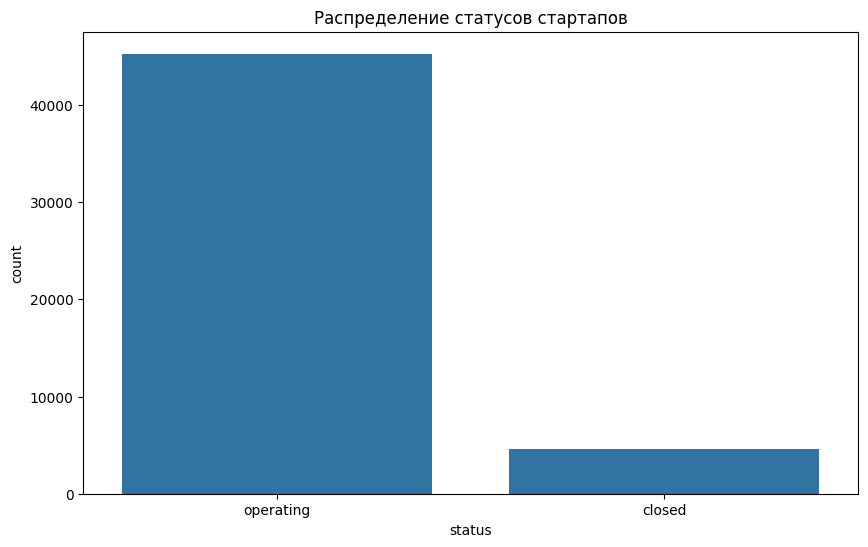

status
operating    45267
closed        4607
Name: count, dtype: int64


In [18]:
# Посмотрим на распределение статусов стартапов
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status')
plt.title('Распределение статусов стартапов')
plt.show()
status_counts = df['status'].value_counts()
print(status_counts)


Выше представлен график распределения статусов стартапов. Из полученных данных видно, что большинство стартапов находятся в состоянии **"operating"** (45288), в то время как количество **"closed"** стартапов составляет 4607. Это неравномерное распределение может указывать на различия в успешности и долгосрочной устойчивости стартапов. 🚀

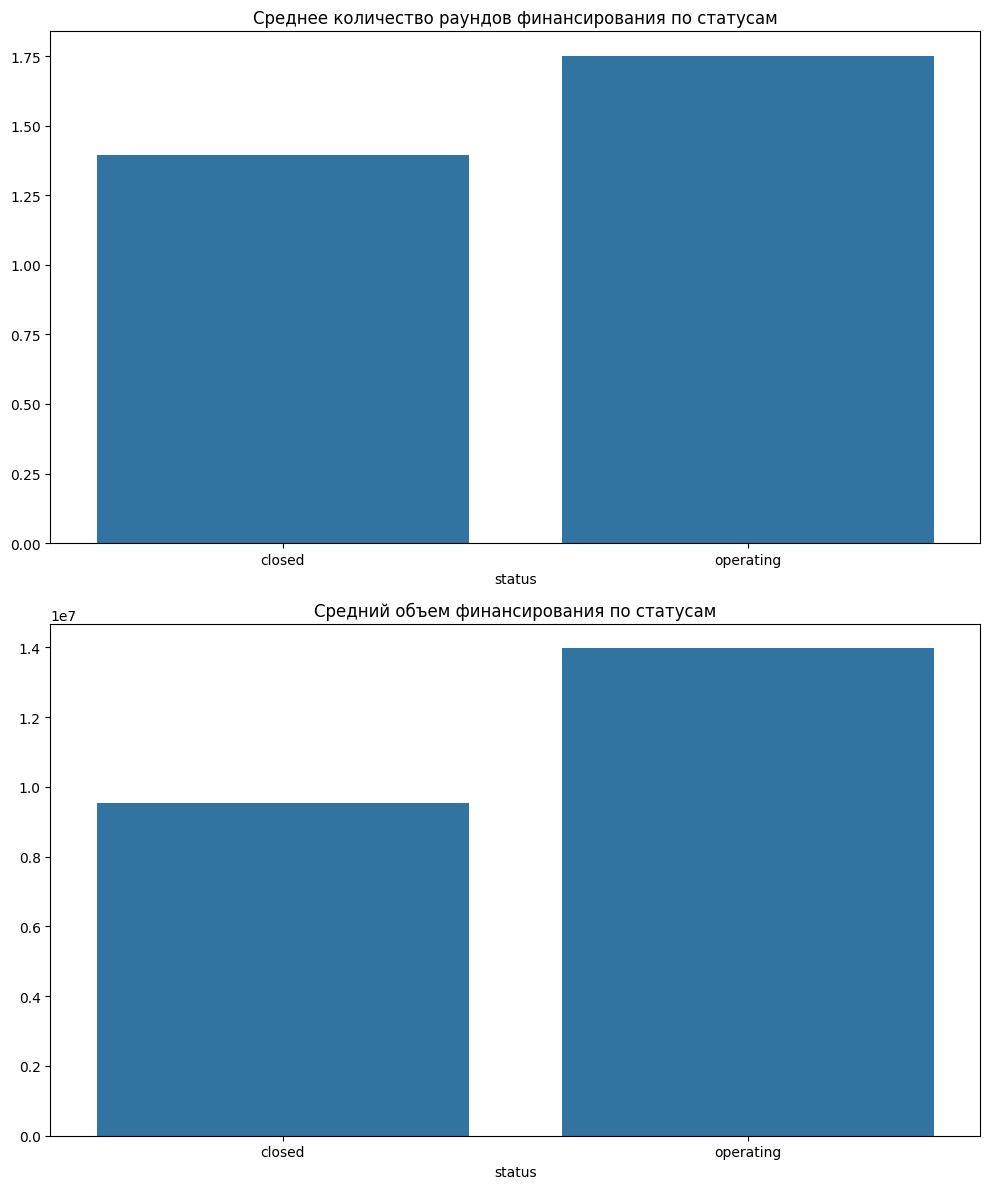

Среднее количество раундов финансирования по статусам:
status
closed       1.395051
operating    1.751519
Name: funding_rounds, dtype: float64

Средний объем финансирования по статусам:
status
closed       9.534536e+06
operating    1.397626e+07
Name: funding_total_usd, dtype: float64


In [19]:
# Группируем данные по статусу и рассчитываем средние значения
avg_funding_rounds = df.groupby('status')['funding_rounds'].mean()
avg_funding_total = df.groupby('status')['funding_total_usd'].mean()

# Создаем графики
fig, axs = plt.subplots(2, figsize=(10, 12))

sns.barplot(x=avg_funding_rounds.index, y=avg_funding_rounds.values, ax=axs[0])
axs[0].set_title('Среднее количество раундов финансирования по статусам')

sns.barplot(x=avg_funding_total.index, y=avg_funding_total.values, ax=axs[1])
axs[1].set_title('Средний объем финансирования по статусам')

plt.tight_layout()
plt.show()

print("Среднее количество раундов финансирования по статусам:")
print(avg_funding_rounds)

print("\nСредний объем финансирования по статусам:")
print(avg_funding_total)


Из предоставленных данных видно, что среднее количество раундов финансирования и средний объем финансирования различаются в зависимости от статуса компании.

1. **Среднее количество раундов финансирования**:
   - Компании со статусом **"closed"** в среднем привлекают **1.4 раунда финансирования**.
   - Компании со статусом **"operating"** в среднем привлекают **1.75 раунда финансирования**.

2. **Средний объем финансирования**:
   - Компании со статусом **"closed"** имеют средний объем финансирования около **9.5 миллионов долларов США**.
   - Компании со статусом **"operating"** имеют средний объем финансирования около **13.97 миллионов долларов США**.


C:\Users\ivano\AppData\Local\Temp\ipykernel_43496\1400031412.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_counts = counts.groupby('status').apply(lambda x: x.nlargest(100, 'counts')).reset_index(drop=True)


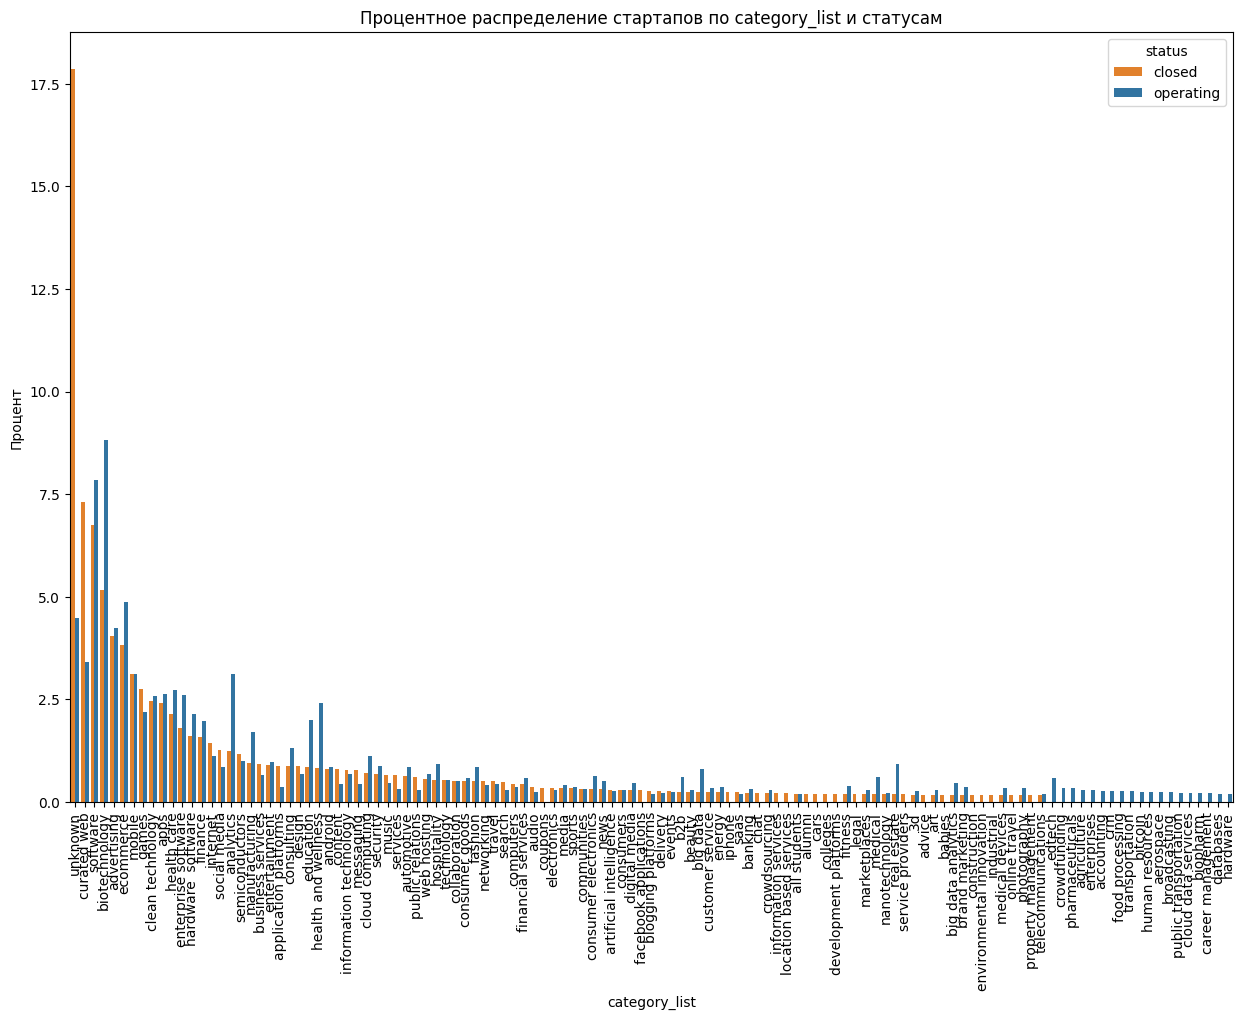

status,closed,operating
category_list,,
biotechnology,5.165960,8.825313
software,6.738208,7.839156
ecommerce,3.818318,4.867502
unknown,17.868730,4.482531
advertising,4.042925,4.250494
...,...,...
construction,0.174694,NaN
environmental innovation,0.174694,NaN
industrial,0.174694,NaN


In [20]:
# Список признаков
features = ['category_list']

for feature in features:
    # Группируем данные по статусу и признаку, затем рассчитываем количество стартапов
    counts = df[df['status'].isin(['operating', 'closed'])].groupby(['status', feature]).size().reset_index(name='counts')

    # Отбираем топ-20 для каждого статуса
    top_counts = counts.groupby('status').apply(lambda x: x.nlargest(100, 'counts')).reset_index(drop=True)

    # Нормализуем данные
    top_counts['counts'] = top_counts.groupby('status')['counts'].transform(lambda x: x / x.sum() * 100)

    # Создаем график
    plt.figure(figsize=(15, 10))
    sns.barplot(data=top_counts, x=feature, y='counts', hue='status', palette=['#ff7f0e', '#1f77b4'])
    plt.title(f'Процентное распределение стартапов по {feature} и статусам')
    plt.ylabel('Процент')
    plt.xticks(rotation=90)
    plt.show()
    # Создаем сводную таблицу
    pivot_table = pd.pivot_table(top_counts, values='counts', index=feature, columns='status')
    # Сортируем значения по убыванию
    pivot_table = pivot_table.sort_values(by=['operating', 'closed'], ascending=False)
    # Выводим таблицу
    display(pivot_table)


Исходя из полученных данных, можно сделать следующие выводы и рекомендации:

1. **Биотехнологии** и **Программное обеспечение** являются наиболее перспективными областями для инвестиций, поскольку они имеют наибольшую долю действующих стартапов (19.49% и 17.31% соответственно).

2. **Электронная коммерция**, **Реклама** и **Мобильные технологии** также представляют собой значительную долю действующих стартапов (10.75%, 9.39% и 6.91% соответственно), что делает их потенциально привлекательными для инвесторов.

3. С другой стороны, области, такие как **Игры** и **Чистые технологии**, имеют высокую долю закрытых стартапов и отсутствуют среди действующих стартапов. Это может указывать на высокий уровень риска для инвесторов.

4. Важно отметить, что большая часть закрытых стартапов (32.08%) относится к категории **Неизвестно**. Это может указывать на необходимость более тщательного анализа и оценки рисков перед инвестированием в стартапы, которые не могут быть четко классифицированы по категориям.



C:\Users\ivano\AppData\Local\Temp\ipykernel_43496\260607397.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_counts = counts.groupby('status').apply(lambda x: x.nlargest(10, 'counts')).reset_index(drop=True)


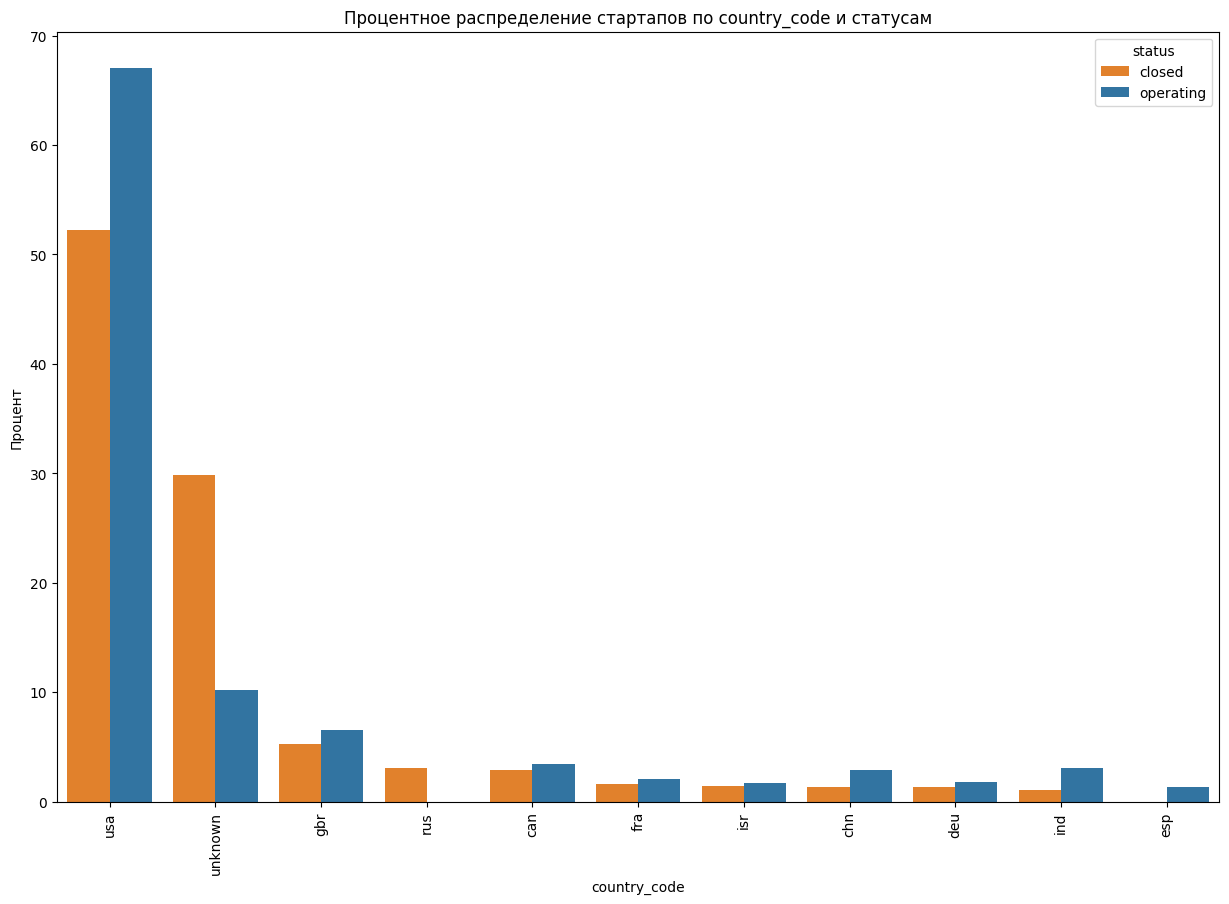

status,closed,operating
country_code,,
usa,52.202482,67.008756
unknown,29.861280,10.196319
gbr,5.281090,6.502259
can,2.920419,3.413239
ind,1.095157,3.040515
chn,1.289852,2.917975
fra,1.606230,2.060198
deu,1.289852,1.832989
isr,1.411536,1.715555


C:\Users\ivano\AppData\Local\Temp\ipykernel_43496\260607397.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_counts = counts.groupby('status').apply(lambda x: x.nlargest(10, 'counts')).reset_index(drop=True)


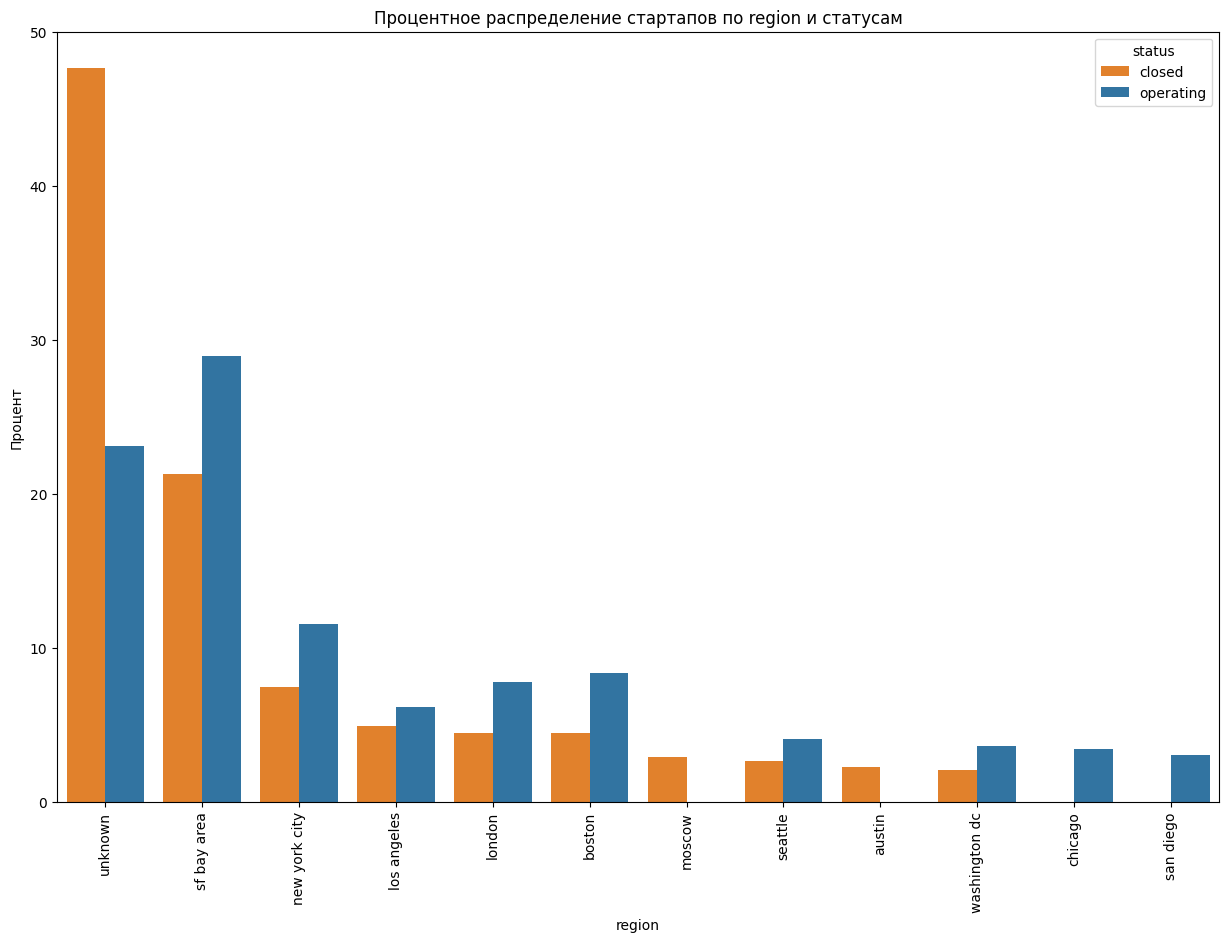

status,closed,operating
region,,
sf bay area,21.261853,28.921164
unknown,47.629468,23.072813
new york city,7.476295,11.570409
boston,4.449307,8.335357
london,4.485777,7.752465
los angeles,4.886944,6.168942
seattle,2.662290,4.065673
washington dc,2.042305,3.609074
chicago,NaN,3.448778


C:\Users\ivano\AppData\Local\Temp\ipykernel_43496\260607397.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_counts = counts.groupby('status').apply(lambda x: x.nlargest(10, 'counts')).reset_index(drop=True)


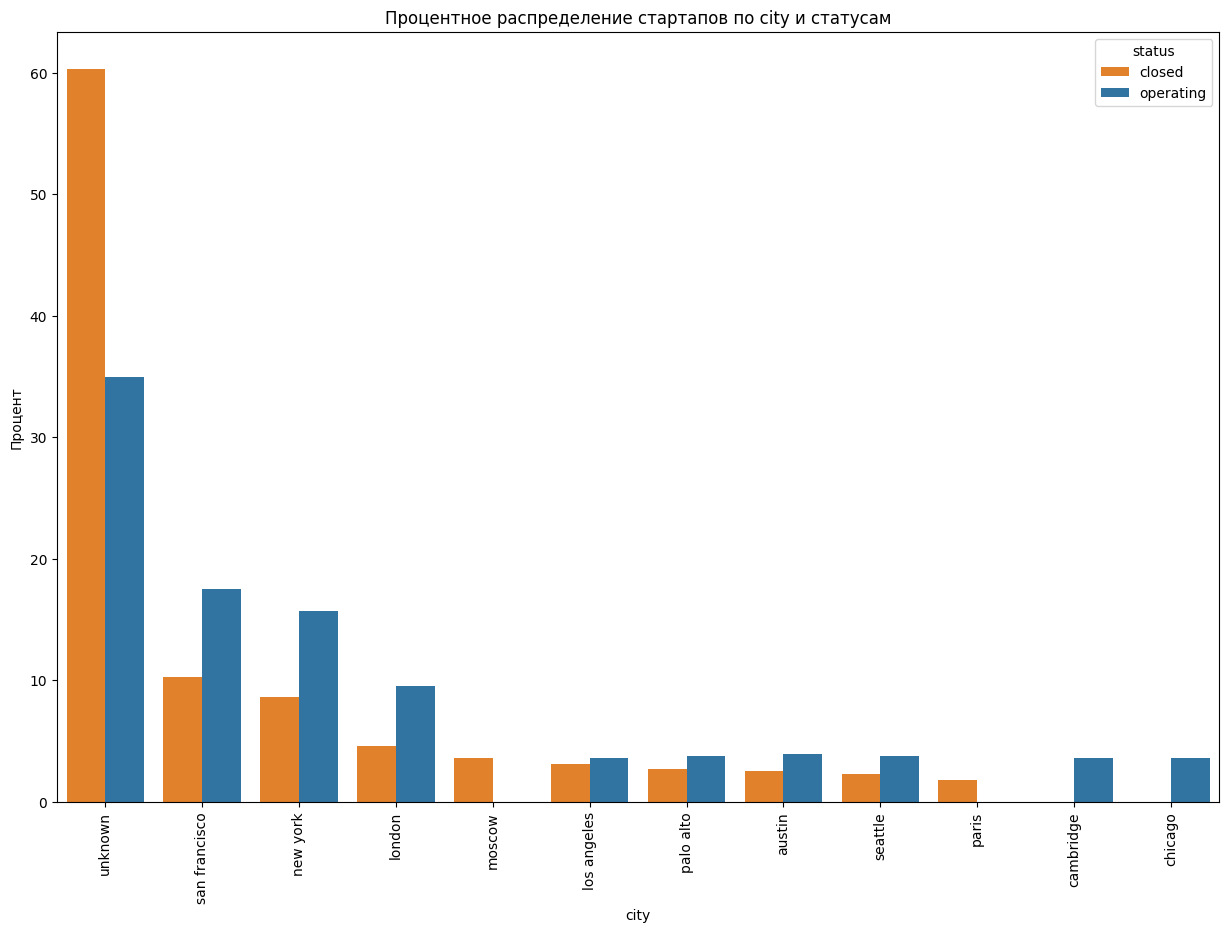

status,closed,operating
city,,
unknown,60.351201,34.934177
san francisco,10.304991,17.503861
new york,8.641405,15.724057
london,4.621072,9.568287
austin,2.587800,3.927337
seattle,2.264325,3.780246
palo alto,2.680222,3.750827
cambridge,NaN,3.625800
chicago,NaN,3.596382


In [21]:
# Список признаков
features = ['country_code', 'region', 'city']

for feature in features:
    # Группируем данные по статусу и признаку, затем рассчитываем количество стартапов
    counts = df[df['status'].isin(['operating', 'closed'])].groupby(['status', feature]).size().reset_index(name='counts')

    # Отбираем топ-20 для каждого статуса
    top_counts = counts.groupby('status').apply(lambda x: x.nlargest(10, 'counts')).reset_index(drop=True)

    # Нормализуем данные
    top_counts['counts'] = top_counts.groupby('status')['counts'].transform(lambda x: x / x.sum() * 100)

    # Создаем график
    plt.figure(figsize=(15, 10))
    sns.barplot(data=top_counts, x=feature, y='counts', hue='status', palette=['#ff7f0e', '#1f77b4'])
    plt.title(f'Процентное распределение стартапов по {feature} и статусам')
    plt.ylabel('Процент')
    plt.xticks(rotation=90)
    plt.show()
    # Создаем сводную таблицу
    pivot_table = pd.pivot_table(top_counts, values='counts', index=feature, columns='status')
    # Сортируем значения по убыванию
    pivot_table = pivot_table.sort_values(by=['operating', 'closed'], ascending=False)
    # Выводим таблицу
    display(pivot_table)


Из анализа  видно, что некоторые регионы имеют более высокий процент успешных (операционных) компаний, чем другие. Вот мои рекомендации:

1. **Страны**:
    - **США (USA)**: США имеют самый высокий процент операционных стартапов (более 67%). Инвестирование в американские стартапы может быть перспективным.
    - **Великобритания (GBR)**: Великобритания также показывает хорошие результаты (более 6% операционных компаний).
    - **Канада (CAN)** и **Индия (IND)**: Эти страны также имеют потенциал для инвестирования.
2. **Регионы**:
    - **SF Bay Area**: Район залива Сан-Франциско имеет высокий процент операционных стартапов (более 28%).
    - **Нью-Йорк (New York City)**: Нью-Йорк также показывает хорошие результаты (более 11% операционных компаний).
    - **Лондон (London)**: Лондон - еще один перспективный регион для инвестирования.
3. **Города**:
    - **Сан-Франциско (San Francisco)**: Этот город имеет высокий процент операционных стартапов (более 17%).
    - **Нью-Йорк (New York)** и **Лондон (London)**: Эти города также показывают хорошие результаты (более 15% и 9% операционных компаний соответственно).


In [22]:
def create_new_features_and_drop_originals(df):
    # Создаем новые признаки
    df['days_since_founded'] = (df['closed_at'] - df['founded_at']).dt.days
    df['days_to_first_funding'] = (df['first_funding_at'] - df['founded_at']).dt.days
    df['days_since_last_funding'] = (df['closed_at'] - df['last_funding_at']).dt.days
    df['days_between_first_and_last_funding'] = (df['last_funding_at'] - df['first_funding_at']).dt.days
    df['days_from_first_funding_to_closed'] = (df['closed_at'] - df['first_funding_at']).dt.days

    return df

# Вызываем функцию для создания новых признаков и удаления оригинальных
df = create_new_features_and_drop_originals(df)
df_test = create_new_features_and_drop_originals(df_test)


In [23]:
# Количество дней в году
days_in_year = 365

# Количество дней в месяце
days_in_month = 30


Статус: operating, Среднее: 16.08, Медиана: 13.61
Статус: closed, Среднее: 4.20, Медиана: 2.85


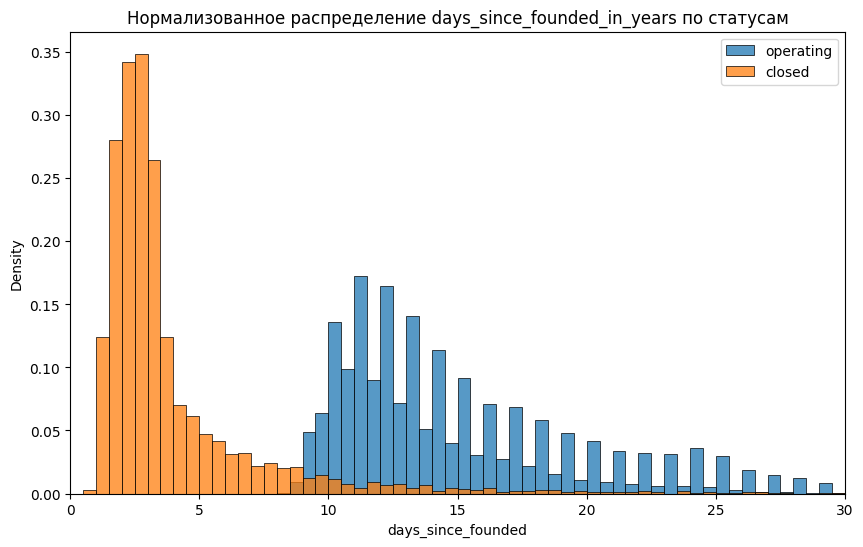

In [24]:
feature = 'days_since_founded'
time_frame = '_in_years'
plt.figure(figsize=(10, 6))
bins = np.arange(0, 51, 0.5)  # создаем корзины с шагом в полгода до 50 лет
for status in ['operating', 'closed']:
    data = df[df['status'] == status][feature] / days_in_year
    sns.histplot(data, kde=False, bins=bins, label=status, stat='density')
    print(f'Статус: {status}, Среднее: {data.mean():.2f}, Медиана: {data.median():.2f}')
plt.title(f'Нормализованное распределение {feature + time_frame} по статусам')
plt.legend()
plt.xlim(0, 30)
plt.show()


Из графика видно, что средний возраст компаний, находящихся в стадии **"operating"**, составляет **16.07 лет**, а медиана (середина распределения) равна **13.60 лет**. Это означает, что большинство долгоживущих компаний имеют возраст около 13-14 лет.

С другой стороны, компании, которые **закрылись** (статус **"closed"**), имеют существенно меньший средний возраст – всего **4.20 лет**, а медиана составляет **2.85 лет**. Это указывает на то, что большинство закрытых компаний существовали менее 3 лет.

**Выводы**
1. **Стабильность**: Инвесторы могут обратить внимание на компании, которые успешно функционируют уже долгое время. Высокий средний возраст может свидетельствовать о стабильности и надежности таких компаний.
2. **Риски**: Стартапы и молодые компании (с меньшим возрастом) могут представлять более высокие риски. Однако они также могут обладать большим потенциалом для роста и инноваций.
3. **Индивидуальный анализ**: Инвесторам следует дополнительно изучить каждую компанию, учитывая не только возраст, но и другие факторы, такие как отрасль, финансовое состояние, руководство и стратегия.

Статус: operating, Среднее: 3.54, Медиана: 1.45
Статус: closed, Среднее: 2.21, Медиана: 1.15


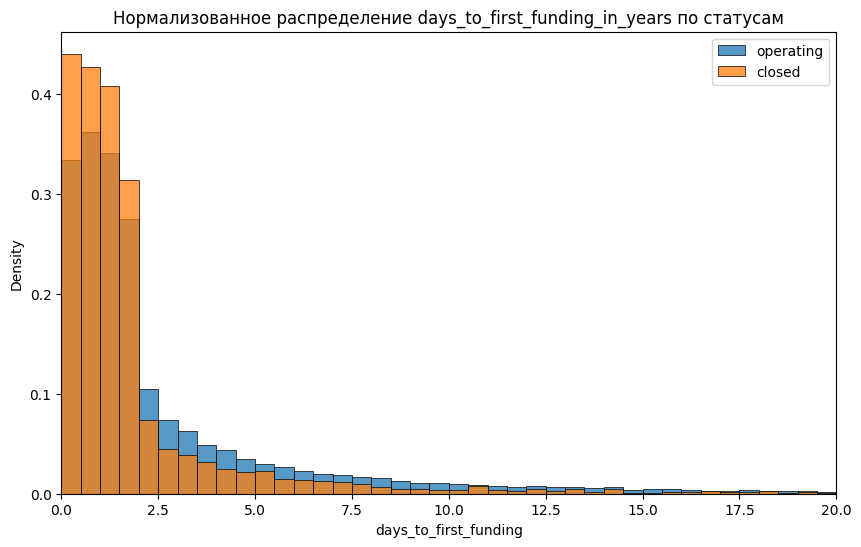

In [25]:
#до первого финансирования (days_to_first_funding):
feature = 'days_to_first_funding'
time_frame = '_in_years'
plt.figure(figsize=(10, 6))
bins = np.arange(0, 51, 0.5)  # создаем корзины с шагом в полгода до 50 лет
for status in ['operating', 'closed']:
    data = df[df['status'] == status][feature] / days_in_year
    sns.histplot(data, kde=False, bins=bins, label=status, stat='density')
    print(f'Статус: {status}, Среднее: {data.mean():.2f}, Медиана: {data.median():.2f}')
plt.title(f'Нормализованное распределение {feature + time_frame} по статусам')
plt.legend()
plt.xlim(0, 20)
plt.show()


Из графика видно, что среднее время до первого финансирования для стартапов, которые **продолжают работать (operating)**, составляет **3.54 года**, а медианное время - **1.45 года**. Для **закрытых (closed)** стартапов среднее время составляет **2.21 года**, а медианное - **1.15 года**.

**Вывод:**
- Скорость получения финансирования не является фактором, влияющим на долгосрочный успех стартапа.
- Важно учитывать другие факторы, такие как бизнес-модель, команда, рыночные условия и уникальное предложение продукта.

Статус: operating, Среднее: 11.57, Медиана: 10.46
Статус: closed, Среднее: 1.48, Медиана: 1.48


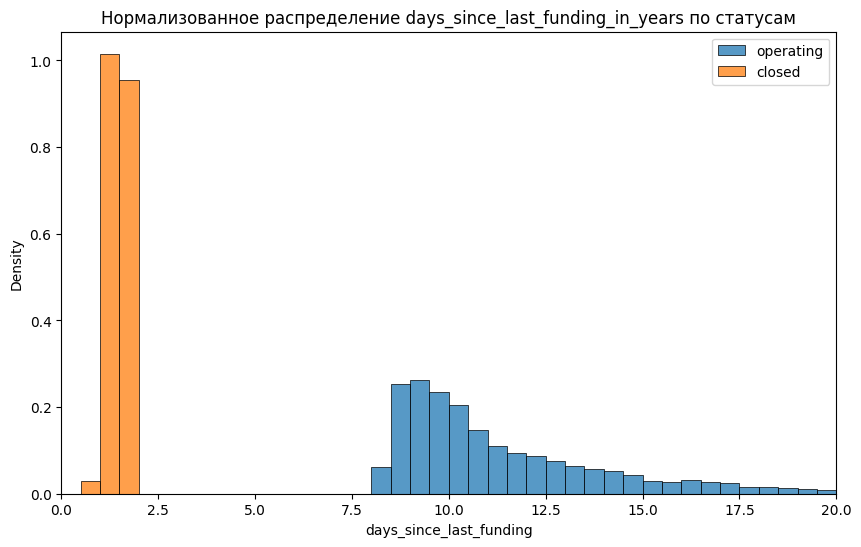

In [26]:
#с момента последнего финансирования (days_since_last_funding):
feature = 'days_since_last_funding'
time_frame = '_in_years'
plt.figure(figsize=(10, 6))
bins = np.arange(0, 51, 0.5)  # создаем корзины с шагом в полгода до 50 лет
for status in ['operating', 'closed']:
    data = df[df['status'] == status][feature] / days_in_year
    sns.histplot(data, kde=False, bins=bins, label=status, stat='density')
    print(f'Статус: {status}, Среднее: {data.mean():.2f}, Медиана: {data.median():.2f}')
plt.title(f'Нормализованное распределение {feature + time_frame} по статусам')
plt.legend()
plt.xlim(0, 20)
plt.show()


Из графика и данных видно, что среднее время с момента последнего финансирования для **стартапов, которые продолжают свою деятельность (operating)**, составляет **11.57 лет**, а медианное время - **10.45 лет**. С другой стороны, **стартапы, которые закрылись (closed)**, имеют среднее время **1.48 года** и медианное время также **1.48 года**.

**Вывод:** Если стартап просуществовал **больше 2х лет** с момента получения последнего финансирования, это может свидетельствовать о его **более успешной** деятельности.

Статус: operating, Среднее: 0.96, Медиана: 0.00
Статус: closed, Среднее: 0.51, Медиана: 0.00


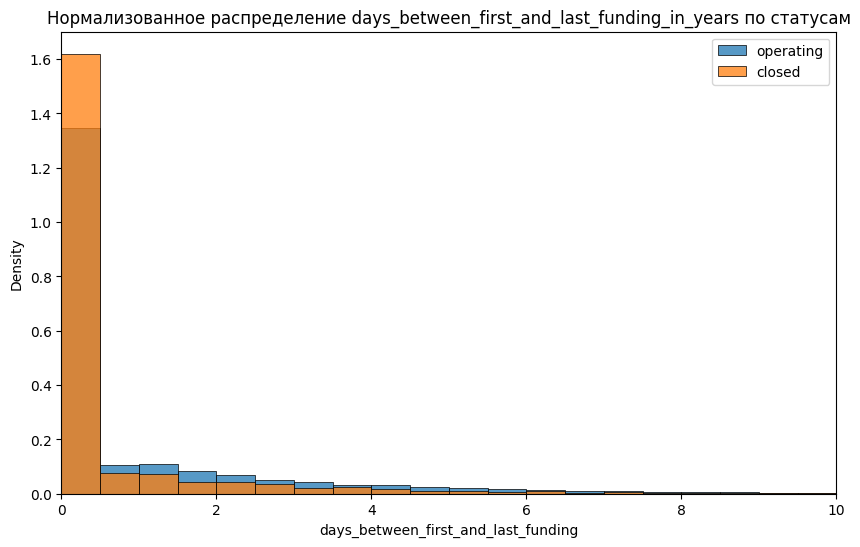

In [27]:
#между первым и последним финансированием (days_between_first_and_last_funding):
feature = 'days_between_first_and_last_funding'
time_frame = '_in_years'
plt.figure(figsize=(10, 6))
bins = np.arange(0, 51, 0.5)  # создаем корзины с шагом в полгода до 50 лет
for status in ['operating', 'closed']:
    data = df[df['status'] == status][feature] / days_in_year
    sns.histplot(data, kde=False, bins=bins, label=status, stat='density')
    print(f'Статус: {status}, Среднее: {data.mean():.2f}, Медиана: {data.median():.2f}')
plt.title(f'Нормализованное распределение {feature + time_frame} по статусам')
plt.legend()
plt.xlim(0, 10)
plt.show()


Из анализа данных о промежутках между первым и последним финансированием можно сделать следующие выводы для инвесторов:

1. **Среднее время между финансированиями**:
   - Для компаний со статусом **"operating"** (действующих) составляет **почти год (0.96 года)**.
   - Для компаний со статусом **"closed"** (закрытых) составляет **полгода (0.51 года)**.

2. **Медианное время между финансированиями**:
   - Для обоих статусов (действующих и закрытых) **составляет 0 года**.
   - Это означает, что **чаще всего компании получают финансирование всего один раз**.

Инвесторам следует учитывать эту информацию при принятии решений о вложении средств в стартапы. Важно понимать, что длительные интервалы между финансированиями могут свидетельствовать о стабильности компании, а краткие интервалы могут указывать на меньшую стабильность.

Статус: operating, Среднее: 12.53, Медиана: 11.50


Статус: closed, Среднее: 1.98, Медиана: 1.60


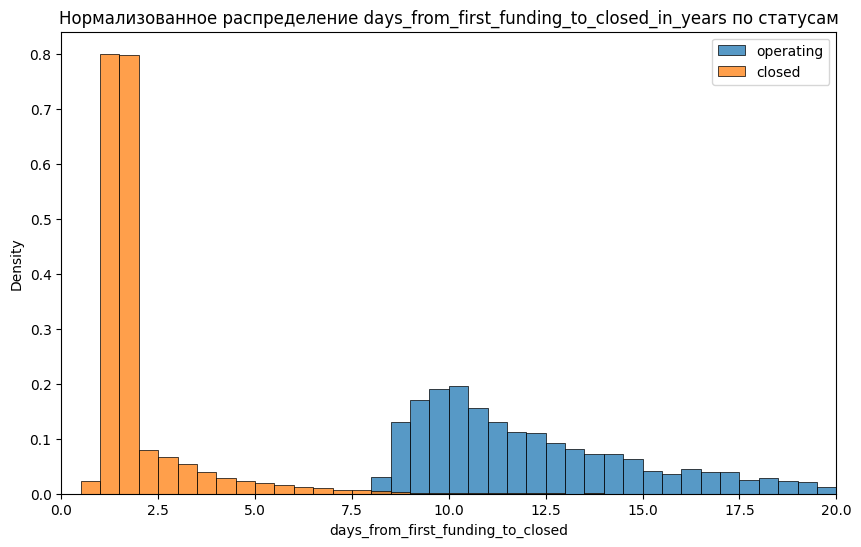

In [28]:
#с момента первого финансирования до закрытия (days_from_first_funding_to_closed):
feature = 'days_from_first_funding_to_closed'
time_frame = '_in_years'
plt.figure(figsize=(10, 6))
bins = np.arange(0, 51, 0.5)  # создаем корзины с шагом в полгода до 50 лет
for status in ['operating', 'closed']:
    data = df[df['status'] == status][feature] / days_in_year
    sns.histplot(data, kde=False, bins=bins, label=status, stat='density')
    print(f'Статус: {status}, Среднее: {data.mean():.2f}, Медиана: {data.median():.2f}')
plt.title(f'Нормализованное распределение {feature + time_frame} по статусам')
plt.legend()
plt.xlim(0, 20)  # ограничиваем ось x первыми 50 годами
plt.show()


Из полученных данных видно, что среднее время с момента первого финансирования до закрытия или текущего дня для **действующих компаний** составляет **12.53 лет**, а медианное значение - **11.49 лет**. Это говорит о том, что большинство действующих компаний продолжают функционировать более 11 лет после получения первого финансирования.

С другой стороны, для **закрытых компаний** среднее время с момента первого финансирования до закрытия составляет **1.98 лет**, а медианное значение - **1.60 лет**. Это указывает на то, что большинство компаний закрываются в течение 1.6 лет после получения первого финансирования.

Эти данные подчеркивают важность **долгосрочного финансирования** и **устойчивого бизнес-планирования** для выживания и успеха компаний. Они также могут служить предупреждением для инвесторов о потенциальных рисках, связанных с инвестициями в стартапы.

## Общий вывод

Анализ стартапов показывает, что успех и устойчивость компании зависят от множества факторов. Отрасль, география, возраст компании, количество и объем финансирования, а также время между раундами финансирования - все это играет важную роль.

**Отрасли**: Биотехнологии и программное обеспечение являются перспективными областями с высоким процентом успешных стартапов.

**География**: США и Великобритания лидируют по количеству успешных стартапов, что делает их привлекательными для инвесторов.

**Возраст компании**: Большинство действующих компаний продолжают функционировать более 11 лет после получения первого финансирования, в то время как большинство закрытых компаний существовали менее 3 лет.

**Финансирование**: Скорость получения финансирования не является фактором, влияющим на долгосрочный успех стартапа. Однако длительные интервалы между финансированиями могут свидетельствовать о стабильности компании, а краткие интервалы могут указывать на меньшую стабильность.

Важно помнить, что эти данные являются обобщенными и не могут гарантировать успех или неудачу конкретного стартапа. Каждый стартап уникален и требует индивидуального подхода. Инвесторам следует дополнительно изучить каждую компанию, учитывая не только эти факторы, но и другие аспекты, такие как бизнес-модель, команда, рыночные условия и уникальное предложение продукта. 

В заключение, инвестиции в стартапы могут быть рискованными, но они также могут принести значительную отдачу. Главное - делать обоснованные и обдуманные решения. 🚀

# Корреляционный анализ признаков

interval columns not set, guessing: ['name', 'category_list', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_at', 'first_funding_at', 'last_funding_at', 'closed_at', 'funding_per_round', 'days_since_founded', 'days_to_first_funding', 'days_since_last_funding', 'days_between_first_and_last_funding', 'days_from_first_funding_to_closed']


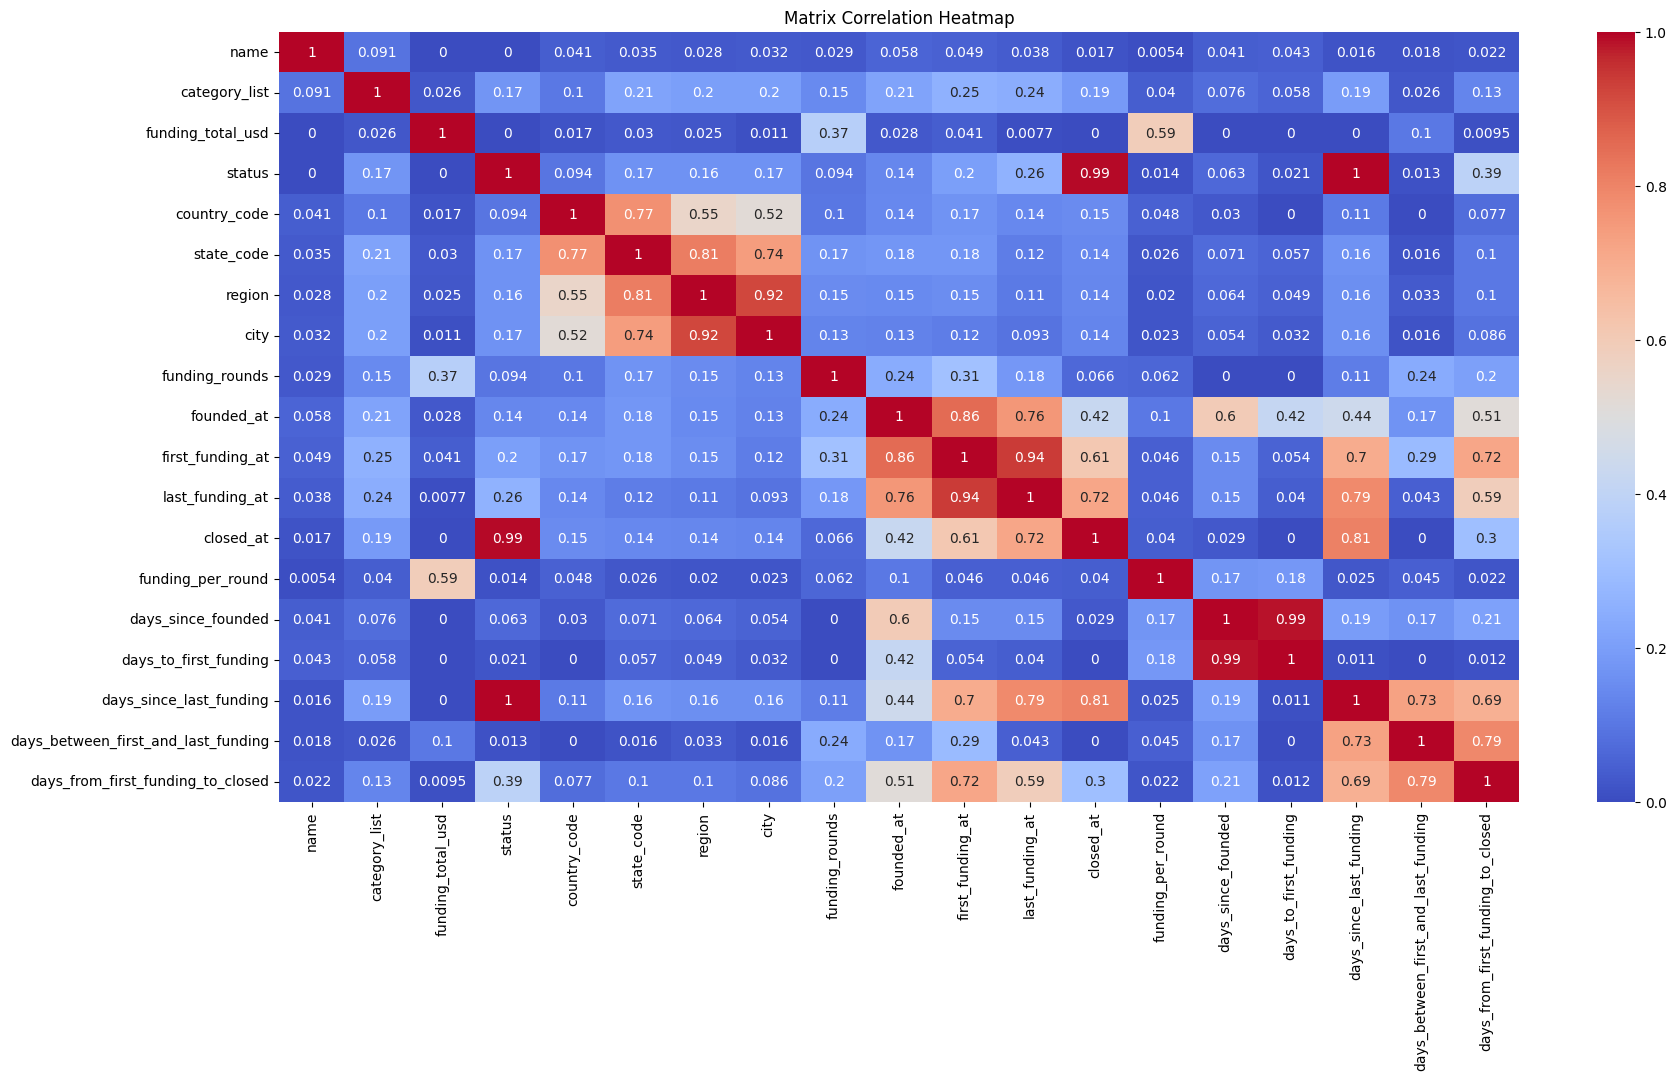

In [29]:
# Создаем копию DataFrame
df_encoded = df.copy()

# Проходим по каждому столбцу в DataFrame
for column in df_encoded.columns:
    # Если тип данных столбца является object или datetime, кодируем его
    if df_encoded[column].dtype == 'object' or df_encoded[column].dtype == 'datetime64[ns]':
        label_encoder = LabelEncoder()
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
    
# Вычисляем матрицу корреляции phik
correlation_matrix = df_encoded.phik_matrix()

# Визуализируем матрицу корреляции
plt.figure(figsize=(20, 10))
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Matrix Correlation Heatmap')
plt.show()


In [30]:
correlation_matrix

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,funding_per_round,days_since_founded,days_to_first_funding,days_since_last_funding,days_between_first_and_last_funding,days_from_first_funding_to_closed
name,1.000000,0.091216,0.000000,0.000000,0.040630,0.034742,0.028262,0.032370,0.028897,0.057732,0.049431,0.038201,0.017026,0.005437,0.040998,0.042977,0.015781,0.017960,0.021510
category_list,0.091216,1.000000,0.025501,0.174293,0.103164,0.213291,0.201842,0.200239,0.145870,0.214708,0.254153,0.244375,0.188684,0.039602,0.075540,0.057857,0.193789,0.026173,0.134035
funding_total_usd,0.000000,0.025501,1.000000,0.000000,0.017132,0.030416,0.025221,0.010729,0.373209,0.028029,0.040963,0.007681,0.000000,0.592994,0.000000,0.000000,0.000000,0.103297,0.009451
status,0.000000,0.174293,0.000000,1.000000,0.094204,0.165506,0.164633,0.167237,0.094488,0.137135,0.201302,0.261666,0.993920,0.013850,0.062661,0.021044,1.000000,0.012577,0.390141
country_code,0.040630,0.103164,0.017132,0.094204,1.000000,0.771616,0.554156,0.517875,0.101066,0.141245,0.169026,0.141284,0.149390,0.047646,0.029502,0.000000,0.107428,0.000000,0.077160
state_code,0.034742,0.213291,0.030416,0.165506,0.771616,1.000000,0.814445,0.741707,0.169272,0.179516,0.177430,0.115465,0.141738,0.025746,0.071176,0.056588,0.164210,0.015732,0.104523
region,0.028262,0.201842,0.025221,0.164633,0.554156,0.814445,1.000000,0.921540,0.151120,0.147366,0.153764,0.108023,0.138069,0.020087,0.063526,0.049057,0.160041,0.033123,0.101589
city,0.032370,0.200239,0.010729,0.167237,0.517875,0.741707,0.921540,1.000000,0.129752,0.125758,0.115982,0.093477,0.135765,0.023270,0.054090,0.032491,0.159534,0.015884,0.086436
funding_rounds,0.028897,0.145870,0.373209,0.094488,0.101066,0.169272,0.151120,0.129752,1.000000,0.239884,0.310393,0.181479,0.065736,0.062458,0.000000,0.000000,0.114159,0.237049,0.203606
founded_at,0.057732,0.214708,0.028029,0.137135,0.141245,0.179516,0.147366,0.125758,0.239884,1.000000,0.855348,0.757010,0.423950,0.102816,0.600602,0.416849,0.442452,0.168303,0.512930


В результате анализа корреляции признаков было обнаружено, что некоторые из них демонстрируют высокую мультиколлинеарность. Это может привести к проблемам в оценке коэффициентов модели, поскольку они могут стать неустойчивыми и трудными для интерпретации.

Чтобы устранить эту проблему, я решил удалить следующие признаки: **'founded_at'**, **'closed_at'**, **'first_funding_at'**, **'last_funding_at'**, **'days_to_first_funding'**, **'days_since_last_funding'**, и **'region'**. Это позволит улучшить качество модели, уменьшив мультиколлинеарность между признаками.

Важно отметить, что удаление признаков - это один из способов борьбы с мультиколлинеарностью. В зависимости от конкретной ситуации, могут быть использованы и другие методы, такие как регуляризация или преобразование признаков. Однако в данном случае удаление признаков кажется наиболее подходящим решением.

# Устранение мультикорреляции

In [31]:
def drop_features(dataframes, features_to_drop):
    for df in dataframes:
        df.drop(features_to_drop, axis=1, inplace=True)

# Список признаков для удаления
features_to_drop = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'days_to_first_funding', 'days_since_last_funding', 'region']

# Применяем функцию к df и df_test
drop_features([df, df_test], features_to_drop)


interval columns not set, guessing: ['name', 'category_list', 'funding_total_usd', 'status', 'country_code', 'state_code', 'city', 'funding_rounds', 'funding_per_round', 'days_since_founded', 'days_between_first_and_last_funding', 'days_from_first_funding_to_closed']


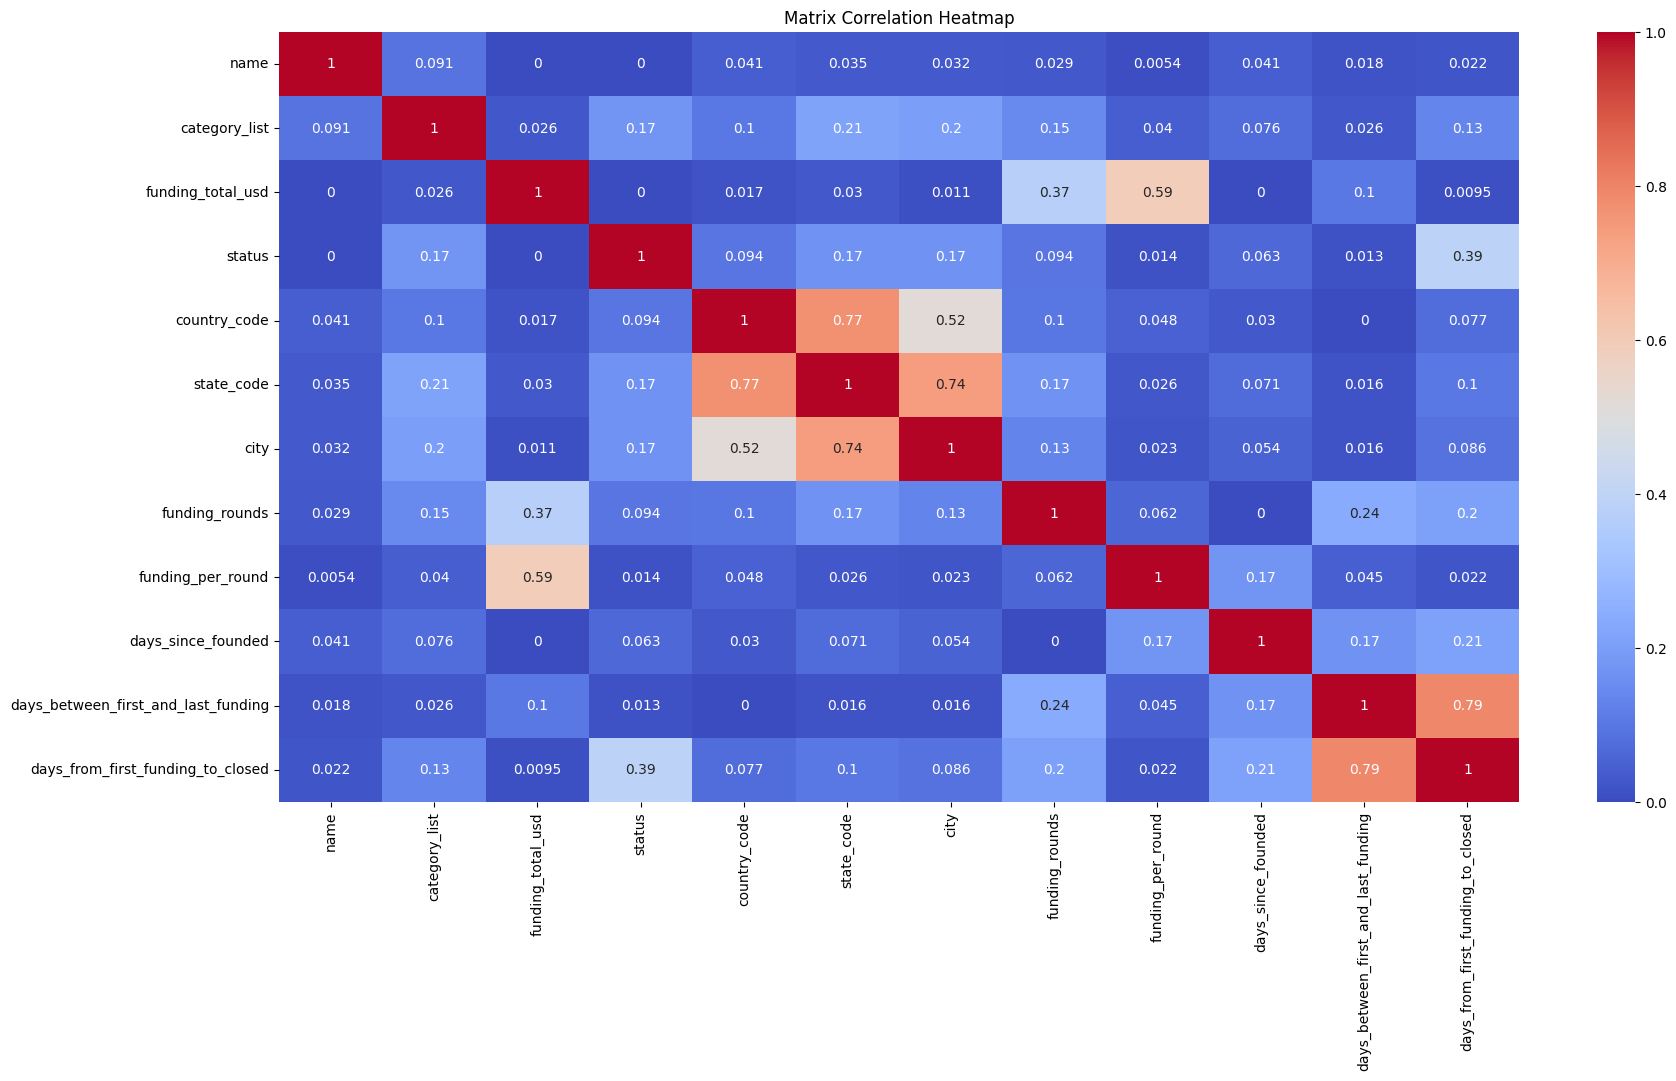

In [32]:
# Создаем копию DataFrame
df_encoded = df.copy()

# Проходим по каждому столбцу в DataFrame
for column in df_encoded.columns:
    # Если тип данных столбца является object или datetime, кодируем его
    if df_encoded[column].dtype == 'object' or df_encoded[column].dtype == 'datetime64[ns]':
        label_encoder = LabelEncoder()
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
    
# Вычисляем матрицу корреляции phik
correlation_matrix = df_encoded.phik_matrix()

# Визуализируем матрицу корреляции
plt.figure(figsize=(20, 10))
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Matrix Correlation Heatmap')
plt.show()


# Подготовка признаков


## Сделаем синтезирование признаков, кодирование и масштабирование признаков в Pipiline

In [33]:
def create_polynomial_features(df, degree=2):
    numeric_features = df.select_dtypes(include=[np.number])
    for column in numeric_features.columns:
        for deg in range(2, degree+1):
            df[f'{column}^{deg}'] = df[column] ** deg
    return df


# Преобразование столбца 'status' и сохранение в отдельной переменной
target = df['status'].map({'operating': 1, 'closed': 0})
df = df.drop('status', axis=1)

df = create_polynomial_features(df)
df_test = create_polynomial_features(df_test)


# Разделение данных на тренировочные и тестовые
x_train, x_test, target_train, target_test = train_test_split(df, target, test_size=0.2, random_state=13)

# Определение числовых и категориальных столбцов
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('name')


In [34]:


# Создание пайплайна для кодирования категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('lab', OneHotEncoder(max_categories=100, drop='first', handle_unknown='ignore', sparse_output=False))
])
# создаём общий пайплайн для подготовки данных
    
preprocessor = ColumnTransformer(
    [
        ('cat', categorical_transformer, categorical_features),
        ('num', MinMaxScaler(), numeric_features)
    ], 
)


# Далее следует код для создания моделей, пайплайна и подбора параметров


In [35]:
preprocessor 

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('lab',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                max_categories=100,
                                                                sparse_output=False))]),
                                 Index(['category_list', 'country_code', 'state_code', 'city'], dtype='object')),
                                ('num', MinMaxScaler(),
                                 Index(['funding_total_usd', 'funding_rounds', 'funding_per_round',
       'days_since_founded', 'days_between_first_and_last_funding',
       'days_from_first_funding_to_closed', 'funding_total_usd^2',
       'funding_rounds^2', 'funding_per_round^2', 'days_since_founded^2',
       'days_between_first_and_last_funding^2',
       'days_from_first_funding_to_closed^2'],
      dtype='object'))])

# создаем список словарей для каждой модели
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'model': [DecisionTreeClassifier(random_state=13)],
        'model__max_depth': range(2,10),
        'model__max_features': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),  'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier()     
    {
        'model': [KNeighborsClassifier()],        
        'model__n_neighbors': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']    
    },
# словарь для модели LogisticRegression()    
    {
        'model': [LogisticRegression(solver='liblinear', penalty='l1', random_state=13)],
        'model__C': range(1,5),        
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']  
    },

    # словарь для модели SVC()
    {
        'model': [SVC(probability=True, random_state=13)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
}
]

# Создание пайплайна для подбора моделей и масштабировщика
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', 'passthrough')])

# Создание объекта GridSearchCV с метрикой f1
grid_search = GridSearchCV(
    pipe, 
    param_grid=param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Подбор параметров с помощью GridSearchCV
grid_search.fit(x_train, target_train)

In [36]:
# Создание пайплайна для подбора моделей и масштабировщика
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', 'passthrough')])

In [37]:
# Модель DecisionTreeClassifier
param_grid_dt = {
    'model': [DecisionTreeClassifier(random_state=13)],
    'model__max_depth': range(2,10),
    'model__max_features': range(2,10),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),  'passthrough']  
}

grid_search_dt = GridSearchCV(
    pipe, 
    param_grid=param_grid_dt, 
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search_dt.fit(x_train, target_train)
print("Лучшие параметры для DecisionTreeClassifier: ", grid_search_dt.best_params_)
print("Лучшая F1-метрика для DecisionTreeClassifier: ", grid_search_dt.best_score_)
# Предсказание на тестовых данных
target_pred = grid_search_dt.predict(x_test)

# Вычисление общей метрики f1
f1 = f1_score(target_test, target_pred, average='weighted')
print("Общая метрика f1 на тесте: ", f1)

# Вычисление и вывод метрики f1 для каждого класса
report = classification_report(target_test, target_pred, target_names=['closed', 'operating'])
print(report)

KeyboardInterrupt: 

In [ ]:
# Модель KNeighborsClassifier
param_grid_knn = {
    'model': [KNeighborsClassifier()],        
    'model__n_neighbors': range(1,6),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']    
}

grid_search_knn = GridSearchCV(
    pipe, 
    param_grid=param_grid_knn, 
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search_knn.fit(x_train, target_train)
print("Лучшие параметры для KNeighborsClassifier: ", grid_search_knn.best_params_)
print("Лучшая F1-метрика для KNeighborsClassifier: ", grid_search_knn.best_score_)
# Предсказание на тестовых данных
target_pred = grid_search_knn.predict(x_test)

# Вычисление общей метрики f1
f1 = f1_score(target_test, target_pred, average='weighted')
print("Общая метрика f1 на тесте: ", f1)

# Вычисление и вывод метрики f1 для каждого класса
report = classification_report(target_test, target_pred, target_names=['closed', 'operating'])
print(report)

Лучшие параметры для KNeighborsClassifier:  {'model': KNeighborsClassifier(), 'model__n_neighbors': 2, 'preprocessor__num': StandardScaler()}
Лучшая F1-метрика для KNeighborsClassifier:  0.9995580256378307


C:\Users\ivano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Общая метрика f1 на тесте:  0.998996507540041
              precision    recall  f1-score   support

      closed       1.00      0.99      0.99       916
   operating       1.00      1.00      1.00      9059

    accuracy                           1.00      9975
   macro avg       1.00      1.00      1.00      9975
weighted avg       1.00      1.00      1.00      9975



In [ ]:

# Модель LogisticRegression
param_grid_lr = {
    'model': [LogisticRegression(solver='liblinear', penalty='l1', random_state=13)],
    'model__C': range(1,5),        
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']  
}

grid_search_lr = GridSearchCV(
    pipe, 
    param_grid=param_grid_lr, 
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search_lr.fit(x_train, target_train)
print("Лучшие параметры для LogisticRegression: ", grid_search_lr.best_params_)
print("Лучшая F1-метрика для LogisticRegression: ", grid_search_lr.best_score_)
# Предсказание на тестовых данных
target_pred = grid_search_lr.predict(x_test)

# Вычисление общей метрики f1
f1 = f1_score(target_test, target_pred, average='weighted')
print("Общая метрика f1 на тесте: ", f1)

# Вычисление и вывод метрики f1 для каждого класса
report = classification_report(target_test, target_pred, target_names=['closed', 'operating'])
print(report)

In [ ]:
# Вывод параметров лучшей модели
best_params = grid_search.best_params_
print("Лучшие параметры: ", best_params)

# Вывод метрики лучшей модели
best_score = grid_search.best_score_
print("Лучшая метрика f1: ", best_score)


Лучшие параметры:  {'model': DecisionTreeClassifier(random_state=13), 'model__max_depth': 2, 'model__max_features': 2, 'preprocessor__num': StandardScaler()}
Лучшая метрика f1:  nan


In [ ]:
# Предсказание на тестовых данных
target_pred = grid_search.predict(x_test)

# Вычисление общей метрики f1
f1 = f1_score(target_test, target_pred, average='weighted')
print("Общая метрика f1: ", f1)

# Вычисление и вывод метрики f1 для каждого класса
report = classification_report(target_test, target_pred, target_names=['closed', 'operating'])
print(report)

ValueError: Found unknown categories ['cryoocyte', 'wavecatch', 'koubeicom', 'adenios', 'sensible lender', '9skycom', 'veenome', 'gocoio inc', 'invermart', 'magazino', 'victory healthcare', 'agora shopping', 'source knowledge', 'lectorati', 'yamei electronics', 'medefer', 'wideangle technologies', 'medpass health', 'china smart hotels management', 'termsync', 'hiq labs', '911 pets', 'bablic', 'gruzobzor', 'apploi', 'parfemycz', 'gradalis', 'innotas', 'leanplum', 'inexchange', 'spepharm', 'openrent', 'aristamd', 'strohl medical', 'kenzei', 'studyonboard', 'the iq collective', 'bloomon', 'ambassador uni', 'wylio', 'medicalis', 'boardganics', 'wordwatch', 'logidok', 'telos', 'calimetrics', 'oncopep', 'imperative networks', 'mobile labs', 'qgiv', 'moqizone holding', 'jw player', 'puresight', 'automile', 'liberation way', 'axial', '159com', 'fyber', 'radcom', 'genmedica therapeutics', 'solus scientific solutions', 'pidefarma', 'dynadec', 'mfuse', 'geeyee', 'esplorio', 'clippate', 'hands', 'medigram', 'medical note inc', 'clinovo', 'connectm technology solutions', 'tenaska', 'folloyu', 'be great partners', 'sportsfix', 'revitas', 'relevant media', 'intelligence node', 'bradford networks', 'aprimo', 'jibjab', 'imagespike', 'epic magazine', 'akabotics', 'nexus research intelligence', 'cloud content', 'abundance generation', 'likeeds', 'switch materials', 'apjet', 'mdiversity', 'lugg', 'ecrebo', 'activismcom', 'pfp cybersecurity', 'outdoorsio', 'concil', 'nanonord', 'cursostotalescom', 'fluoresentric', 'ulthera', 'digitalmr', 'fluxxion', 'associa', 'connected', 'careview communications', 'bitfusionio', 'trackbill', 'toovari', 'playground sessions', 'proledge bookkeeping services', 'gusto technologies', 'kinsa', 'e cubica', '1doc3', 'kailight photonics', 'altratech', 'sembraire', 'sprylab', 'door 6', 'bizily', 'documaster', 'voyomotive', 'blubond', 'vonjour', 'just between friends', 'traetelocom', 'sublimemail', 'ip communications', 'aloha', 'mytrnd', 'gadgets 360deg', 'museai', 'wigwag', 'startcapps', 'riidr', 'bioblast pharma', 'diskover', 'bet information systems', 'textual analytics solutions', 'gonway', 'voipswitch', '2sms', 'lang8', 'acon', 'orion data analysis corporation', 'cloud systems', 'marqeta', 'aegis analytical corp', 'voltaire', 'saltlick labs', '5k fans', 'key research', 'options away', 'sorrento therapeutics', 'boulder wind power', 'sunfunder', 'cara therapeutics', 'rivalroo', 'astadia', 'providence therapy', 'ncyclo', 'wallept', 'savvy', 'sure2sign recruiting', 'callinize', 'kosmos biotherapeutics', 'ideal protein', 'appsense', 'agilisys', 'right financial advisor', 'stratacloud', 'atrp solutions', 'clearleap', 'biosynthetic technologies', 'diino systems', 'blogbus', 'synchroneuron', 'r ranch and mine', 'lively', 'turing email', 'tacati', 'gci com', 'road hero', 'revolutioncredit', '3i systems', '1871', 'nuevostage', 'drillinginfo', 'topme', 'compareit4me', 'property meld', 'bme community', 'cyberark', 'psyqic', 'fonyou', 'california gold corp', 'merchantry', 'cinemacraft', 'commerce sync', 'nokori', 'socialvolt', 'jdcom', 'plex', 'hashsnap', 'resinate corporation', 'semmle', 'new england cable news', 'tradersmailcom', 'aicent', 'oqvestir', 'nextgen angels', 'vf corporation', 'manga corta', 'metrarc', 'pibidi ltd', 'medigo', 'meetmetix', 'daniels jewelers', 'rackhunt', 'koolspan', 'university of massachusetts  umass amherst', 'iamba networks', 'posmetrics', 'entitle', 'hypercontext', 'promip agro biotecnologia', 'iotera', 'mendel biotechnology', 'omicia', 'eyestorm', 'answerdash', 'sciencebite', 'seeq', 'netilla networks', 'cathay industrial biotech', 'cylon controls', 'plasmon', 'energy management  security solutions', 'clara foods', 'constant care of colorado springs', 'apppowergroup', 'krugle', 'yoke', 'biomode  biomolecular determination', 'aquapdesigns', '3clogic', 'spreedly', 'viewpoint construction software', 'bobobobo', 'regatta travel solutions', 'home eat home', 'dronamics', 'gravie', 'fishtrip', 'coursmos', 'braincheck', 'blottr', 'phoenix energy technologies', 'brainwave education', 'spor chargers', 'scorestreak', 'dragon inside', 'zenzui', 'pixspree', 'geeyuu', 'blue diamond technologies', 'iqtaxi inc', 'seventh continent', 'populusorg', 'tagsys rfid group', 'extend health', 'kitchensurfing', 'groopify', 'plixos', 'alpine data labs', 'training advisor', 'intelle innovations', 'continuing education records  resources', 'consorte media', 'punch', 'icertis', 'alteer', 'ardais corporation', 'cinamaker', 'promedior', 'salt technology inc', 'flat tire', 'sidelineswap', 'network game interaction', 'novamin technology', 'chainsync', 'oxand', 'hypnion', 'blesh', 'mauka  makai', 'egym', 'galeno plus', 'prevently', 'cardstar', 'kwick clean and green', 'labournet', 'blockboard', 'consolo services group', 'vista fitness', 'golden reviews', 'terrastride', 'qurami', 'fablic', 'buddyup', 'the daily voice', 'professional logical solutions', 'exepron', 'the nest collective', 'expo', 'asia pacific digital', 'peacock parade', 'dimensions it infrastructure solutions', 'cardley', 'sportscstr', 'diagnostic healthcare', 'avanan', 'itavio', 'waybetter', 'keystone insights inc', 'myrio', 'agrivi', 'picklive', 'r2g', 'catchoom', 'etherpad', 'monroe capital', 'stratuscore', 'joongel', 'white pajama', 'narzana technologies', 'edgar online', 'lovestruckcom', 'hashicorp', 'aampp', 'smync', 'ophtalmopharma', 'purevideo networks', 'citizenhawk', 'chuguobang', 'meridian energy usa', 'moovly', 'smith electric vehicles', 'luminescent', 'hashplay inc', 'bridge semiconductor', 'pharmadiagnostics', 'videonotes', 'access psychiatry solutions', 'jurato', 'anda', 'westhouse', 'lighting science group', 'pricelock', 'visure', 'notorious', 'k2 media', 'southern dreams', 'kneoworld', '3p biopharmaceuticals', 'pillars4life', 'piniongg', 'ridibooks', 'farmhouse delivery', 'collegedekho', 'altobeam', 'tal medical', 'acheevit', '8digits', 'locqus', 'biotesys', 'elevation pharmaceuticals', 'rapid vocabulary', 'physicians laboratories', 'insurance business applications', 'et3arraf', 'watchsend', 'hereorthere', 'merrimack pharmaceuticals', 'maplebear', 'barkbeatsmascoticlubpfoetchenbox', 'mcginley innovations', 'esync networks', 'securactive', 'oblix', 'higher admission', 'versity software', 'tutti dynamics', 'buddie', 'ecs federal', 'catglobe', 'beijing cloud technologies', 'allbound', 'your sl', 'klocwork', 'eclipse market solutions', 'tapsense', 'ketera', 'zenovia digital exchange', 'peptivir', 'pinterest', 'kivun hadash', 'kintera', 'lomaki', 'roll20', 'dailydeal', 'leanwagon', 'easy home solutions', 'bernard health', 'voxbone', 'ubiq mobile', 'torch group', 'purism', 'buzz bar', 'satvacart', 'foldrx pharmaceuticals', 'mutualmind', 'xtalic', 'cynapsus therapeutics', '33across', 'generations bbq', 'qreca', 'heartwork inc', 'rezdy', '37coins', 'lemoncrate', 'getprice', 'limestone labs', 'pingtune  music messenger', 'drone labs', 'zymetis', 'decision management international', 'curio', 'rankedhire', 'asym iii', 'sportskeeda', 'peernova', 'yapert', 'glamour sales holding', 'mfoundry', 'real d', 'zeconomy', 'orangemonkie', 'apportable', 'soevolved', 'spectator sports inc', 'lucky ant', 'rivermeadow software', 'skymd', 'vana workforce', 'i am advertising', 'id analytics', 'farmlogs', 'numberfour', 'reading room', 'foneshow', 'tweegee', 'winbuyer', 'bbk worldwide', 'dijipop', 'boardvantage', 'luqa pharmaceuticals', 'socialsensr', 'neofect', 'viking cold solutions', 'avolon holdings', 'personetics technologies', 'zoomabet', 'aeromot', '58com', 'orthodata', 'maidsafe', 'skift', 'recargax', 'ac immune sa', 'skimo tv', 'g2mobility', 'seeqpod', 'bellwave co', 'arena online ltd', 'mandae technologies', 'novalar pharmaceuticals', 'cylene pharmaceuticals', 'medsurant monitoring', 'cybrata networks', 'balconytv', 'kptncook', 'vme media', 'cloud 66', 'perceptis', 'bitpagos', 'meteor network', 'vision 360 degres v3d', 'get10', 'grade a sign  signon media', 'once upon a time', 'omni water solutions', 'gamerizon studio', 'united skin specialists', 'streamz', 'airborne', 'indous solar', 'absolutely training', 'streamsets', 'yostro', 'cml versatel', 'little big things', 'eligo bioscience', 'local matters', 'tigris pharmaceuticals', 'zinc ahead', 'your pet chef', 'shopadvisor', 'mill group residential limited', 'horam vr', 'rimidi', 'meshtrip inc', 'linksy', 'aquabounty technologies', 'wantering', 'custom control concepts', 'spreesy', 'feeding forward', 'findurclass', 'leadwerks software', 'tlabs', 'hesapno numaralari', 'agrobotics', 'nextremity solutionsinc', 'enterview', 'iee', 'pinta biotherapeutics', 'ecutronic technologies', 'talentsoft', 'parcelgenie', 'chief trunk', 'pockethernet', 'fly dreamers', 'seedspark', 'pollfish', '121 rentals', 'erms corporation', 'xiao qu wu you', 'digital china information technology services company', 'socratic', 'enders fund', 'miria systems', 'moneybrilliant', 'cinergy international uk', 'ento', 'micro power electronics', 'bitnet technologies', 'edifilm', 'diagonal view', 'blue vigil', 'adaptiveblue', 'doctors together', 'independence resources management', 'cognisess', 'incontact', 'pricebaba', 'shakti technology ventures', 'milk a deal', 'poundwishes inc', 'greener surfacing', 'tattoodo', 'emisense technologies', 'kira talent', 'brand affinity technologies', 'gofundme', 'aimeiwei', 'appharma', 'ultrasoc technologies', 'metaresolver', 'inmoji', 'inflection biosciences', 'fitscript', 'somniumr technologies', 'equarius risk analytics llc', 'cambridge broadband networks', 'purplebricks', 'kosei', 'uniservity', 'loadspring solutions', 'quantified care', 'eldr media', 'patreon', 'ekspertaslt', 'elephantis', 'zmags', 'omaze', 'cocoonbeat', 'lendinvest', 'posti', 'kogent surgical', 'precise business group', 'exalead', 'chesapeake therapeutics', 'trocafone', 'lifeblob', 'medical port', 'curious hat', 'fourseven', 'forte design systems', 'armonia music', 'rainbow medical ltd', 'touchnote', 'turbocoating', 'clasesd', 'popbum', 'dash electric', 'toppermost corp', 'urjas', 'nanolinea', 'space holding', 'medtech solutions', 'weiche tech Wei Che Ke Ji ', 'trellis earth products', 'tripit', 'medesen', 'ridepost', 'runalong', 'cosmic forces', 'tapad', 'reviewspotter', 'outsell', 'jongla', 'windar photonics', 'medical joyworks', 'vivasmart', 'redux', 'aethon', 'signal media ltd', 'biorelix', 'loylty rewardz management', 'brille24', 'yeelion', 'radiotopia', 'aspen avionics', 'rightscale', 'roomactually', 'gipstech', 'simeio solutions', 'brigade corporation', 'differential', 'thar geothermal', 'zones', 'ekompany', 'teewe', 'svtc technologies', 'parcel', 'zyb', 'workingpoint', 'metrekare', 'advanced in vitro cell technologies', 'crowd source capital ltd', 'xsilon', 'aspectiva', 'scarlet lens productions', 'mediainterface dresden', 'logmaticio', 'crownpeak', 'assetavenue', 'helomics', 'web performance', 'nugen technologies', 'dollar shave club', 'keepskor', 'kajeet', 'arcas entertainment', 'the allstate corporation', 'flitto', 'nambii', 'anaptysbio', 'ctadventure sp z oo', 'bbreadycom', 'lakshmi overseas industries', 'pearlchainnet', 'canburg', 'sidetour', 'treycent', 'choozon dba blue kangaroo', 'myteamvoice', 'metasolv', 'o2 games', 'duplays', 'pixy ltd', 'peerbridge health', 'nexvortex inc', 'roundscapes', 'Chi Shen Ma  chishenma', 'etreasurebox', 'alfabet', 'weecast  tutocom', 'business monitor international', 'absynth biologics', 'bevoid limited', 'image metrics', 'korner', 'netmanage', 'molecular vision', 'cs networks', 'swapcom netcycler inc', 'tursiop technologies', 'haload', 'regenmedtx', 'nowell development', 'its learning', 'creoptix', 'argyle data', 'redsiren', 'bandhappy', 'little pim', 'questis', 'qoniac', 'three rivers natural resource holdings iii', 'good chow holdings', 'vizy', 'success academy charter schools', 'ulterius technologies', 'recon instruments', 'endoluminal sciences', 'buddybet', 'csi protection', 'excellence4u', 'hyphen 8', 'clipmine', 'isirona', 'origin holdings', 'msg lithoglas', 'songdrop', 'first coverage', 'kickresume', 'helphive', 'amiando', 'zeropluscom', 'fan wars', 'work4', 'nimble storage', 'pitop', 'spill inc', 'light up africa', 'nanoleaf', 'plei', 'skurt', 'smartdrive systems', 'sangart', 'vdolg', 'lifebeam', 'allegro ophthalmics', 'soundhound inc', 'kidamom', 'd2l', 'hango', 'prafly', 'healthvest craig ranch', 'petbath america', 'nerites', 'waku waku Zhu Shi Hui She ', 'herotainment', 'everloop', 'apollomed', 'ogin', 'kenta biotech', 'appmobi', 'moodswiing', 'voiceit', 'nocitech', 'libox', 'poler', 'suphalaam cakartin', 'proton therapy', 'perspecsys', 'macheen', 'sentex', 'armorize technologies', 'sooqini', 'delphi optics gmbh', 'peptherapy', 'hexadite', 'estrategias y procesos para portales corporativos', 'myokardia', 'pulmorphix', 'covario', 'millstein  co', 'clickscanshare', 'nyx interactive', 'hydropoint data systems', 'wowio', 'penzata', 'noble environmental technologies', 'br supply', 'merge vr', 'gallantcloud games', 'pittsburgh iron oxides pirox', 'metabolon', ' caravelo ', 'mbrace', 'mvious xotics', 'marine life research', 'global sugar art', 'cannmedica pharma', 'taulia', 'go club golf', 'bag borrow or steal', 'my dream store', 'mediafly', 'jetmap', 'lightpath apps', 'otto clave', 'progressus', 'soundroadie', 'evobooks', 'marketcast', 'spaceship', 'voicelayer', 'pfwaterworks', 'trailerpop', 'fundamerica technologies', 'missinglink', 'yakify', 'nebulus audio', 'cellara', 'text iq', 'startlocal', 'bankierpl', 'mxbiodevices', 'brilent', 'accuvant', 'pixellot', 'mall street', 'cybint', 'bookingbug', 'entangled ventures', 'davo technologies', 'lookk', 'briefly', 'viva dengi', 'memorymerge', 'brightscope', 'pxradia', 'freight farms', 'saygus', 'swagsy', 'stempar sciences', 'sheridan surgical center', 'imusician', 'hellocare', 'maplaceco', 'altitun', 'negevtech', 'rebelmouse', 'code fresh', 'essential medical', 'lightsand communications', 'alps  meters', 'drivesg', 'pump audio', 'automedx', 'miproto', 'hive01', 'cyber solutions international', 'independent inspections', 'good seed', 'ensysce biosciences', 'twyst', 'iridigm display corporation', 'heirloom technology inc', 'frame', 'sceneshot', 'physician practice revenue solutions', 'global crossing', 'zebpay', 'textpayme', 'yapmo', 'validus group', 'pcommerce', 'dealsandyou', 'zhenai', 'dara technologies', 'breathometer', 'ustudio', 'lifestreams', 'imosphere', 'matsmart', 'key travel', 'feedbackmachine', 'sensitive object', 'optizen labs', 'advanced battery concepts', 'adagene', 'hardware club', 'eyebrain', 'the netcommerce company', 'zealer', 'gridpotential', 'zachary prell', 'cipher surgical', 'falafel games  mezzabites technologies co ltd', 'transluminal technologies', 'easy2comply dynasec', 'aginfolink', 'kentik', 'smeet', 'moneysmart', 'shopogoliq', 'prosperity catalyst', 'meetcast', 'doctorbase', 'synchris', 'socialmadesimple', 'firefly space systems', 'hashtip', 'splitzee', 'uknow corporation', 'warwick warp', 'actiontaxca', 'portsmouth regional ambulatory surgery center', 'grupo terratest', 'steriome', 'justbook', 'grokker', 'juice served here', 'goojitsu', 'innotech solar', 'zystor', 'pear therapeutics', 'framebench', 'meritocracy', 'raur', 'imega', 'monscierge', 'advertising concepts', 'house of control', 'tractable', 'gemetec metrology', 'neimonggu saifeiya group', 'instagrad', 'maui fun company', 'datria systems', 'narrativedx', 'piedmont bioproducts', 'flazio', 'mangofizz jobs', 'shelters4homeless', 'goomzee', 'peerapp', 'jhl biotech', 'dada', 'khush', 'hilumz usa', 'packetlight', 'pinkberry', 'skybitz', 'medallion analytics software', 'homi', 'catacel', 'barracuda networks', 'fisoc', 'giveffect', 'alba communications', 'reveal technology', 'adaptive shooting sports', 'retrophin', 'ogplanet', 'rush bike', 'alert logic', 'intraspect software', 'xaitment', 'cityguru', 'clear water outdoor', 'collax', 'shopspot', 'patatam', 'voz', 'theratorr medical', 'switch communications inc', 'aftercollege', 'myseasons', 'authess', 'magnetis', 'pronto insurance', 'towergate', 'backops', 'local funeral', 'asgoodasnew electronics gmbh', 'launchups', 'clinicbook', 'dxupclose', 'pandodaily', 'emogi', 'leddartech', 'eleutian technology', 'amaxa biosystems', 'mobilebridge', 'china communications services corporation', 'channelwave', 'careers360', 'aventine renewable energy holdings', 'metrix health inc', 'jobindex', 'smart scooters', 'unicommerce esolutions pvt ltd', 'fiorello pharmaceuticals', 'topcom europe', 'immigreat now', 'unicon', 'axsome therapeutics', 'yardbook', 'yibaishopping', 'formula xo', 'zoom telephonics', 'acorn systems', 'hid global', 'menschmaschine publishing', 'isociallab inc', 'miami2vegas', 'school of rock', 'sundried', 'eudoweb', 'netspeed systems', 'klab', 'crowdflow', 'songkick', 'domobios', 'intelligencebank', 'guroo', '4info', 'xeris pharmaceuticals', 'azteq mobile', 'gazoob', 'invenergy', 'bima', 'nordic neurostim', 'moneytis', 'raidtec corporation', 'miroi', 'ai exchange', 'meal ticket', 'melanie clark communications', 'yehive', 'mission motors', 'yeti data', 'f6s', 'simplerobbcom', 'club venit', 'experiment engine', 'affimed therapeutics', 'avadhi finance and technology', 'mobvista', 'leboutiquecom', 'coraid', 'fogger', 'oberon fuels', 'aspire bariatrics', 'starforce technologies', 'oktagon games', 'oberon media', 'compliance control', 'blackstone digital agency', 'kairos ar', 'wappa', 'the ratnakar bank', 'bankerbay technologies', 'written', 'nykaa', 'digifun games', 'hangar seven', 'qirrasound technologies', 'prophase labs', 'daily ninja', 'virtugo software', 'sopherion therapeutics', 'newsy', 'omnisens', 'sak project', 'miarch', 'playerpro', 'jamglue', 'kaye group', 'sportwip', 'senscio systems', 'moshi', 'stadius', 'epiphyte', 'utility management solutions ums', 'opexa therapeutics', 'acb india limited', 'mednet solutions', 'mazoom', 'food genius', 'anzu', 'tetrapod software', 'vupoynt media group', 'mailtrack', 'yuru', 'metago', 'gis cloud', 'luxury trading club llc', 'schoolguru', 'companisto', 'verosee', 'accumed technologies', 'dairyvative technologies', 'aiwip limited', 'insikt inc', 'ssn funding', 'aquarisplus int', 'crosstarget', 'mathsoft engineering  education', 'applovin', 'minitrade', 'jounce', 'pet360', 'dots devices', 'kinestral technologies', 'salesportal', 'senath pty ltd', 'nubefy', 'fandor', 'shoutout', 'madrat games', 'flx micro', 'centerd', 'livedome gmbh', 'zumi networks', 'vipermed', 'message missile', 'vegachi', 'cumulogic', 'delenex therapeutics', 'gtess corp', 'intelliworks', 'tut systems', 'prevention pharmaceuticals', 'pintley', 'revasi', 'charge payment', 'lattis surgical', 'joa oil  gas', 'selectionnist', 'klarismo', 'squirrel', 'panscopic', 'hipship', 'evolve ip', 'viacell', 'qwenty', 'punchbowl', 'ingate systems', 'psiloquest', 'zeturf', 'la nevera rojacom', 'inhomevest', 'kettlepost', 'semaconnect', 'booking angel', 'playyon', 'frodio', 'hipages group', 'fusar technologies', 'pax global technology', 'caustic graphics', 'flexcom', 'amazing photo letters', 'revel touch', 'lovo', 'tresorit', 'conversant labs', 'hiperos', 'domedia', 'stagelink', 'rotohog', 'discoapi', 'faralongcom', 'pm pediatrics', 'stereotaxis', 'salad labs', 'method products', 'boundarymedical', 'cinefuntv', 'installtracker', 'event industry news', 'cour pharmaceuticals development', 'clevertap', 'feedo', 'ofertaldia', 'fimmic', '21diamonds', 'connected sports ventures', 'worklife', 'railroad project inc', 'cloudacc', 'driverr', 'spectraseis', 'courbanize', 'simscale', 'product world', 'mustsee guides', 'trustteam', 'dotflux', 'proplan', 'oohilove', 'crowdspring', 'wificom', 'socialguide', 'mutebutton', 'extend media', 'rapid diagnostek', 'hwtrek', 'north american palladium', 'aqarmap', 'metricscat', 'ellevation', 'news deeply', 'mosso', 'staples', 'rich media exchange', 'handpay', 'graybug', 'honest dollar', 'efficity', 'top10 media', 'new screens', 'stackadapt', 'aupix', 'verifacto inc', 'pronota', 'user replay', 'cape productions', 'hchb cressey', 'digione company', 'sercle', 'bass manager', 'kabongo', 'pangea mobile', 'vii network', 'bizxchange', 'talkroute', 'easypoint', 'satoshipay', 'videoo', 'bolingo tea', 'frasen', 'liveclubs', 'idleair', 'nextgen', 'mydealboardcom', 'vital connect', 'ather energy', 'interactive networks', 'amrit advanced biotech', 'united maps', 'safetypay', 'doapp', 'nurep inc', 'inland pipe rehabilitation', 'itelo sp z oo', 'eyetechcare', 'lestis wind hydro  solar', 'lockdown networks', 'optomed', 'convozine', 'futuretec', 'blueroads', 'sunesis pharmaceuticals', 'predictad', 'rv wheelator', 'nettalon', 'college brewer', 'maunuxa', 'ucb pharma', 'mobilizer inc', 'breatheamerica', 'drimki', 'mochacn', 'trademob', 'dada room', '100ecom', 'applimation', 'pioneer square labs', 'concrete starts', 'introvision rd', 'san diego news network', 'socialdiabetes', 'jogglebug', 'veleza', 'optii solution', 'actx', 'guestcrewcom', 'avatrip', 'investup', 'vocalizelocal', 'snapcious', 'respi', 'startapp', 'pavegen systems', 'id quantique', 'rose island', 'dune medical devices', 'perseus', 'influitive', 'kulv travel agency', 'certalia', 'polimax', 'a10 networks', 'birthday gorilla', 'indisys', 'rhm technology', 'pureforge', 'epub direct', 'logistics health', 'swan inc', 'teradici', 'equitynet', 'townscript', 'sutro health', 'ocutec', 'globalcrypto', 'yellow pages', 'nsided', 'el paseo hotel', 'labrys biologics', 'kncminer', 'linkedwith', 'applixya', 'clifton', 'palm', 'webinfinity', 'boost academy', 'amidebio', 'tcho', 'guangdong delian group', 'arigami semiconductor systems private', 'securewave', 'pharmly', 'upoc', 'democracycom', 'vimicro international corporation', 'mygravity', 'cambrian genomics', '2adpro media solutions', 'moda midstream', 'fitonic ag', 'primary data', 'sharedreviews', 'sitebrains', 'quail surgical  pain management center', 'pegasus tower company', 'questli', 'hug energy', 'tesla life sciences', 'the language express', 'monclarity', 'xmpie', 'offerduniain', 'hhgregg', 'artsetters', 'groupanizer', 'dineintime', 'nustaycom', 'justshareit', 'gaterocket', 'loftware', 'advanced voice recognition systems', 'pattern genomics', 'elastix corporation', 'untapt', 'ninchat', 'huupy', 'availo', 'soloc', 'victorops', 'itsalat international', 'txtfeedback', 'boardvote', 'vyclone', 'hillerich  bradsby', 'ncircle network security', 'griffid', 'solopower', 'meiyou', 'infacare pharmaceutical', 'n3twork', 'tizra', 'modewalk', 'axis network technology', 'xylo', 'mobilearn', 'immuta', 'hilltop connections', 'advanced imaging technologies', 'prototypo', 'harpoon medical', 'surebooks', 'dataflyte', 'haxi', 'forrst', 'rappler', 'polynova cardiovascular', 'ajahn', 'cash check card', 'geolad gmbh', 'modelshop', 'biomedix vascular solution', 'luminescent technologies', 'forter', 'burst media', 'rasyonel rd', 'perkle', 'smartspot', 'viptable', 'network security technology', 'onshape', 'electrochaea', 'accelight networks', 'aylus networks', 'renovatio it solutions', 'boardvitals', 'imply data', 'edgerocket inc', 'glowbl', 'milk', 'outsystems', 'zhenpu education', 'underme', 'presentationtube', 'mic network', 'goformz', 'escapeercom', 'fine', 'zinkia', 'ledzworld', 'sagebin', 'upout', 'retrace', 'successnexuscom', 'piercematrix', 'aviate', 'golden link plus', 'wild brain', 'bespoke global', 'zangi', 'aceva technologies', 'game studio', 'kibin', 'empiribox', 'sitime', 'seewhy', 'hitviews', 'soupio', 'umano', 'newstep networks', 'maxlinear', 'kromek', 'daymen us', 'synthetic genomics', 'glassicam', 'boxer', 'kpa', 'kanbanize', 'servicesource', 'rose window productions', 'genability', 'linq3', 'purposematch', 'great parents academy', 'starline', 'entegrion', 'gumbuya', 'edplace', 'cobook', 'first tracks publishing', 'xetal', 'gura gear', 'door of clubs', '5173com', 'photosynesi', 'publish2', 'aln medical management', 'qpd', 'pre diagnostics', 'finomial', 'plerts', 'hydronovation', 'aeglea biotherapeutics', 'lemon curve', 'letv', 'passbox', 'kurzomaniecz  coursemaniaeu', 'wittyparrot', 'circassia', 'pear analytics', 'inkmonk', 'voiceobjects', 'counterpoint health solutions', 'squaremarket', 'breadtrip', 'united platform technologies', 'trilogy health services', 'mercent corporation', 'miaopai', 'yakaz', 'asiansbooktm', 'statuspath', 'salesvue', 'conversion innovations', 'continuum health alliance', 'noirilluminati', 'ardian', 'urban matrix', 'equiprentcom', 'toro', 'infolinks', 'bapul', 'sistina software', 'the old reader', 'blueleaf', 'youngevity international', 'beijing tiertime technology', 'zapr', 'startup institute', 'aboutlife', 'the stormfire group', 'aigou', 'tagcash ltd', 'prescription corporation of america', 'roominate', 'clustree', 'cmosis nv', 'glomeria therapeutics', 'rocketla', 'village power finance', 'roamer', 'talento al aula', 'echogen power systems', 'in3depth', 'notaryact', 'afid therapeutics', 'coquelux', 'fate therapeutics', 'mixed media labs', 'trueability', 'autonomous alloys', 'octoplus', 'inspired technologies', 'golden gate technology', 'invenra', 'crunchbase', 'propiedad facil', 'prositions', 'medalogix', 'leap financial', 'silkroad technology', 'plaxd', 'simtel technologies', 'snippit media inc', 'team robot', 'sensobi', 'picasolar', 'trakgo', 'crowdprocess', 'unfraud', 'okbuycom', 'boulder imaging', 'userlike live chat', 'dr z', 'chakpak media', 'wedit', 'bioabsorbable therapeutics', 'drupe mobile', 'vettery', 'workvoices', 'materia', 'medex', 'inexus', 'digital code zero', 'mindshare networks', 'gmex', 'wemedia alliance', 'chemo beanies', 'eco wave power', 'donordonut', 'interactif visuel systeme', 'qardio', 'd8a group', 'parkplatzking', 'lanzanos', 'esoft', 'makana solutions', 'gt energy', 'critiqueit inc', 'multistory learning', 'myfox', 'identrust', 'digital vault', 'talkyland', 'rollodecks', 'periscope data', 'hipvan', 'carbon motors corporation', 'manhattan pharmaceuticals', 'wellaware systems', 'milibris', 'flow', 'flexgen power systems', 'av homes', 'printland', 'corvigo', 'enigma software productions', 'upnext', 'ei technologies', 'processware', 'ctd holdings', 'stopthehacker', 'sciencesu', 'yarwoods martial arts', 'toms shoes', 'anypresence', 'dnae ltd', 'heroku', 'suda', 'lift session', 'newscred', 'the charnwood pub', 'rivs', 'tastebud azul mobile inc', 'kenguru', 'rostelecom', 'memorang', 'copromote', 'power analog microelectronics', 'resteel', 'mobilesuites', 'clh group', 'scopely', 'allygrow technologies', 'favevy', 'tianzhou communication', 'cubilog', 'zai lab', 'shire leasing', 'allurion technologies', 'fyusion', 'jana', 'janrain', 'm2z networks', 'ingenius engineering', 'adludio', 'spotlight', 'trifortinc', 'outfittery', 'metabolomic diagnostics', 'bloom energy', 'mens market', 'trendinggames', 'scypho', 'modumetal', 'cellfire', 'pangea3', 'seva search', 'pouring pounds', 'lensvector', 'urbful', 'youtellme', 'kutuan', 'viki', 'riskmethods', 'lightcyber', 'medical cannabis payment solutions', 'aliopartis', 'hardaway networks', 'curacao', 'codemedia', 'jaano', 'searchme', 'cdw corporation', 'assurz', 'energid technologies', 'the finance scholar', 'srj', 'cincinnati state technical and community college', 'marinus pharmaceuticals', 'achievor corporation', 'olist', 'stepout', 'sunrise atelier', 'reep rewards', 'thyme', 'noodle play', 'acculitx', 'squeegy', 'texas energy network', 'clancap', 'data sentry solutions', 'diono', 'tonetree', 'american medical supply', 'hyper9', 'accelerize new media', 'maxwest environmental systems', 'brightinfo', 'forever his transport', 'ansrsource', 'ewellness corporation', 'axiom exergy', 'acal enterprise solutions', 'yz interactive', 'premier biomedical', 'shopit', 'robotdough software', 'investment underground', 'groovideo', 'kingsbridge risk solutions', 'social iq social influence quotient', 'icix', 'sunn', 'pext', 'ego aeroplanes', 'make it work', 'copperegg corporation', 'senex biotechnology', '21 inc', 'nubot', '12society', 'contactmonkey', 'datablade', 'fortatrust', 'enefpro', 'kse', 'viflux', 'leaderz', 'shoes of prey', 'hermel delor', 'evidanza', 'delpor', 'humansized', 'lithera', 'liilak', 'clique intelligence', 'windation', 'futuregen capital', 'taggler', 'kove', 'cangrade', 'wellright', 'symmetric computing', 'eltechs', 'bungee labs', 'draker', 'whirl', 'versura', 'appercode', 'visual threat', 'socialkaty', 'libratax', 'lokataru', 'wifeeye wifi', 'inhiro', 'rubrik', 'heyshops', 'vahna', 'sleek audio', 'halo computing', 'seebright', 'zerotier inc', 'credivalorescrediservicios', 'i3 membrane', 'panta systems', 'rpptripcom', 'mingyian', 'bos better online solutions', 'sonitus medical', 'itrybeforeibuy', 'inplace', 'planet daily', 'cint', 'houzz', 'cimcon lighting', 'productbio', 'wp rocket holdings', 'avocadotm', 'cormedics', 'cocc', 'promoterio', 'ourcast', 'von media group', 'lovr', 'inskin media', 'sensdata', 'vocollect', 'pollvaultr', 'rodeco ict services', 'grow the planet', 'clickcue', 'medley health', 'parakey', 'branto inc', 'dejour energy', 'rubicon media', 'brand a trend gmbh', 'click4care', 'pikum', 'wealthsimple', 'adtotum', 'netchemia', 'dcanty investments loans  services', 'blacksnowdk', 'thedots', 'latina media ventures llc', 'boomerang pies', 'polarion software', 'nunook interactive', 'haofang online information technology', 'connehito', 'mogo design', 'anadigm', 'pulaski bank', 'notesfirst', 'citia', 'buddha software', 'btc trip', 'localsort', 'discovery labs', 'home decor products', 'texakoma', 'yogatribes', 'socore energy', 'kipcall', 'leo', 'globalgroup investment holdings', 'boticca', 'peekintoo', 'semtive', 'mindbody', 'eutechnyx', 'trunity', 'edison pharmaceuticals', 'condition one', 'tennis resorts', 'fotobom', 'stitchwood', 'avos systems', 'drdoctor', 'pillpack', 'xiachufang', 'qumulo', 'worksteadyio', 'umami', 'learnbop', 'haolianluo', 'mallinda llc', 'rundown', 'tipd off', 'inkvite', 'scylab medic', 'fohboh', 'nex', 'ix innovations', 'dotodo inc', 'mezziainc', 'jobtalents', 'rickshaw', 'finstripe', 'novisign', 'esilicon', 'tarsus medical', 'mediatonic games', 'tg therapeutics', 'kintech lab', 'butcherbox', 'medivision', 'ivideon', 'collective health', 'arcadia data', 'distributive networks', 'sina weibo', 'implisit', 'up performa', 'pley', 'lexara', 'weowe', 'accellion', 'particle 5', 'contentmartin', 'intelligent fingerprinting', 'hype innovation', 'yobble', 'cempra', 'soundtrack your brand', 'tele rickshaw', 'spineguard', 'marakana', 'encompass office solutions', 'readmeio', 'simulytics', 'smarterhq', 'alt12 apps', 'meili jinrong', 'icon medical corp', 'edserv softsystems', 'dermata therapeutics', 'buy fresh produce inc', 'apptimize', 'perception point', 'hadapt', 'wespeke', 'immunovative therapies', 'spineology', 'wavodyne therapeutics', 'topopps', 'scintella solutions', 'wardrobe housekeeper', 'healthcare interactive', 'thrdplace', 'gemphones', 'syringetech', 'deskom', 'zhongsou', 'pointabout', 'interaction media group', 'qwaq', 'moaec', 'area360', 'geron', 'therio', 'vidonme', 'flixwagon', 'midwest micro devices', 'ethosgen', 'rigontec gmbh', 'personal medsystems', 'airwolf 3d', 'emuze', 'invenshure', 'fulcrum composites', 'recruiteecom', 'liquidplanner', 'originator inc', 'appilog', 'dials', 'intellione', 'prairie bunkers', 'voolks sa', 'neri', 'atlantis components', 'brupond brewery', 'acuid corporation', 'everset acquisition holdings', 'cosmethics', 'nanook eco log homes', 'common sensing', 'music intelligence solutions', 'zergnet', 'vancl', 'cloudius systems', 'matternet', 'adflow health networks', 'soak smart operational agricultural toolkit', 'medivance', 'vanu coverage', 'ydreams  informatica', 'almondy', 'winneroo', 'gdine', 'streetlight data', 'the smalls', 'blueroof 360', 'genetic solutions pty ltd', 'clarassance', 'sensicore', 'lentigen', 'catch resources', 'fox networks', 'triphobo', 'stratoscientific', 'itm solutions', 'sci marketview', 'varthana', 'midas solutions', 'iec electronics', 'logincident', 'heppe medical chitosan', 'luvo', 'treasury intelligence solutions', 'mellanox technologies', 'ticketmaster', 'touchdown technologies', 'linkedin slideshare', 'konnectagain', 'zenops', 'mobypark', 'specified testing labs', 'orecon', 'mention mobile', 'slacker', 'newsmaven', 'doormen', 'gozaik', 'slurp smoothie and juice bars', 'dispel', 'get holding nv', 'vor data systems', 'izicap', 'epibone', 'imperative health', 'city dining cards', 'movity', 'itargetcom', 'alertenterprise', 'ownenergy', 'delaget', 'hats off technology', 'eventpig', 'epcglobal', 'independent space', 'ioculi', 'open services', 'muse  co', 'anagog', 'bluestreak network', 'ddn', 'purely proteins limited', 'inc42', 'onslip', 'logicbay', 'studio sbv', 'wasabi productions', 'dormchat', 'insparq', 'biomeme', 'rehab management services', 'kontron', 'playsay', 'fieldaware', 'savoteur formerly daily secret', 'clothing sites', 'fisgo', 'infinity pharmaceuticals', 'welike', 'achieve3000', 'techpubs global', 'hullabalu', 'digital luxury', 'relmada therapeutics', '1mg', 'ics mobile', 'seplat petroleum development company', 'full of fashion', 'picstash', 'wedo shopping', 'melior pharmaceuticals', 'carelinx', 'national transcript center', 'digital mines', 'solution dynamics group', 'trace live network', 'solido design automation', 'opez', 'organic motion', 'technovax', 'pld space', 'oti lumionics', 'roomi', 'ignidata', 'geniuscoop national housing cooperative', 'data maid', 'zootcard', 'advanced cell diagnostics', 'texas direct auto', 'datacratic', 'nurego', 'prizemonsters', 'whatsbuzzing', 'playmoss', 'vhoto', 'apprema', 'mctel', 'carecord', 'filtosh inc', 'carewell urgent care', 'east interactive', 'smile family', '3d product imaging', 'brightnest', 'cilk arts', 'edietscom', 'blue', 'stellarcasa sa', 'beijing joy china network', 'medikalcom', 'salorix', 'vidiq', 'ip unity', 'rivulet communications', 'cityslicker', 'entomopharm', 'yesware', 'venncomm', 'prolacta bioscience', 'smartrecruiters', 'fluently', 'greater works business serivces', 'heliatek', 'stignibg', 'live better brands', 'scout', 'peku publications', 'socialblood inc', 'altizon systems', 'nanogram', 'tradingview', 'codetag', 'autologic diagnostics', 'cloudfactory', 'splittable', 'kitereaders', 'aevena', 'photorank', 'wwwindiahousingco', 'liveair networks', 'antelope series by wearable life science gmbh', 'wesharesolar', 'cardioscout', 'cellvine', 'new seasons market', 'kalypsys', 'patienttrac infomation technology', 'p  t', 'profibrix', 'cardiac concepts', 'naja', 'helparound', 'archrio llc', 'camping and co', 'dnatrix', 'nonoba', 'systematicbytes', 'trading block', 'machinemetrics', 'purecomm', 'appium technologies', 'thoughtful media', 'getmyrx inc', 'loksys solutions', 'entreda', '15fen', 'helpful technologies', 'koatum', 'lattice engines', 'magforce', 'audiencefm', 'mowbly', 'the huffington post australia', 'digonex technologies', 'mendocino software', 'partsearch technologies', 'greenleaf book group', 'stackla', 'zlio', 'index pharmaceuticals', 'taggle ca corporation', 'momentum dynamics corp', 'engrade', 'yuuguu', 'pediaq', 'monkeysee', 'qompium', 'iprocure', 'yoone', 'aquarelle', 'social mosaic inc', 'health outcomes sciences', 'altherx pharmaceuticals', 'munchkin', 'peach lettings', 'carehubs', 'actelis networks', 'mobile accord', 'walvax biotechnology', 'combinature biopharm', 'kimeta', 'evergreenhealth', 'loandesk', 'kriyari', 'flamsred', 'rendition networks', 'irisvr inc', 'lightminer systems', 'agilis systems', 'needl', 'detroit electric', 'serebra learning', 'adviously inc', 'weblink international', 'invibox', 're ready', 'broomstick productions', 'yi ji electrical appliance', 'axiom microdevices', '4med centra medyczne', 'nano game studio', 'nucana biomed', 'laxcom', 'ucontrol', 'baypackets', 'zennor petroleum', 'clan of the cloud', 'tyco electronics group', 'cybera', 'alphabet energy', 'astute medical', 'chf technologies', 'towona mobile tv media holding', 'lets gift it', 'mshipper', 'kevlar playing cards', 'earlybird', 'kulina', 'food evolution', 'tuneup', 'intica biomedical', 'lottay', 'experifun', 'ladytimepl', 'queueco limited', 'nantcell llc', 'nekted', 'procore technologies inc', 'techwell', 'uvlrx therapeutics', 'united knowledge', 'gevity hr', 'optiscan biomedical', 'ingogo', 'covasoft', 'indiahomes', 'be sport', 'consumer powerline', 'holochip', 'monohm inc', 'magiccube inc', 'ibtgames', 'st boswells biogas', 'spring engage formerly spring metrics', 'cornerstone therapeutics', 'vidrunner', 'twisted family creations', 'tongcard holdings', 'critical signal technologies', 'lar21', 'marquee dental partners', 'techtol imaging', 'momo networks', 'dji', 'element id', 'terracycle', 'sravel', 'raft international', 'tempo automation', 'swinktv', 'wireless generation', 'scaffold', 'zipments', 'sonoran financial services', 'bridgelux', 'steelhouse', 'adhawk', 'hostmonster', 'scanntech', 'second home', 'outlisten', 'true north therapeutics', 'inteliwise usa', 'tech urself', 'rotageek', 'helixbind', 'buzzstalker', 'quvium', 'organigram', 'webpay', 'granite networks', 'maxeler technologies', 'touristr', 'papriika', 'modelinia', 'hacking the president film partners', 'sibeam', 'youshippedcom', 'mobshop', 'rubiconmd', 'honkmobile', 'amo pharma', 'bringme', 'vertebral technologies', 'idealresponse', '7 cups of tea', 'dreamjobbing', 'appsfire', 'you chews', 'ultreo', 'sirona biochem', 'skyscraper', 'jab broadband', 'cyactive', 'pebble', 'magicblox', 'stryde men', 'cleave biosciences', 'hoover container solutions', 'inception sciences', 'rexante llc', 'monbento', 'watkins hire', 'new century hospice', 'beyond credentials', 'newency', 'suop', 'artsapp', 'demdex', 'jtt computer', 'ibaby labs', 'vitaldent', 'paperdodo', 'the urban roosters', 'rivet  sway', 'penblade', 'elite daily', 'silicon spice', 'nauto inc', 'wildfire connections', 'motista', 'iweb technologies', 'intrakr', 'three screen games', 'down', 'concilio networks', 'paquin healthcare companies', 'caserev', 'vinperfect', 'driveappeal', 'kera', 'tastespace', 'bullet biotechnology', 'stockholm interactive', 'formac pharmaceuticals', 'origen therapeutics', 'core solutions', 'passport systems', 'alumnize', 'enlitic', 'venture infotek global private', 'gate technology', 'nvelo', 'telera', 'yinker', 'clean fund', 'elistguy', 'beyond alpha', 'nanorete', '19pay', 'run2sport', 'notegraphy', 'smarkets', 'stray boots', 'sonocine', 'adverdose', 'argus', 'magnises', 'okeo', 'pivot works', 'vascular pathways', 'wonder paint', 'avasure holdings', 'hidrate', 'quotte', 'netrepid', 'cardomain network', 'fleaffaircom', 'kangado', 'foodzai', 'armut', 'dicks sporting goods', 'medcenterdisplay', 'plx pharma', 'coramaze technologies', 'mobile on services', 'credorax', 'moko', 'north dallas surgical center', 'medisapiens', 'lumera corporation', 'diagnostic hybrids', 'iwin  i want it now llc', 'xerion healthcare', 'class6ix inc', 'app tokyo co', 'stream global services', 'tecmed', 'compasseos', 'ozuke', 'construct', 'neptune computer inc', 'vmockcom', 'midnight studios', 'fintonic', 'reclaims', 'pushkart', 'socializr', 'foradian', 'ripplearcom', 'fluid entertainment', 'attributor', 'flossonic', 'ragnar relay', 'cyndx', 'personal factory', 'media matchmaker', 'inflowcontrol', 'dragon tail', 'cs products', 'svxr', 'shiram credit', 'isis sentronics', 'epayselect', 'huizuchecom Hui Zu Che ', 'tweet category', 'see your box', 'ionscope ltd', 'contenido', 'databox', 'nuday games', 'teseda corporation', 'research for good', 'xp investimentos', 'loopport', 'pintics', 'mobiveil', 'ideeli', 'heysan', 'flip flop shopsr', 'gleemaster', 'flywheel software', 'enphase energy', 'haystagg', 'cloakroom', 'xebialabs', 'topigen pharmaceuticals', 'ox media', 'panjiva', 'bidgely', 'playphone', 'coolclouds', 'carbonated content', '2ngageu', 'owneriq', 'nuroa', 'rabbit', 'spark diagnostics', 'genoox', 'study2gether', 'barnebys  all auctions in one place', 'nqyer', 'advanced plasma therapies', 'medical mastermind', 'azuray technologies', 'efta energy', 'carparts technologies', 'impossible software', 'crowdplat', 'board a boat', 'emolument', 'spideroak', 'bookbarn international', 'zazom', 'channel m', 'cooperation technology', 'cyberpen inc', 'distill', 'miramix', 'cytosolv', 'the nutraceutical alliance', 'atomic moguls', 'high street partners', 'love uncut', 'flexspot', 'hello music', 'aranex biotech', 'ziel', 'cloudswave', 'niume limited', 'chic by choice', 'storypress', 'applied spine technologies', 'chatads', 'denali medical', 'staccato communications', 'truedemand software', 'coupmon', 'global parimutuel services', 'vlst corporation', 'tinkergarten', 'new matter', 'vivense home  living', 'melon', 'bioheart', 'logmein', 'cohera medical', 'adthena', 'venuenext', 'june', 'courseloads', 'yumbin', 'hope foods', 'truinject', 'imaging advantage', 'agorapulse', 'imvision software technologies ltd', 'richard toland designs', 'senior wellness solutions', 'gradible', 'pureprint', 'ruffwire', 'errplane', 'id global solutions', 'aditi multimedia', 'breakthecratescom', 'moto europa', 'sapient', 'whistle', 'tb biosciences', 'tonomi inc', 'connectivity data systems', 'nomesia', 'planar semiconductor', 'fiverrcom', 'appscio', 'duncan  todd', 'geneius', 'cyberstep', 'suredone', 'reelyactive', 'enjoy', 'biz360', 'faction skis', 'adaptive planning', 'open labs', 'thermawave', 'janzztechnology', 'embibe', 'bravoavia', 'cetek corporation', 'bitaksi', 'blue lava group', 'eroi', 'rokk3r labs', 'western pca clinics', 'mindmixer', 'driverside', 'stitch', 'rittenhouse', 'orionis biosciences', 'service seeking', 'new vision capital strategy llc', 'hubub', 'bipsync', 'videon central', 'obvious', 'proday', 'arkivio', 'instaedu', 'starsvu', 'distractify', 'perpetuuiti technosoft services', 'writelab', 'greenway medical technologies', 'heptagon advanced micro optics', 'mdbio foundation', 'digital global systems', 'fashion  you', 'shipserv', 'celtaxsys', 'clicdata', 'sasetscom', 'buckete', 'xecced', 'marketsync', 'eviant', 'comixtoon inc', 'trafficland', 'mpressinteractive', 'guidesco', 'cumulus funding', 'papa ginos', 'merchantiq', 'rxvantage', 'tigo energy', 'superpedestrian', 'data marketplace', 'mesuro', 'volta industries', 'zentrick', 'chasing savings', 'mylikes', 'skysense', 'collegefrog', 'get licensed', 'lateral', 'interspiresubmit', 'imagebrief', 'valcrest pharmaceuticals', '80 degrees west', 'segment', 'prepay', 'scribe software', 'foreup', 'curioos', 'clasemovil', 'expresso', 'wyzetalk', 'virgil security', 'nebeltv', 'cannapharmarx', 'ephemeral solutions', 'squad', 'diassess', 'shipfusion', 'xxvii', 'the grid', 'bigzop', 'prometei', 'statustoday', 'tu closet mi closet', 'jijindoucom', 'chumbuggycom', 'primeworks corporation', 'oviceversa', 'hashtago', 'altitude co', 'reamaze', 'usds', 'deep imaging technologies', 'dabo health', 'kili', 'meetingsprout', 'fromlab', 'yonderbound', 'relativity media', 'byhourscom', 'omniup ads', 'mini exchange', 'relayhealth', 'neuromod devices', 'bitdefender', 'etix everywhere', 'revalue', 'singular', 'kasita', 'freshbag', 'ggtaxi', 'aminostream', 'midawi holdings', 'privileged world travel club', 'zapaq', 'brent technologies', 'this week in', 'dealbase corporation', 'footprints childcare', 'prexton therapeutics', 'remotium', 'made of genes', 'newtricious', 'kiik', 'centre for sight', 'ntirety', 'scratch wireless', 'philadelphia school partnership', 'promoboxx', 'cyberhawk innovations', 'moment', 'xyo', 'asia media', 'amarantus biosciences', 'entrepreneurship centerincubator', 'hq', 'aligned telehealth', 'fanswell', 'blueoak resources', 'coherix', 'spingo', 'juupstore', 'mercatus', 'tripgems', 'sefas innovation', 'hello parent', 'stylelounge', 'crosscore', 'shipbeat', 'widbook', 'janalakshmi', 'zorilla research llc', 'aura communications', 'shadescases inc', 'zipline green', 'a little easier recovery', 'company cubed', 'apt pharmaceuticals', 'nexgen medical systems', 'x5 group', 'select uniforms', 'samsonite international sa', 'italia online', 'ini power systems', 'revolutionary advertising products  solutions', 'marqui', 'tingz', 'sherpa assistant', 'nor1', 'covalys biosciences', 'prospective research', 'international thermodyne', 'winningadvantage', 'tensorcom', 'bel vino', 'scintx', 'metatomix', 'dormnoise', 'pikhub', 'local pass book', '4scotty gmbh', 'mayo clinic rochester', 'wangyou', 'glancenews', 'easylink', '24tidy', 'armed forces wireless', 'appcast inc', 'aspen evian', 'tank5', 'idea device', 'hermes innovation ltd', 'overtime media', 'allmobilize', 'university media', 'viralica', 'hemophilia resources of america', 'mobilize', '3dc', 'wispry', 'sportody', 'ingrainio', 'nap naturally attached parents', 'zurvu', 'digipath', 'executive intermediary', 'inline wireless', 'ownfone', 'paperflies', 'reachable', 'holidayme', 'lco creation', 'eldervision', 'agile networks', 'pivoice', 'planspot', 'haima ticketing', 'world wide packets', 'springbok services', 'merus power dynamics', 'xingtone', 'vrai mobile limited', 'venturepax', 'admitsee', 'nova medical centers', 'fdo holdings', 'drexel university', 'ironnet cybersecurity', 'paint collar', 'shogether', 'sanovation', 'genufood energy enzymes', 'designmedix', 'jersey watch', 'tagstr', 'solvebio', 'investglass', 'circlelending', 'verge genomics', 'kalyan jewellers', 'tessemaes all natural', 'all my data', 'ektron', 'veritract', 'complete solar', 'fabkids', 'magpower', 'subitec', 'beleza na web', 'treeveo', 'mindjet', 'avamar technologies', 'arthrosurface', 'radeeus', 'indeni', 'boxcast', 'friendly', 'scanaEURCjour', 'sensory analytics', 'visual pro 360', 'prodrive', 'vny global innovations', 'localcustomer', 'edfolio', 'gowalla', 'wayna', 'joturl', 'reviewzap', 'aviary', 'cu appraisal services', 'espressi', 'wicked ride', 'ooma', 'cliqr technologies', 'unruly', 'venuemob', 'storiant', 'chug', 'high brew coffee', 'stitcherads', 'universal fuels', '1mind', 'mec dynamics', 'melstevia inc', 'avere systems', 'accuric', 'coimbra genomics', 'trunk show', 'intruocom', 'youbei game', 'zhuhai omesoft', 'skelta software', 'motion recruitment partners', 'paxfire', 'endometabolic solutions', 'hammer and grind', 'thrive bioscience', 'skill software', 'singapore post', 'palingen', 'groupprice', 'hireahelper', 'qustn technologies', 'heywire', 'imanagerent', 'visterra', 'oneevent technologies', 'flux inc', 'zepp labs inc', 'mobicanvas', 'indextank', 'coconala', 'carbonflow', 'nalari health', 'xyst', 'cybrary', 'lotame', 'mtm technologies', 'golocal24', 'fruit street health', 'drivestream', 'snapwiz', 'geekmaistercom', 'maximum balance foundation', 'introbridge', 'turing data', 'telormedix', 'farelogix', 'codiscope', 'gigawatt farms', 'infopoint', 'dawanda', 'airborne media group', 'fusionone electronic healthcare', 'bestboy keyboard', '2web technologies', 'rmi corporation', 'aspire', 'emotion media', 'easyqasa', 'coursenetworking', 'atakama labs', 'recellular', 'solaranrx', 'systinet', 'lets rent', 'city grade', 'socialmoth', 'car reviews', 'noteables inc', 'realscout', 'carex sa', 'clarizen', 'stellar', 'alosko', 'texus fibre', 'fly now pay later', 'nmrkt', 'allecra therapeutics', 'sports performance tracking', 'zeronines technology', 'save energy systems', 'qpick', 'destinator technologies', 'wearable security', 'passado', 'altuscampus', 'cytox', 'iloop mobile', 'seven seas water', 'freejit', 'ucampus', 'xangati', 'bizzler corporation', 'jelly button games', 'beiz', 'refulgent software', 'voverc', 'aditium', 'moberg research', 'dealoka', 'vendaria', 'qire', 'game ventures', 'nanorep', 'mobeye', 'cheeki brand', 'bluebee', 'kid care years', 'homestay', 'attraction world', 'rank by search', 'sociogramics', 'placeiq', 'cuethink', 'freecharge', 'camino real', 'cisiv', 'evil city blues', 'cellectricon', 'dailylook', 'mporium', 'graphenea', 'pickspal', 'colovore', 'black white orange brands', 'bizimply', 'avuxi', 'noribachi', 'alugha gmbh', 'athletes performance gear', 'readeo', 'zip trade technologies', 'catchpoint systems', 'silicon frontline technology', 'geodruid', 'sustain360 this company is no longer active', 'nutshell', 'razz', 'cloe', 'vennli', 'intercontinentalexchange', 'qvolve', 'advisorconnect', 'suggestic', 'rentmetrics', 'orgdot', 'triventus', 'thrillist media group', 'nolimits enterprises', 'u4ia games', 'macquarie group', 'care1 urgent care', 'luv rink', 'tribr', 'pinsight', 'engtechnow', 'modcouples', 'rex landmark', 'stima systems', 'klir technologies', 'ubigrate', 'prenova', 'zip2airport', 'starbucklabs2', 'city labs', 'yabbly', 'bres advisors', 'hiheycom', 'loox', 'keybase', 'maipu communication', 'mixp3 corporation', 'ants software', 'legendary entertainment', 'angkor residences', 'abakan', 'foodlo', 'novabiotics', 'topfun', 'wildfang', 'ycharts', 'china fb', 'remix previously transitmix', 'glampinghubcom', 'sprout foods', 'oco', 'soundctl', 'business agent', 'eagle alpha', 'hiper technology', 'traceall global', 'mixcord', 'vizury', 'enecsys', 'danforth pewterers', 'metabacus', 'greystripe', 'nexverse networks', 'geodelic systems', 'songza', 'helix therapeutics', 'resale therapy', 'hire jungle', 'skillsonics india', 'sportsbeep', 'coalfire', '51cto', 'vialogy', 'demibooks', 'limtel', 'avidal vascular gmbh', 'ubiq', 'veriflow systems', 'zendeals', 'bepretty', 'mystargo enterprises llc', 'soundspace', 'thelial technologies', 'primal space systems', 'ahmedabad business pages', 'the edge in college prep', 'nextpeer', 'cytogel pharma', 'bambuser', 'weeworld', 'ioptics', 'proquo', 'jueshengcom', 'core audio technology', 'cellartis', 'reframe it', 'shot  shop', 'pollex mobile holdings', 'codexa', 'portable scores', 'storageapps', 'ivivi health sciences', 'startupi', 'codewars', 'idea2', 'hometrax', 'mostlikely', 'mirantis', 'storyroll', 'field dailies', 'boond', 'ocean outdoor', 'fairwinds ccc', 'alegion', 'ledgerx', 'onstream', 'tinypass', 'storemates', 'capigami', 'rivendell education company', 'nordic telecom', 'qualysense', 'mybarrister', 'nexeon', 'cheyipai', 'medclimate', 'food52', 'vipshop', 'thumb', 'viva labs', 'sigopt', 'storpool', 'portfoliolauncher inc', 'corepoint health', 'platypus craft', 'theranexus', 'digico europe', 'epicentric', 'tastykhana', 'monnier freres', 'offerlounge', 'mvalve technologies', 'stratavia', 'sellstage', 'messagemind', 'cognitens', 'enlightouch inc', 'airizu', 'nobex technologies', 'exoprise', 'interscope technologies', 'prescription eyewear', 'metaversum', 'theroutebox', 'envelop vr', 'allshoppings', 'future insight', 'oscadi', 'blueprint medicines', 'setpoint medical', 'sil4 systems', 'revily', 'xingren doctor', 'samba energy', 'brandmaco', 'kitboost', 'faah pharma', 'seniorcare', 'vitruvias therapeutics', 'the skimm', 'nadamobile', 'knotch', 'first to file', 'isagen', 'securityscorecard inc', 'off track planet', 'popvox', 'sarbari', 'century maritime fund', 'seafarers cv', 'instilling values', 'exco intouch', 'shapr', 'oneteam', 'domzdrowiapl', 'zeel', 'intelcore technologies', 'gopeers', 'autoesl', 'native', 'binfire', 'indabox', 'commpartners', 'aftership', 'esperion therapeutics', 'lezu365', 'enablence technologies', 'vetcloud', 'kiroo games', 'forsight vision5', 'thefriendmail', 'liferaft', 'vtx', '3d sports technology', 'critical biologics corporation', 'examsoft worldwide', 'rewardsforce', 'ideas britain', 'design your mark', 'fusion microfinance', 'forks', 'volare', 'proeditors', 'pwinty', 'farmflo', 'quofore', 'kateeva', 'bakers circle', 'olive medical corporation', 'bizware', 'tobbb', 'awox', 'zonder', 'onesmile holdco', 'ecobee', 'baimos technologies', 'whmsoft', 'tencho technology', 'fuelmaxx inc', 'taggs', 'hungryroot', 'uskape', 'relay network', 'oferton liveshopping', 'facetime communications inc', 'image engine design', 'blue belt technologies', 'icrimefighter', 'tehuti networks', 'abovo42 corporation', 'skylabs', 'sourcefire', 'spectralinear', 'cloverpop', 'filao', 'harimata', 'mercaux', 'your image by brooke', 'ns studio', 'redzone robotics', 'pogoseat', 'drobo', 'dreamscloud', 'bekiz', 'crowdsync', 'boatscom', 'euroscreen', 'paideasy', 'meta', 'farmers edge laboratories', 'teikon', 'photosynth', 'cast iron systems', 'smartstay inc', 'gold prairie llc', 'baihe', 'fitly', 'minesio', 'wizehive', 'copybar', 'plastiques wolinak', 'originclear', 'global green capitals corporation', 'halon security', 'moleculera labs', 'objectstar', 'reviral', 'sakti3', 'autogenie', 'health diagnostic laboratory', 'skeed', 'skillwiz', 'agrimap', 'pipelend', 'olliance group', 'therapeutic monitoring systems inc', 'radrounds radiology network', 'giftcardcom', 'izea', 'solexa', 'ekotrope', 'symbiotix biotherapies', 'dance biopharm', 'vitamin research products', 'fluxband', 'vi laboratories', 'avis', 'soluto', 'deutsche startups', 'bakipa', 'videobot limited', 'popit', 'loku', 'descartes labs', 'royalcactus', 'vdi space', 'idispo', 'avid radiopharmaceuticals', 'pushcoin', 'maximum throughput', 'bixi', 'cvibes', 'flamestower', 'infolibria', 'applied nanomaterials', 'protrakr', 'tinsly', 'sis media group', 'si2 microsystems', 'visenze', 'near', 'mightyhive', 'antech ltd', 'yaklass', 'entone technologies', 'unitask', 'kolonialcz', 'hopkins golf', 'invrep  now trading as reportallycom', 'daybreak intellectual capital solutions', 'workspot', 'storage genetics', 'gearmunk', 'genia technologies', 'obi', 'usabilla', 'terran orbital', 'loc troi group', 'east central mental health', 'sensibleself', 'womai', 'central desktop', 'quartet medicine', 'liveclips', 'alphaeon corporation', 'jaguar animal health', 'cad best', 'beerbods', 'crux', 'feedhenry', 'pigeonly', 'testquest', 'quotefish', 'the community foundation', 'fuelmyblog', 'open box technologies', 'cole martin', 'the fizzback group', 'fuze network', 'sentera', 'opera', 'bontera', 'voxware', 'prospx', 'empathy co', 'chattermill', 'shenzhen haiya technology development', 'mido play', 'acccess technology solutions', 'xzeres', 'boxgard', 'kelway', 'welltrackone corporation', 'vaycayhero', 'iexplore', 'mysciencework', 'josey ellis commercial real estate investments', 'elasticio', 'smarthires', 'clearkarma', 'creactives', 'riverchase dermatology and cosmetic surgery', 'pigu group', 'yippie', 'enverid', 'guojia new materials', 'aerial biopharma', 'p2p protect co', 'hipmunk', 'seal innovation inc', '2redbeans', 'inventcore', 'origene seeds', 'g2b pharma', 'eline technology', 'grabble', 'ahalogy', 'glance app', 'liposcience', 'clipkit', 'medialive', 'hyperchip', 'greetz', 'remail', 'neos corporation', 'travellution', 'hitbox entertainment gmbh', 'interactive investor', 'metaforic', 'togglegreen', 'geckogo', 'remediation of nevada', 'neural analytics', 'arcarios', 'delivered', 'apigee', 'avec lab', 'bandgap engineering', 'smartvineyard', 'lifemasters supported selfcare', 'zeemitv', 'zurff', 'nanochip', 'random array ltd', 'voset architectural hardware', 'vida', 'alter way', 'bioserenity', 'drnaturalhealing', 'acarix', 'pango networks', 'nummorum', 'mddatacor', 'ifunding', 'empowering technologies usa', 'flirtey', 'bluesprig', 'nanomed pharameceuticals', 'travel likesnet', 'cnario', 'couple', 'integrata security', 'super vitamin d', 'questra', 'simplify', 'red guru', 'insticator', 'fora financial', 'techieweb solutions', 'brightarch', 'ityz', 'attune systems', 'greendot trans', 'gendel', 'accelerated orthopedic technologies', 'tenbu technologies', 'cybercity 3d inc', 'van gilder insurance', 'stylebee', 'liveoak technologies', 'stabiliz orthopaedics', 'alphapoint', 'worldrat', 'vgo communications', 'portfolium', 'pressenger', 'envy modular wall systems', 'a tale unfolds', 'feastie', 'softheon', 'artandseek', 'sosediya', 'ons seguranca online', 'acne studios', 'tageos', 'scope 5', 'spockly', 'mesa communications group', 'next caller', '33coupons', 'tracksmith', 'modulis', 'tropical beverages', 'pani networks', 'yek mobile', 'weezimcom', 'speechvive', 'cyberport digital outfitters', 'life in hifi inc', 'kapow', 'sulia', 'rib club global', 'open home pro', 'myoutdoortvcom', 'grosolar', 'neah power systems', 'orcam technologies', 'kidshirt', 'baobab planet', 'happy kidz', 'stackhut', 'adlibrium inc', 'intendu', 'personalized learning games', 'game face hockey', 'simio', 'invino', 'tilkee', 'carepro inc', 'tablesafe', 'day1 solutions', 'yellowdog media', 'collegedunia', 'natter', 'medable', 'archivas', 'sova', 'droplet', 'trelys', 'smart start', 'socratic labs', 'advanova', 'implantable artificial kidney', 'goodworld', 'fastacash', 'iqumulus', 'jumpstart wireless corporation', 'peerim', 'shareplow', 'loandepot', 'silvair seed labs inc', 'emos futures', 'propel fuels', 'monroe hospital', 'paystik', 'gravidi inc', 'arrowhead research', 'fabrication games', 'paedae', 'big red truck driving school', 'jobr', 'bookbag', 'innobi', 'ampt', 'raven rock workwear', 'reach health', 'zapluk', 'zerved', 'wedge buster', 'cohere communications', 'plant together', 'rumbletalk', 'oculo therapy', 'tag', 'cambrooke foods', 'hunan meijing creative exhibition display', 'carbon3d', 'seas food cafe', 'invia robotics', 'eyejot', 'pointshot wireless', 'creatived', 'abiogenix', 'radio rebel', 'rhodecode inc', 'youblisher', 'infopia', 'sharingforce', 'njuice', 'vaddio', 'elo7', 'luxtech', 'glyb', 'sigfig', 'spotivate', 'osmosis', 'nico', 'tightknit llc', 'yours florally', 'phlebotek phlebotomy solutions', 'skimatalk', '4plat', 'qmc telecom', 'amniochor', 'phorent', 'pongr', 'harbour antibodies', 'eagle crest enterprises', 'pathology holdings', 'legacy income properties', 'loopme', 'sobrr', 'roombeats', 'youchange holdings', 'quiztix limited', 'zoom technologies', 'equitylancer', 'adaptive tcr', 'camsemi', 'propel gps', 'riskiq', 'wits solutions pvt ltd', 'pacific atlantic equity group', 'needbox as', 'audible magic', 'inishtech', 'indico data solutions', 'inteliscope', 'riogin', 'compact media group', 'crowdskout', 'the loose leaf tea', 'disputebillscom', 'monstrous', 'powercard', 'keystone rv company', 'smartclip', 'boomapp', 'meridian systems', 'medical compression systems', 'netseer', 'balloon', 'artisan pharma', 'ensight media', 'sovicell', 'gudog', 'perkville', 'protonmail', 'b152', 'pacerpro', 'readfy', 'lot18', 'movable ink', 'copley retention systems', 'iceweb', 'if you can', 'hoopla', 'ziften technologies', 'gamesalad', 'ubenxcom', 'belocal', 'building blocks cre', 'tulare community health clinic', 'ezmove', 'svh24de', 'worldpasskey', 'one step solutions', 'dwellaware', 'world wide sport of billiards', 'lanthio pharma', 'pay with privacy', 'carweez', 'gi track', 'silistix', 'biocartis', 'intelliber', 'celebration creation', 'freshmenu', 'utilize health', 'cropx', '3 four 5 group', 'cortex healthcare', 'social bicycles', 'jetaport', 'tensegrity technologies', 'skully', 'concept red', 'arcivr', 'trucktrack', 'tradetools fx', 'casentric llc', 'powerfile', 'simply measured', 'acuity systems', 'inofile', 'acrolinx', 'realtimeco', 'buildlinks', 'cwyze', 'ultius', 'chesterfield house', 'loveknitting', 'zoobe', 'disarmco', 'labsadvisor', 'wegush', 'invicta networks', 'marketmax inc', 'druck und werte', 'nextgame', 'osmogamescom', 'legend films', 'advizr', 'reaqta', 'cherrish', 'nangate', 'teleran technologies', 'jahia', 'clipsure', 'pennyowl', 'netuitive', 'hexology', 'browsa', 'iwopi', 'clicktale', 'cognitics', 'epaisa  enabling commerce', 'powervault', 'platform orthopedic solutions', 'mamagoto', 'acustom apparel', 'c2c link', 'newcomlink', 'legalreach', 'warply', 'happy cloud', 'blender', 'houston metro ortho  spine surgery', 'azonia', 'figma', 'california stem cell', 'customeradvocacycom', 'dotheglobe', 'letscatchup', 'selvz', 'eyeball', 'zzish', 'intelliden', 'legal logs', 'zipwhip', 'conarrative', 'circle', 'comprendio', 'wistla', 'y combinator', 'university of south florida', 'trony science and technology development', 'complexcare solutions', 'avidbiologics', 'cereva networks', 'pinnatta', 'innovation fuels', 'viewics', 'goplanit', 'jostle', 'grm internet', 'bitgold inc', 'apture', 'green revolution cooling', 'xanthus pharmaceuticals', 'pnmsoft', 'et network', 'surefire', 'suncore', 'bellabox', 'posh eyes', 'entefy', 'notehall', 'hypr', 'interviu me', 'taylor enterprises', 'greytip software', 'powerone', 'broadcast international', 'zwittle', 'testin technologies', 'oval fire products', 'seedtag', 'applect learning systems pvt ltd', 'validity sensors', 'pmdsoft', 'sure chill', 'medicina', 'carcaddy', 'starcard', 'neo plm', 'giftme', 'gorest software', 'ub  your universal basket', '365 good teacher', 'abpathfinder', 'secure mentem', 'telnic', 'casamatic', 'smartsky networks', 'tetralogic pharmaceuticals', 'advanced currents corporation', 'interviewed', 'leaping caravan', 'cohesive technologies', 'telller', 'shavelogic', 'tarari', 'truu mobile', 'brightware', 'andera', 'hammerhead', 'cegal', 'grouvly', 'upcloo', 'traxens', 'worldclass', 'deepclass', 'epicpledge', 'plegma labs', 'lightswitch', 'ideaforest', 'fuze', 'yondr', 's4 worldwide', 'emotionsar', 'omniflow', 'rapidlea', 'smartraiser', 'vaska technologies', 'futurefly', 'bootleg market', 'naritiv', 'pipeliner crm', 'tiqiq', 'eversport media', 'passman', 'cv ingenuity', 'movvo sa', 'qikpod', 'bpesa', 'gipis', 'boostable', 'helius medical technologies', 'virtuata', 'triomi', 'big apple insurance solutions', 'returbo', 'layergloss', 'taimed biologics', 'headtalk', 'bossa nova robotics inc', 'suvaco', 'appspotr', 'nodesource', 'gameground', 'nervve technologies', 'picocandy', 'xiao fu financial accounting', 'youmiam', 'survela', 'zetland', 'fixmo', 'watermark medical', 'didi kuaidi', 'epharmix', 'citystash holdings', 'einspect', 'nanigans', 'arpeggi inc', 'self care catalysts', 'signal innovations group', 'barnacle', 'sproutling', 'drive power', 'fieldsolutions', 'xunda pharmaceutical', 'fruux', 'somabar', 'igobubble', 'meineng energy', 'enflick', 'proteopure', 'ecomdash', '39 health', 'science behind sweat', 'clarityad', 'project pen', 'cardiac insight', 'mwhs', 'orbital insight inc', 'thrivehive', 'iceutica', 'indonesian times', 'dax asparna', 'numecent', 'greenlightguru', 'palerra inc', 'bizwebvn', 'cytrellis biosystems', 'optahealth', 'stopford projects', 'rfi global services', 'lockbox', 'authomate', 'kfl investment management', 'kionix', 'zigya technology labs pvt ltd', 'charlottes book', 'kickpay', 'famplus', 'spaces 2 host', 'idream career', 'nativis', 'whizztek sa', 'cheqroom', 'rawxies', 'mom made foods', 'vocare', 'civic resource group international crgi', 'indipharm', 'spares box', 'shuttlerock', 'job1001', 'nediyorcom', 'medical imaging holdings', 'serendipity labs coworking', 'whatwelike', 'mobile media info tech limited', 'access northeast', 'cian group', 'autoradio', 'virent energy systems', 'stringbike', 'dbvu', 'nuxeo', 'qadium inc', 'vrezey pty ltd', 'larcobaleno', 'datasmoothie', 'groupvisualio', 'contour energy systems', 'playdata', 'traplight games', 'makepolocom', 'altammune', 'tivo', 'baroo', 'instantmarketing', 'zazuba', 'packpack', 'stix games', 'stormpulse', 'apsmart', 'liveon', 'spodly', 'triage medical', 'rollcall rollto', 'dynamic wealth solutions llc', 'helbiz inc', 'zoogaad', 'kore virtual machines', 'nptv', 'workindia', 'collaaj', 'truenergy', 'datang mobile communications equipment', 'coinpayments', 'kcv loans', 'welldoc', 'going my way', 'microdata telecom innovation', 'usarium', 'first solar', 'gigawatt', 'cloudnine hospitals', 'xamcheck', 'skyonic', 'wireless toyz', 'mpay gateway', 'you software', 'voxox', 'capturesolar energy', 'podaddies', 'event cardio group', 'brandark', 'livewire mobile', 'clipcall', 'bibox', 'massactive techgroup', 'revamp technologies', 'k12', 'xcor aerospace', 'fusion telecommunications', 'dadajoecom', 'rescale', 'aito bv', 'hublogix', 'gamerius', 'filmdoo', 'sozo global', 'voteit', 'synthox', 'friscopl', 'zoku inc', 'agribots', 'clean pet', 'alces technology', 'earshot', 'alternative outfitters', 'sirenserv', 'bihucom', 'sfox', 'atlas scientific', 'novelroots internet', 'the foundry', 'one concern', 'live shuttle', 'contentivo', 'inaacom ltd', 'fengguo network', 'zingly', 'go dish', 'transinsight', 'doyenz', 'novel', 'rutanet', 'arch aerial', 'green biologics', 'biocatch', 'enquiro search solutions', 'skout deals', 'intelliquis international', 'concurrent thinking', 'invoiceasap', 'noquo', 'optinel systems', 'pixeloptics', 'particle code', 'wet electrics', 'cyoptics', 'wombat security technologies', 'margincall', 'luminetx', 'neurogesx', 'qualnetics', 'lexy', 'open door counseling', 'companion pharma', 'imusictweet', 'brivas', 'casaroma', 'independent artist competition assoc', 'the parkmead group', 'simplefill', 'newfield design', 'everlaw', 'trema group', 'appnomic systems', 'statementone', 'picrateme', 'marval pharma', 'happier inc', 'intsights cyber intelligence', 'chew', 'bitfury group', 'collaborne', 'infina connect healthcare systems', 'glaceau', 'potash west', 'crailar', 'companion canine', 'orangutrans', 'neurotrope bioscience', 'taskus', 'ipsum networks', 'rapidvalue solutions inc', 'resilinc', 'kupibonus', 'fifty100', 'rachio', 'wistron optronics kunshan co', 'tek travels', 'vyu labs inc', 'eagle genomics', 'double blue sports analytics', 'demerx', 'amniolife', 'imoji', 'poptip', 'vbrand', 'learnbig', 'itraveller', 'todocast tv', 'second light', 'mens style lab', 'seclingua inc', 'zenti', 'augmentra', 'bad seed entertainment', 'link to media', 'alchip', 'gtv corporation', 'double data', 'intelect medical', 'grasshoppers', 'preplay', 'mila', 'eymins accounts', 'defend your head', 'era', 'spotfav reporting technologies', 'solarreserve', 'phage technologies sa', 'operable', 'filter sensing technologies', 'activehours', 'on the spot systems', 'zapya', 'torque therapeutics', 'cdi computer distribution inc', 'monkeylearn', 'assaymetrics', 'estimeet', 'motor vehicle software', 'bragster', 'the convenience network', 'rexpest', 'coveroo', 'lifeserve innovations', 'element works', '3d data', 'kiodex', 'envoy', 'bsafe', 'edgeflow', 'kroll bond rating agency', 'machool technologies ltd', 'morpho technologies', '41st parameter', 'amp robotics', 'fatboy labs', 'rvx', 'cloudrail', 'btcxindia', 'ekr therapeutics', 'affinitas gmbh', 'confidential cc', 'aerovectrx', 'affinity labs', 'agooz', 'reccheck inc', 'mozambique tourism', 'chronext', 'din forumstm network', 'atlas wearables', 'vida systems', 'aegis surgical', 'navitor pharmaceuticals', 'streambase systems', 'moe delo', 'salesfusion', 'cyrium technologies', 'datashield', 'naviexpert', 'sonexa therapeutics', 'knoco', 'netboss technologies', 'vitamedmd', 'epawn', '51edj', 'venga', 'transitive', 'camping car park', 'hotelzilla', 'sampalrx', 'relevance inc', 'mx technologies', 'campaign monitor', 'loannow', 'hitpoint', 'refashioner', 'rabbler', 'cylex', 'continuus pharmaceuticals', 'nanomix', 'ironplanet', 'coupeez inc', 'sailplay', 'localcom', 'playground global', 'rchive inc', 'jumpseller', 'virtualtrainerx', 'whiskey media', 'prospr', 'across the universe', 'nuron biotech', '3d intelligent pathological medical image solutions', 'skc communications', 'meximerica media', 'wise data media', 'transl', 'cognigine', 'qype', 'antidot', 'adored', 'taplister', 'artsicle', 'antria', 'adwerx', 'odeo', 'dimmi', 'intelleflex', 'impulsesave', 'green mountain digital inc', 'north plains', 'smashfly', 'xing', 'beach solutions', 'serometrix', 'valley forge composite technologies', 'readypulse', 'codepen', 'dangdangcom', 'knova software', 'creative citizen', 'yikuaixiucom', '3keyit', 'kipu systems', 'cool incubator', 'individlabs', 'appia', 'nutrisystem', 'shopeando', 'ium', 'zura', 'testroom gmbh', 'blue interactive group', 'ogorod', 'usound', 'iphighway', 'xmetrics', 'biteable', 'beanstockd', 'medhab', 'la maison interiors', 'otologic pharmaceutics', 'otelzcom', 'homesphere', 'luvo formerly flashnotes', 'rsquared', 'taxsutra', 'apr', 'allgau outlet', 'vinuxpay', 'university of massachusetts medical school', 'inappin', 'mazenjobs', 'unsilo', 'gabstr', 'drop til you shop', 'ampsocial', 'click  grow', 'villagenetworks', 'fik stores', 'metratech', 'verge solutions', 'expansion capital group', 'frogdog labs llc', 'edukoala', 'immunomedics', 'beckoncall', 'nuserv', 'crocodile gold', 'corevalue software', 'capsos medical', 'clear standards', 'togethera', 'sounder', 'biodesix', 'oomi', 'empact interactive media', 'clarity', 'coalign', 'endymion', 'bumpn', 'refunder', 'intermed discovery', 'reachlocal', 'guokang health management', 'whoknows', 'espial group', 'academia', 'brigge technologies', 'klinche inc', 'autosprite', 'qoo10indonesia', 'wexford farms', 'play for job', 'misen', 'vertro', 'car rentals market', 'animating touch', 'rumble', 'breezometer', 'sirigen', 'foremost', 'ocutronics', 'liquid air lab', 'qumas', 'octovis inc', 'heyythere', 'umentioned', 'jobs2web', 'adcast', 'membrane instruments and technology', 'nanotune', 'otogami', 'fingo', 'cryothermic systems inc', 'keyview', 'tapstream', 'dilon technologies', 'sigstr', 'cohesive networks', 'appiny', 'infomedics', 'polymita technologies', 'wmbly', 'run my errands', 'cellcontrol', 'travefy', 'webme', 'paradise corner', 'daily pic', 'litchy electric', 'clover', 'echobase', 'ask the doctor', 'breethe', 'vistronix', 'altela', 'swipecast', 'vidit', 'ontodia', 'gokuai technology', 'wish4fairtrade', 'accela', 'homehero', 'global sports affinity marketing', 'stir crazy', 'thync', 'nutmeg', 'van wagner group', 'weaver express', 'uppidy', 'remanage', 'eprimecare', 'nikola labs', 'instant information', 'avidence', 'palmaz scientific', 'futubank', 'the extraordinaries', 'informaat', 'globili', 'zebra medical vision ltd', 'uninstallio', 'sandal plc', 'fintech group ag', 'civicscience', 'co3 ventures', 'skillboost', 'asmacure ltee', 'spinifex pharmaceuticals', 'group phoebe ingenica', 'studypool', 'eventory', 'biomatrix scientific group', 'tricore solutions', 'cityzenith', 'chase pharmaceuticals', 'rise', 'sense platform', 'viibar', 'casetrek', 'moogsoft', 'silverlink communications', 'melltoo', 'prepay technologies', 'washingtonfirst bankshares', 'clean emission fluids', 'alliqua', 'quierucom', 'afreeze', 'hubblr', 'axismobile', 'tiggly', 'kout', 'geili giving', 'in the chat communications', 'scicasts', 'nomad mobile guides', 'picloud', 'andean designs', 'pivit', 'beam express', 'sonic payments', 'aseptia', 'mailwriter', 'gi joes', 'lunar way', 'evince', 'deja view concepts', 'ungalli', 'fundsxpress financial network', 'moksha8 pharmaceuticals', 'photoworks', 'cursame', 'nudgespot', 'labstreet', 'waylens', 'medecins sans frontieres', 'professional aptitude council', 'rollins medical soluitons', 'flipswap', 'segmint', 'quantum leap packaging', 'wetransfer', 'dalradian resources', 'lynx laboratories', 'netscreen technologies', 'cabe na mala', 'yunnex', 'stackdriver', 'sogou', 'enstage', 'fantaxico', 'snagfilms', 'joyride auto community', 'curely', 'wheelright', 'grey area', 'fabrika online', 'diameter health', 'pittarello', 'xuanyixia', 'formafina', 'stacklead', 'zoomcare', 'proactive business solutions', 'talent clue', 'consumer physics', 'suburban ostomy supply company', 'mycargossip', 'viralninjas', 'microstim', 'taketake', 'proalex', 'ocapo', 'internate machine corporation', 'progressa', 'troux technologies', 'profitbricks', 'wanderfly', 'openreach', 'msi', 'solidmation', 'roambi', 'ichuanyi', 'athena wisdom', 'rent like a champion', 'boatflex', 'spectel', 'uuzuchecom', 'open me', 'kids quizine', 'slimtrader', 'infotrieve', 'jpwholesale', 'keyedin solutions', 'babycenter', 'wind energy direct', 'softway', 'biogen waen', 'trialbee', 'crunched', 'matterport', 'respondent records', 'iactive', 'instrumagic', 'modulus financial engineering', 'auris surgical robotics', 'bookitit', 'cove', 'planet dds', 'hello health', 'nestie', 'delectable', 'led chemicals', 'trusted hands network', 'coastal risk consulting llc', 'appbrick', 'ipdatatel', 'mbf therapeutics', 'demantra', 'inviacz', 'magma global', 'doctoriya', 'cloudadmin', 'berkeley design automation', 'cartiheal', 'shaser', 'railyatri', 'rpm sustainable technologies', 'sequence design', 'hirevue', 'eyeducation', 'app in the air', 'appboy', 'healthytweet', 'mycroft inc', 'careledger', 'wave technology solutions', 'jellycloud', 'ash improvement technology inc', 'racemi', 'lynxfit', 'mavatar', 'owlin', 'appsee', 'biw technologies', 'decolarcom', 'vitalfields', 'studyingto', 'vontoo', 'rentmarket  marketplace for renting things and services', 'infinity home investments', 'visually', 'isnap', 'gainspeed', 'appfrica', 'kustomnote', 'localbacon', 'dmc consulting group', 'talkplus', 'propertyguru', 'iverify', 'opentabs', 'mr presta', 'sumoing', 'dream village', 'amusing quest', 'wtfast', 'nxtv', 'elixserve', 'foodlve', 'catalyst international', '2catalyze', 'mobile authentication', 'monteris medical', 'spartacus medical', 'dering hall', 'sablono', 'novitell', 'biicode', 'morriscooke', 'endogastric solutions', 'numa', 'guavus', 'otonexus', 'inceptus medical', 'arcus solutions', 'scio health analytics', 'bernal films', 'techpepper', 'indiaideas', 'kelan', 'greenlight', 'cold futures', 'artistoon', 'localist', 'snap fashion', '3d4medicalcom', 'social dental', 'coassets', 'ascendancy', 'ati physical therapy', 'parent co', 'appairent technologies', 'circle cardiovascular imaging', 'corengi', 'vmware', 'everwrite', 'mophie', 'innovative metabolics', 'onion id', 'painless1099', 'bivarus', 'complete holdings group', 'passo', 'madkast', 'raygun', 'cell again', 'rigel', 'practo', 'united parents online ltd', 'ecozy', 'rfideas', 'amgen biotech experience', 'dovebid', 'translatemedia', 'readwave', 'cogentus pharmaceuticals', 'trial funder inc', 'record360', 'brandmaker', 'n42', 'grownout', 'wally world media inc', 'certus group', 'testobject', 'alpine access', 'fansunite', 'jigsaw enterprises', 'motorpaneer', 'mailsuite', 'pocket change', 'placeable llc', 'raincrow studios', 'sinohub', 'alignent software', 'working not working', 'vayavya labs', 'lessonly', 'hurray', 'bedloo', 'sinobpo', 'reklaim technologies', 'buystand', 'semprus biosciences', 'expert cave', 'rosa mexicano', 'toxic attire', 'blue yonder', 'eardish', 'antenna', 'appbase', 'xvionics', 'laura sapiens', 'sky medical technology', 'currencybird', 'todaytickets', 'hiro media', 'atlantic telenetwork', 'craigsbluebook', 'audicus', 'jackson square group', 'synagile', 'studentfunder', 'tweetup', 'doubleplay entertainment', 'sendmebox', 'shanghai echinachem inc', 'sikernes risk management', 'braincells', 'wgt media', 'gamebuilder studio', 'watercluster', 'me911', 'stwa', 'p3 new media', 'ventrus biosciences', 'tucker blair', 'qiro', 'alibaba', 'shenzhen jucheng enterprise management consulting co', 'jobpartners', 'torrent systems', 'oy lx therapies', 'rage in the cage', 'synthesio', 'archemedx', 'hiwired', 'computer network solutions', 'break30', 'moblhr', 'lokofoto', 'cloudy days', 'designer whey', 'kidslink', 'bright pattern', 'primus telecommunications group', 'mybandstock', 'crowdalbum', 'rough cut films', 'webgen systems', 'brilliant bicycles', 'mdvip', 'mofuse', 'stirplateio', 'caipiaobao', 'ininal', 'yestap', 'real food blends', 'spitogatosgr', 'winnersfund', 'boomset', 'player x', 'tuva labs', 'konokopia', 'gutenberg technology', 'american roller company', 'marketmesuite', 'postly', 'pura naturals', 'shop hers', 'jetcash', 'symbiota', 'placewise media', 'world blender', 'care team connect', 'trivato', 'starbucks', 'genesis media', 'neptune software as', 'peakit', 'wobeek', 'base79', 'global rallycross championship', 'robosoft technologies', 'playdom', 'cedar books', 'anystream', 'lightspeed', 'silver peak', 'catercow', 'sugarhigh', 'strapping', 'optixconnect', 'rapidape', 'powergenix', 'telemedicine clinic', 'doodle mobile', 'yoics', 'openexchange', 'enhatch', 'santech', 'qpsoftware', 'osfam brewing', 'silkstart', 'diandian', 'showkicker', 'ractiv pte ltd', 'ikonisys', 'seesaw', 'nanotechnologies', 'finxi', 'medstory', 'lion semiconductor inc', 'brain tunnelgenix technologies', 'cluepedia', 'predilytics', 'contur', 'shopcaster', 'movinga', 'babajob', 'ming yazilim', 'data connect corporation', 'brownsburg pc 911', 'cash4gold', 'implicit bioscience', 'drync', 'ngrain', 'mirra', 'gutcheck', 'socialengine', 'coreflow', 'naya health', 'forkyoo', 'zepo', 'controlled power technologies', 'physicianportal', 'nextsocial', 'controladora comercial mexicana', 'greenko group', 'bioanalytical systems', 'novan', 'gridtential energy', 'activ8 intelligence', 'integrated microchromatography systems', 'axsone', 'neft', 'qualys', 'easyship fulfillment services', 'frederick', 'wasatch microfluidics', 'honeit inc', 'peaberry software', 'netflix', 'emcore', 'xros', 'sterling consolidated', 'the iconic', 'yelp', 'yakimbi', 'go net systems', 'alephcloud systems', 'usd mint', 'shopsocially', 'springr', 'recommind', '7circles', 'education development center edc', 'pivotal software', 'rocket foods', 'onetag', 'skymind', 'apriso', 'carbon38', 'posto7', 'vertical mass', 'shout tv', 'wellfx', 'base crm', 'regenxbio', 'azendoo', 'accipiter', 'booktrack', 'nano network engines', 'le floch depollution', 'dreamsaver enterprises', 'lodestone social media', 'lovemeshareme', 'pump aid', 'zipline games', 'traklight', 'no1 traveller', 'carolina premier bank', 'oplerno', 'gototel', 'gempundit', 'champion medical technologies', 'vita healthcare group', 'mobile doorman', 'kudong', 'advanced cyclone systems', 'corezoid', 'mirage endoscopy center', 'alexo therapeutics', 'buz', 'piq', 'tpack', 'evodental', 'project repat', 'type22', 'nsc', 'claritics', 'transcendit health', 'siteware', 'throwmotion', 'mek entertainment', 'mopals', 'spot on foods', 'gradebeam', 'resure', 'dgf investimentos', 'diarycom', 'technospin', 'm2e power', 'cord blood america', 'roberts tool company', 'j2 software solutions', 'lc stylecom', 'orangehrm', 'upmysport', 'insero health', 'woven inc', 'involvio', 'creads', 'crowdzu', 'haul zing', 'ishoe', 'maufait', 'elobina concept ab', 'fanxchange', 'angioscore', 'union college', 'wepress app', 'finalsite', 'wearable intelligence', 'pfi acquisition', 'meetingsense software', 'zero one network international limited', 'uncover', 'verious', 'arden reed', 'yoogaia', 'whois', 'lake homes realty', 'four eyes', 'ebr systems', 'ampio pharmaceuticals', 'shoplocket', 'trak pay', 'netspira networks', 'cometa', 'foodem', 'augmate', 'sparkit media inc', 'tinman arts', 'space pencil', 'yoomly', 'nanogram devices corporation', 'redis labs', 'supenta', 'societyone', 'arizona state university', 'redwood scientific technologies', 'agricultural solutions', 'carepoint health', 'televerde', 'exendis', 'platypus tv', 'stearclear', 'johns hopkins university', 'perch goods', 'horsehead holding', 'nuvilex', 'liqueo', 'gjestland film', 'exploramed', 'pinpay', 'cointerra', 'ionroad', 'thinkature', 'plickers', 'doyles fabrication', 'hujiangcom', 'famous industries', 'sedline', 'tapway', 'freakout', 'wild trail', 'edcourage', 'frontback', 'gridsum', 'epsilon imaging', 'nsl renewable power', 'coupay', 'caring in place', 'rendeevoo', 'psonar limited', 'a2t2', 'nso group', 'noninvasix', 'thirdmotion', 'clonect solutions', 'nanomaterials', 'rareform', 'real', 'hightower advisors', 'nuubo', 'cquotient', 'yet analytics inc', 'poster pos', 'inhabi', 'managestar', 'hydra dx', 'masala', 'albireo', 'netology group', 'mirror42', 'paytunes', 'eventable', 'turnstyle solutions', 'social growth technologies', 'fabule', 'acco brands', 'lambert contracts', 'sprinklr', 'iwoca', 'design a', 'cocodot', 'stockal', 'edsurge', 'workbright', 'beat the q', 'repeatit', 'factortrust', 'hithru', 'awoo llc', 'fmi international', 'kutpoint', 'simpledeal', 'reelsurfer', 'arctic silicon devices', 'tiffs treats holdings', 'postrank', 'pososhokru', 'a pooches pleasure', 'freedom farms', 'inpa systems', 'green lake technology', 'avtodoria', 'apitope', 'rohinni', 'clickatell', 'zia beverage co', 'vubooo', 'when you wish', 'geotechnologies', 'octmami', 'appsurfer', 'rapidscan pharma solutions', 'amwins group', 'anvato', 'learn it systems', 'plink entertainment inc', 'mavenmagnet', 'arbor pharmaceuticals', 'loco partners', 'cucumbertown', 'local corporation', 'bioniz', 'reflexion network solutions', 'tusaar corp', 'litmus', 'grownetics', 'talisma', 'business entity search llc', 'storspeed', 'baxano surgical', 'cympel', 'nealywear', 'zephyr sleep technologies', 'virtualqube', 'calsys', 'stylecrook', 'topfan', 'alder biopharmaceuticals', 'rechannel', 'blackstrap', 'transferto', 'linear labs', 'archy', 'bourbon  boots', 'sensai corporation', 'canyon midstream partners', 'nobot', 'celect', 'pipelinedeals', 'inphase technologies', 'mortar data', 'weilos', 'quaam', 'data visualization software', 'squipp', 'rumarocket', 'trod medical', 'publishdrive', 'it consulting services holdings', 'layer 7 technologies', 'protean electric', 'billdesk', 'sunten phytotech', 'fortumo', 'usentric', 'nextmart', 'american fiber systems', 'alumnifunder', 'kumu networks', 'thinque systems', 'kadu collect', 'supporter', 'myla', 'videum', 'blablacar', 'terra firma capital corporation', 'symptomly', 'cyclone power technologies', 'redox', 'intraxio', 'syncro medical innovations', 'bionova', 'roomtag', 'eyemart express', 'mathzee', 'manabo inc', 'buscape', 'daty', 'first american payment systems', 'bandapp', 'pepper', 'activate healthcare', 'tryolabs', 'steep hill', 'integral technologies', 'scpharmaceuticals', 'telecon group', 'sky network technology', 'axerion therapeutics', 'redfern broadband networks', 'dineout', 'tablegrabber', 'cybelangel', 'magnisense', 'crimson informatics', 'algaeventure systems', 'iota computing', 'eqal', 'datadecision', 'world freight company international', 'eargo', 'promotesocial', 'nepris', 'decipher', 'algramo', 'zeptor', 'robauto', 'nanopharmaceuticals', 'skyvu entertainment', 'codeoscopic', 'soxiable', 'ivivity', 'auto genie', 'auxilium pharmaceuticals', 'sailsquare', 'media machines', 'nujj', 'portware', 'ebillme', 'powervision', 'mission therapeutics', 'ev3 inc', 'seraphim sense', 'logicsource', 'rapid micro biosystems', 'emba medical', 'genetic technologies', 'bubble  balm', 'merchbar', 'beezik', 'voolit', 'intrepid learning', 'finding rover', 'genially', 'wantworthy', 'little einstein preschool', 'clicktrue', 'sportymob', 'elicit', 'emerging media', 'obalon therapeutics', 'newtron', 'plazapoints cuponium', 'kaymbu', 'careflash', 'orad hitech systems', 'revodeals', 'lv sensors', 'muzeek', 'utel', 'swissray', 'monitor backlinks', 'homezada', 'iplytics', 'tapactive', 'vollee', 'standard luxury group', 'airinspace', 'pixta', 'elabseurope', 'gen one cig', 'white label', 'nanobi', 'theravida', 'lot78', 'tubaloo', 'ensphere solutions', 'mashworx', 'aquabling', 'zaxe', 'mobile2win india', 'phemi health systems', 'chamate', 'jive software', 'instabase', 'sanovas', 'lufthouse', 'theva', 'excel pharmastudies', 'blaze dfm', 'sidewire', 'lingo live', 'dianping', 'molinare', 'zappedy', 'mirador financial', 'boston heart diagnostics', 'lipella pharmaceuticals', 'guangzhou huan company', 'granular', 'udobu', 'ocean power technologies', 'cpg soft', 'connected2me', 'local geek pc repair', 'zeesofts', 'semadic', 'mar systems', 'vision critical', 'moka5', 'atia medical', 'first light fusion', 'jeeri neotech international', 'casualing', 'elite education media group', 'wattcost', 'flimmer', 'datappraise', 'somalogic', 'medic vision brain technologies', 'lorenzo vinci', 'smart relief', 'hooray learning', 'apollo endosurgery', 'dentazoom', 'rentjiffy', 'medifi', 'a8 digital music', 'wemontage', 'schweiger dermatology', 'drs health', 'taptap networks', 'tula technology', 'deskwanted', 'norm', 'diviac', 'apester', 'eastside distilling', 'akimbo', 'ardent capital', 'biosystem development', 'alina homecare', 'evly', 'cryoxtract instruments', 'gtronix', 'acclarent', 'decade worldwide', 'raidarrr', 'dogpatch technology', 'isolation sciences', 'iterasi', 'oxitone medical', 'topia technology', 'sysgold', 'ensyn', 'moniker guitars', 'xyleme', 'eataly net', 'beehive industries', 'paradox technology solutions', 'msetek', 'teraphysics corporation', 'reqwip', 'generous deals', 'advitech', 'orca digital', 'force therapeutics', 'ping', 'ownlocal', 'vocaldata', 'moki', 'ombu', 'messageparty', 'listenloop', 'spendji', 'bolome', 'rf surgical systems', 'local orbit', 'nurture inc', 'righthand robotics', 'infiniu', 'cdi laboratories', 'advaction', 'kiwi semiconductor', 'avinity', 'greasebook', 'goodthreads', 'lemonade', 'project hifi', 'g10 entertainment', 'entegra technologies', 'design ventures', 'obamastove', 'keepcon', 'schlep', 'slicex', 'performa sports', 'sprio', 'watch over me', 'vitrinepix', 'zigabid', 'ironstar helsinki', 'imagineoptix', 'mwater', '3v transaction services', '91app', 'cyberflow analytics', 'objectvideo', 'filip technologies', 'carbonetworks', 'qstream', 'clean air power', 'oxatis', 'manhattan labs', 'voxelpl', 'spacosa corp', 'gravity powerplants', 'twiigg', 'gobbler', 'thepresentco', 'keepfu', 'eduvant', 'breathaleyes', 'roadvision technologies', 'salonmeister', 'guiabolso', 'clinc', 'impresspages', 'snap technologies', 'double robotics', 'mafringuecom', 'fixber', 'oneneck it services', 'snapjoy', 'compute', 'lumiata', 'neocutis', 'clientscape', 'crowdestates', 'fashiolista', 'cdnetworks', 'sephure', 'vekami', 'vaioni', 'bongiovi medical  health technologies', 'clan fight', 'soricimed', 'greyorange', '42', 'coadna photonics', 'smytten', 'wirate', 'soapbox soaps', 'convergent dental', 'cartavi', 'root metrics', 'realspeaker', 'oraya therapeutics', 'whistletalk', 'netcipia', 'gm europe', 'briteseed', 'commercializetv ctv', 'avnera', 'zenradius', 'fantasticcl', 'one recovery', 'game time tickets', '99timescn', 'eiger biopharmaceuticals', 'shapeup', 'purple squirrel eduventures', 'lamppost', 'crs electronics', 'icontrol systems', 'thingthing ltd', 'pairin', 'bioassets development', 'facio', 'aggios', 'redigi', 'acton', 'unitronics comunicaciones', 'justrite manufacturing', 'proxtome', 'tactotek', 'projectioneering', 't4 media', 'valon lasers', 'victory park capital', 'squabbler', 'shotclip', 'liquid health labs', 'waywearable', 'revv', 'shotblock technologies', 'opportunityspace inc', 'ultivue', 'aula 7', 'ziptronix', 'leadsecure', 'omniforce', 'calxeda', 'nicox', 'the fresh group', 'accessory addict society', 'tracktik', 'toptal', 'bigstylist', 'luvtap', 'digital performance', 'sellf', 'livewire', 'pantec biosolutions', 'golden dragon holdings', 'trustedsafe', 'econais inc', 'flick electric', 'schedule c systems', 'skinkers', 'syrmo', '3ware', 'nprogress', 'auspherix', 'hoodiny entertainment group', 'sir kensingtons', 'tu fabrica de eventos', 'videoavatars', 'amootoon', 'carmichael training systems', 'accordent technologies', 'ongreen', 'quigo', 'bioregency', 'resource data', 'airtasker', 'airporter app ltd', 'mochi media', 'avalon pharmaceuticals', 'lusine a design', 'roomiepics', 'geowaggle', 'avidxchange', '9facts', 'jobplanet', 'sensay', 'one hour translation', 'polyplustransfection', 'glumetrics', 'transengen', 'skilllife', 'secondmic', '3d systems', 'trigo technologies', 'pager', 'santa maria biotherapeutics', 'the library bar  grille', 'orion seafood international', 'octer formerly shareight', 'vomaris innovations', 'black lotus', 'fanattac', 'bmc software', 'unconstrained robotics', 'marginpoint', 'vipkid', 'volt athletics', 'avidia', 'forward health group', 'nulogy', 'flocktag', 'cians analytics', 'rodenburg biopolymers', 'scmgl', 'sprint nextel', 'artunes radio', 'the elegant monkeys', 'epyon', 'newstag', 'l7 defense', 'edustationme', 'amicus therapeutics', 'agflow', 'edgeconnex', 'wilinx', 'guidance solutions', 'biz supplies', 'la jolla pharmaceutical', 'modanisa', 'nanocellect', 'timeet', 'looxii', 'arno therapeutics', 'ondot systems', 'world series of video games inc', 'myagent', 'youfig', 'pretio interactive', 'huafeng biotech', 'zenticket', 'weatherbug', 'compliance assurance', 'encounter', 'perfectsearch', 'loanz', 'ratepanda', 'electric mushroom llc', 'quake labs', 'spectrand', 'jive communications', 'global pharm holdings group', 'lumastream', 'viewreple', 'wrap media', 'newscale', 'skytechnica framework', 'sublime skinz', 'dazo', 'ketech', 'setup', 'hipflat', 'sientra', 'wildfire korea', 'generic media', 'episerver', 'amalfi semiconductor', 'cloudmask', 'renovar', 'corp80', 'venuzlecom', 'bethclip', 'rockwell collins', 'efueldepot', 'viamericas', 'inxpo', 'mynewmd', 'kingspan wind', 'parkey', 'loyalize', 'ind lifetech', 'invoiceable', 'dotted block', 'arroyo video solutions', 'cartup commerce', 'lightbased technologies', 'palisade systems', 'tgv software', 'nyheter24gruppen', 'exaget', 'affectiva', 'flykly', 'anagear', 'pied piper', 'beijing exhibition cheng technology', 'tilltonic', 'tracsis', 'defixo', 'ahorro libre', 'mergelocal', 'blue lion mobile qeep', 'dubaki', 'flagshship fitness', 'whistler technologies', 'greenleaf trust', 'startit up', 'mati energy', 'literably', 'transpera', 'adslot', 'the pie piper', 'digital vega', 'reversinglabs', 'light harmonic', 'colubris networks', 'airspan networks', 'learndot', 'danafarber cancer institute', 'teak', 'lorantis', 'genesco', 'fundedbyme', 'eatfirst', 'arrayit', 'michael b white enterprises', 'spinnaker biosciences', 'nuhook', 'oncore golf technology', 'quanta fluid solutions', 'lightsail education', 'silere medical technology', 'applied dna sciences', 'printivo', 'anthem vault', 'sakkini', 'national networkers association', 'springdales school', 'hipsnip', 'centrillion biosciences', 'videoelephantcom', 'parametric dining', 'glp  great little place', 'softscope medical technologies', 'uni2', 'obeo', 'pear deck', 'viewfinder', 'valderm', 'macromill', 'mashable', 'sproutup', 'next thing co', 'tripleseat software', 'vizional technologies', 'wildpackets', 'wholesome goodness', 'dragon wealth', 'primex pharmaceuticals', 'powered outcomes', 'asset marketing services', 'ican systems', 'clarity technologies', 'duguncom', 'codacy', 'servemotion', 'zocere', 'axiom8 inc', 'unity technologies', 'bartlett nuclear', 'monegraph', 'academy of inovation', 'xeron oil  gas', 'rockethome', 'precursor energetics', 'munchery', 'funding profiles', 'irhythm technologies', 'podtech', 'open road integrated media', 'american clinical solutions', 'digital sputnik', 'there corporation', 'krake', 'jogg', 'socialdefender', 'diamond kinetics', 'budge', 'standdesk', 'strangeloop networks', 'horticultural asset management', '3nder', 'sotera wireless', 'appy couple', 'act biotech', 'vekia', 're2you', 'noredink', 'astrum solar', 'miiicasa', 'embr labs', 'pictales', 'zinc software', 'heatmaper', 'gogo fit', 'neohapsis', 'port saffron', 'nextgreatplace', 'vindicia', 'nap app', 'usst construction material intl', 'ship supply international', 'bildero', 'bigfoot interactive', 'omnifone ltd', 'shippter', 'smcpros', 'fundacity', 'report bee', 'conceivex', 'who can fix my car', 'transchip', 'paraengine', 'ayudarum', 'freedom2', 'nanjing gelan environmental protection equipment', 'kericure', 'ividence', 'xceed', 'hoolai games', 'terressentia', 'gatecoin', 'artaic', 'gadgetwood', 'the film co', 'peckforton pharmaceuticals', 'save on medical', 'ami entertainment network', 'disrupt', 'semplice energy', 'qmagico', 'amtt digital service group', 'smart toy', 'asdis', 'affle', 'ridejoy', 'aventura', 'trillium therapeutics', 'crelow', 'helicomm', 'the green life guides', 'dataresolve technologies', 'opprtunity', 'decibel therapeutics', 'koalah', 'buru buru', 'packetworx', 'orbiter', 'closetspace', 'mountainview capital holdings', 'varsity news network', 'niantic inc', 'healbe', 'ampliphi biosciences', 'firstgate holding', 'excelerarx', 'chongqing data control technology co', 'jotima', 'veddis labs', 'hesiodo', 'mekanio', 'noxsudor therapeutics limited', 'sn safesoftware', 'all in one soundz studios', 'spotlight financial', 'synapse information', 'owlogue', 'spark the fire', 'intime retail', 'kyckcom', 'admatic', 'decisive', 'excorda', 'bitgym', 'trello', 'vht', 'fittube', 'animal cell therapies', 'einstruction by turning technologies', 'irvine sensors corporation', 'portal solutions', 'flinto', 'stacas holdings', 'kisstixx', 'intouch technologies', 'ecosurg', 'bodymedia', 'found eats', 'green sulfcrete', 'iam robotics', 'digital music universe', 'songwhale', 'feedjit', 'red blue voice', 'india online health', 'garmentory', 'american pet care corporation', 'my dog bowl', 'taste filter', 'tripvisto', 'troodon', 'g3p technologies', 'ncs multistage', 'avisena', 'skydox', 'yourdelivery', 'marrone bio innovations', 'emerging travel', 'coleccionarte', 'cloudsplit', 'm3x media', 'crowdcando', 'strawpay', 'reviresco corporation', 'everclassic', 'suncrest solar', 'inovar corporation', 'influads', 'freewave techsolutions private limited', 'compubank', 'ideaxis', 'ridemakerz', 'lashoucom', 'contact at once', 'skykick', 'click notices inc', 'nlife therapeutics', 'shift messenger', 'ddx media', 'bloxr', 'urban ladder', 'serstech', 'scholastica', 'play for', 'unipay', 'coiney', 'wwa group', 'imperator', 'macrocure', 'atroad', 'minkasu inc', 'lovecars', 'jamorigin', 'jakks pacific', 'medseek', 'farehelper', 'lamplight analytics', 'apus group', 'skystem', 'reapp', 'qcept technologies', 'aiko biotechnology', 'earth biosciences', 'shyft', 'xrs corporation', 'health languageinc', 'adtena', 'tink labs', 'superfly', 'miler', 'ecnext', 'advicescene enterprises', 'discovery bay games', 'nuoffer', 'beijing zhongbaixin software technology', 'graftworx', 'nomad financial', 'wishkicker', 'augustus energy partners', 'who', 'octreopharm sciences', 'creative gig', 'rubicor medical', 'powerwave technologies', 'nalu medical', 'vidacare', 'cratonroche', 'vocomd', 'bats global markets', 'alung technologies', 'yogome', 'lab42', 'servicerelated', 'liases foras', 'fusion coolant systems', 'medmark services', 'veedims', 'revelens', 'carecloud', 'ocean executive', 'thin battery technologies', 'giysicini', 'groundedpower', 'clicks for a cause', 'net power llc', 'pinpointe', 'nuovo film', 'ringrang', 'pf management services', 'scottish  newcastle plc', 'vmg health', 'bonfirecom', 'entelos', 'minetta brook', 'my friends lane', 'the paper store', 'stagee', 'kihon', 'hms health', 'biophotonic solutions', 'isn solutions', 'visto', 'surfkitchen', 'rebls', 'weimob', 'timesys corporation', 'china power equipment', 'vtion wireless technology', 'insikt ventures', 'cocunat', 'crozdesk', 'ultimate shopper', 'seopult', 'subblime', 'partly marketplace', 'mitu network', 'who is georges ', 'quandora', 'first care clinics', 'kvault software', 'netia sa', 'uspeak', 'the author hub', 'bruin biometrics', 'melius', 'agilelaw', 'openspace', 'piinpoint', 'fuse universal', 'cielo24', 'adventi', 'carbon digital', 'fireeye', 'nanoogo', 'restopolis', 'iwebalize', 'neighbormd', 'cashange', 'enumeral biomedical', 'carbon recycling international', 'rackspace', 'forma therapeutics', 'afab solutions', 'lingolive', 'veterans business services organization', 'tutorialtab', 'pointcare genomics', 'nexage', 'kincast', 'yeti group', 'gamma medica', 'footbeat  avex health', 'viktre', 'infogain corporation', 'akili software inc', 'visitdays', 'ekos corporation', 'arigo', 'pantelligent', 'instaff', 'moreix', 'realty compass', 'aoi medical', 'sa automotive partners', 'american healthnet', 'kingsoft network science', 'rodin therapeutics', 'zuki', 'equilume', 'puerto finanzas', 'endoshape', 'engim', 'falcon isle resources', 'charles chocolates', 'parle', 'myeye', 'auctionpay', 'dragonplay', 'movirtu', 'celletra', 'everlater', 'asanti', 'urbster', 'vioozer', 'hexo', 'bitfone corporation', 'ilumen', 'snabboteket', 'pandora web services', 'hetexted', 'magellan bioscience group', 'met tech', 'agradis', 'action engine', 'ceraphin entertainment', 'spotlesscity', 'virtual power systems', 'sleeperbot blitz studios', 'hairbobo', 'help scout', 'chicken salad chick', 'hippo manager software', 'curverider', 'ilink systems', 'coronado biosciences', 'peoples software company', 'asoview inc', 'help me rent magazine', 'blazemeter', 'trendkite', 'cloudalize', 'uhoo', 'talentpuzzle', 'chesapeake perl', 'beliaa', 'cognitive health innovations', 'hinacom', 'axya medical', 'lightscape materials', 'tomi environmental solutions', 'rav antivirus', 'adrise', 'roposo', 'mobilecause', 'mxp4', 'las traperas', 'red monster games', 'adcare health systems', 'eiq energy', 'pax8', 'sundrop mobile', 'credilikeme', 'pushcall', 'niwa', 'bigfoot biomedical', 'material mix', 'leafer', 'actifio', 'optimal technologies', 'cacco inc', 'goodrich international', 'boostup', 'infodif', 'vortal', 'healthyout', 'offermint', 'nextprinciples', 'inentec', 'ith swiss engineering', 'tokutek', 'smartcanal', 'directpointe', 'veronica', 'leverton gmbh', 'patrofin', 'action for children', 'pacifica labs', 'rue de la paye fred payroll', 'baeta', 'alchemyapi', 'funizen', 'promotious', 'arisaph pharmaceuticals', 'metricly', 'olson networks', 'imagescan inc', 'correx', 'pixtr', 'forthcast ltd', 'in1001com', 'passenger baggage xpress', 'redfin network', 'medop services', 'engagio', 'foglaljorvost', 'pinchpoint', 'indinero', 'shanghai synacast media', 'ssev', 'cryptoseal', 'good done great', 'miora', 'brenco', 'cloudapps', 'activerain', 'aplos software', 'inpronto', 'exiles', 'stupil', 'animail', 'swapbox', 'thetime', 'orid', 'peoplejar', 'shoutomatic', 'qingcloud', 'ubiquigent', 'hotlink', 'brightsky labs', 'oohlala mobile', 'giftology', 'stitch labs', 'curofy', 'driblet labs llc', 'skolafund', 'phenomix', 'cosmos labs', 'shopow', 'integra health management', 'kingdom scene endeavors', 'beamexpress', 'briabe mobile', 'xplore technologies', 'fugatecl', 'pathfire', 'offerum', 'regalocard', 'quilt', 'taggstr', 'revopt', 'metacog inc', 'the squirrelz', 'localvox media', 'lifeio', 'lincoln paper and tissue', 'botem', 'jobs made easy', 'poached jobs', 'setit', 'uparenting', 'modli', 'obiwon', 'eyeverify', 'fullcube', 'the cambridge satchel company', 'block party suites', 'hotclickvideo', 'meteoclim', 'dead inventory management system', 'numberpicture', 'webmedx', 'growth intelligence', 'dtvcast', 'tagon8', 'fitcode', 'posibl', 'balch hill medical', 'jobartis', 'stitches', 'ulmart', 'bitmaker labs', 'linkyt', 'demandbase', 'heyzap', 'ragingwire', 'hyper wear', 'ubicom', 'polynetworks', 'voylla retail pvt ltd', 'biobehavioral diagnostics', 'vibedeck', 'trakkies international', 'condograde', 'compropago', 'swivl', 'dianwoba', 'niffler', 'tv2 holding', 'punchh', 'morphick cyber security', 'lumigent technologies', 'canvs', 'search technologies ru', 'indx software corporation', 'digital clipboard', 'physicians formula', 'triggerfish animation studios', 'icanbuy', 'luxury fashion trade', 'ra burch construction', 'talentsignedtm', 'all day media', 'buzz cloud', 'droom technology private limited', 'comeks', 'apollo media', 'findline', 'spinzo', 'dreamed diabetes', 'mytable restaurant reservations', 'allozyne', 'ameritv', 'uspixel technologies', 'artistiya', 'logiclibrary', 'besepa', 'edfox', 'mojio', 'adama innovations', 'tenksolar', 'battlecat oil  gas', 'grandcentrix gmbh', 'zaldiva', 'arcsys', 'vast systems technology', 'slice', 'screenhits', 'soceaniq', 'nativeenergy', 'abingdon health', 'blue health intelligencebhi', 'soloinglescom internacional', 'wenwo', 'zvooq', 'oceans halo', 'squaredout', 'sterigenics international', 'lucid colloids', 'cloudone', 'innobright technologies', 'itugo', 'marbles the brain store', 'isgn corporation', 'zettacore', 'heads up display inc', 'zuman', 'surya power magic', 'kickplay', 'market2member', 'roam it', 'oncopeptides', 'autoparts24', 'global employment solutions', 'metamason', 'micasense', 'swirl networks', 'processclaims', 'slime sandwich', 'drivethemcom', 'moprise', 'healthexpense inc', 'ahonya', 'conversa health', 'made in w inc', 'naow', 'cygnus medicare', 'lendia', 'sporcumcom', 'statwing', 'phone2action', 'aurin biotech', 'boxfish', 'collect', 'skyfi education labs', 'project liberty digital incubator', 'formcept', 'frelo technology llc', 'yourpovtv', 'iorder fresh', 'graine de cadeaux', 'street by street solar', 'animalbox', 'farmeto', 'imalogix', 'brainmass', 'webcentrix', 'svbio', 'commonweal housing', 'the carrot company', 'links global', 'yougift', 'iotos inc', 'pgp corporation', 'duda', 'analyze re', 'sector111', 'sirnaomics', 'pellet technology usa', 'carbon objects', 'weemss ltd', 'trilumina corp', 'antesy', 'texthub', 'solicore', 'cognitive code', 'rebellion media group', 'synergy pharmaceuticals', 'snjohus software', 'crunch data', 'cloud technology partners', 'effektif', 'endplay', 'voddler', 'meru networks', 'oy', 'haystac', 'aet holdings corp', 'rezonver llc', 'relevance media', 'bareye', 'merchant america', 'trulymadlycom', 'voiceup', 'boom shakalaka', 'wi3', 'mobile embrace', 'acomni', 'volo', 'golark', 'eucalyptus systems', 'fielding systems', 'skylit medical', '1mxians', 'ideal me', 'redhelper', 'uchi navi', 'roadpad', 'foundation radiology group', 'evomote', 'vioptix', 'revolution analytics', 'pacific ag', 'seesawcom', 'hapboo', 'espark', 'silarus therapeutics', 'streamload', 'adquota', 'red carrots studio', 'smart voicemail', 'linehop', 'jonny iv', 'krossover', 'unmanned marine solutions', 'contour', 'publishd', 'plivo', 'displair', 'autooffer', 'makerist', 'primestone', 'sunterrace', 'thoughtful movers', 'sungard', 'ooploo', 'diavibe', 'movy', 'ebotic', 'american efficient', 'acton software', 'perfect escapes', 'live right wellness centers', 'prestosports', 'alterpoint', 'icurrent', 'pbsbio', 'arrington management services', 'bandar foods', 'clear labs', 'ww communications', 'advanced field solutions', 'qian xiaoer', 'organovo holdings', 'quindell', 'cityfibre', 'liquidpiston', 'tsg solutions', 'xiant', 'fluxion biosciences', 'thinktanknet', 'usable security systems', 'microport shanghai', 'blaze public relations', 'simplycircle', 'coolr', 'art of the dream', 'global food technologies', 'sosedi', 'greenpocket', 'medday', 'gateguru', 'bds incorporated', 'artipic', 'alivell', 'canwe studios', 'clubr', 'quantros', 'genisphere inc', 'instaclique', 'ekinops', 'coterie inc', 'dee piping systems', 'sourceyourcity', 'apsalar', 'keibi technologies', 'automd', 'final', 'gulf states cryotherapy', 'playteau', 'knownact', 'kredits', 'imok', 'chaologix', 'dealmarket', 'white castle', 'indifi technologies', 'powwow', 'spadac', 'diana', 'vittamed', 'planetary resources', 'jobminglr', 'cherry tree dental', 'talaris', 'appredeem', 'preteckt', 'curazy', 'crisis text line', 'sup app', 'tagorize', 'activbiotics', 'merrill technologies group', 'passt24', 'genocea biosciences', 'leapin digital keys', 'the ant works', 'fervent pharmaceuticals', 'homeloc', 'constant commerce', 'yeepay', 'chictv', 'investor stratum resources', 'sionex', 'vascular biogenics ltd', 'acadia pharmaceuticals', 'pulse entertainment', 'keynectup', 'dr jerrys smooth move', 'fit gurus', 'qunb', 'oncovision', 'travelbuddy', 'member savings program', 'fivejack', 'salesconx', 'orchard platform', 'adaptivio', 'draths corporation', 'mubi', 'acumatica', 'atsana semiconductor', 'pptv', 'mu sigma', 'imedx', 'eblink', 'kadho inc', '3leaf', 'golf pipeline', 'heylets', 'plibber', 'io therapeutics', 'gryphon therapeutics', 'cubicle', 'tergo environmental', 'tms neurohealth centers tysons corner', 'tuicool', 'casmul', 'fleety', '720deg', 'verient', 'playmotion', 'boomsense', 'getbazza', 'element power', 'flickr', 'opality', 'rocket lawyer', 'raise labs inc', 'neighbourly', 'extratkt', 'telvent git', 'tibdit', 'brightplanet', 'achilles group', 'neurologica', 'motionelements', 'giftango', 'grand cru', 'salira optical network systems', 'crossroads extremity systems', 'basicocom', 'assembly', 'wireless seismic', 'diagnoseme', 'fattail', 'marketocracy', 'ninu', 'airdale house leeds', 'selectron', 'assurecare', 'chase federal bank', 'kwan mobile', 'lil monkey butt', 'mywave', 'conexance md', 'sarepta therapeutics', 'heavy', 'compass datacenters', 'policybazaar', 'musicplay analytics', 'forum technologies', 'solidware', 'watchguard', 'mizhecom', 'bd4travel', 'starr life sciences', 'accella learning', 'testsoup', 'inlet technologies', 'hackerearth', 'esnips', 'channel', '51hejiacom', 'netac', 'toomga', 'tinycircuits', 'zando', 'cyvera', 'fortycloud', 'clinical ink', 'jaleva pharmaceuticals', 'transcardiac therapeutics', 'pocketmobile', 'the luxury club', 'statsmix', 'anydoor', 'broadband national', 'pano logic', 'shoply', 'column health', 'join the players', 'xiam', 'livingsocial', 'wolfpack chassis', 'fitfully', 'qualpay', 'mako surgical', 'wherefor', 'gisto', 'evomail', 'the digital marvels', 'kinderlab robotics', 'cuil', 'ror media', 'melon health', 'callsfreecalls', 'coco controller', 'ecircle', 'argyle social', 'versatel networks', 'afrostream', 'orvibo', 'grofers', 'cloudwear', 'flite lite', 'myclasses', 'little red wagon technologies', 'x2tv', 'thuzio', 'shades of green', 'tanyas maids', 'urbasolar', 'ilex consumer products group', 'protein forest', 'criteo', 'ooolala', 'my mini factory', 'kuddle', 'poka inc', 'yes bank', 'popplaces', 'skytran', 'remind', 'portable internet', 'analytics quotient', 'acucela', 'triomed innovations', 'vidyo', 'dizko samurai', 'osix corp', 'homecanvasr', 'code42', 'neitui', 'globalmedia group', 'vektorio', 'geosatis', 'petenko', 'tabletkiosk', 'flashnode', 'casacanda', 'omnikles', 'versartis', 'winenice', 'cleanify', 'matchfund', 'clover game studio', 'contorion', 'gestigon', 'luminal', 'gerijoy', 'kima labs', 'topsy labs', 'iconery', 'segundohogar', 'preo', 'verecho inc', 'icouch', 'miyowa', 'major aide', 'sliced investing', 'thirty labs', 'vinobo', 'beevibes', 'flooz', 'kingdom kids academy', 'socialcoaster', 'multifunction pet bed', 'farmstr', 'anhui jiufang pharmaceutical', 'hoccer', 'synerz medical', 'key forensic services', 'apsiyon', 'kakkstati', 'shuame', 'kala pharmaceuticals', 'tsepak technologies', 'cavion', 'ltrim technologies', 'medikidz', 'population diagnostics', 'embrella cardiovascular', 'gumi', 'panpan', 'kates goodness', 'knowledge momentum', 'viacast network systeams', 'tvinci', 'ultracell', 'design2launch', 'xikota devices', 'ieducativecom', 'snapdeal', 'guess your songs', 'ndi medical', 'screenleap', 'project frog', 'kamcord', 'icontracts', 'sentri', 'xueda education group', 'pacgen biopharmaceuticals', 'supersonic imagine', 'wozityou', 'quantivo', 'knowre', 'homey', 'summly', 'yulex', 'zelosport', 'sofa labs', 'klipboard', 'adreima', 'ebiquous', 'virtualscopics', 'liibook', 'beqom', 'out of the box', 'solem electronique', 'infoblox', 'seatsafe', 'indexing', 'geddit', 'cherry', 'cottontracks', 'tecnoblu', 'bloxy', 'workerbee virtual assistants', 'scriptrx', 'doublepositive', 'skitsanos automotive', 'visualead', 'blanco nino', 'miname', 'accept software', 'peakdale molecular', 'ocular therapeutix', 'mediabong', 'xcloud', 'percsys', 'prenetics', 'pharmatest services', 'trice medical', 'wavemark', 'vidpay', 'the daily dot', 'baro', 'emerging technology center  etc', 'freeatm', 'nextpage', 'accel diagnostics', 'wywy', 'trivirix international', 'ameibo', 'colomob network and technology', 'sitecover', 'internet marketing inc', 'relex', 'bridgevine', '303 luxury car service', 'plusmo', 'kahoot', 'dtime', 'shopandbox', 'hellobit', 'chaska', 'intellicelltm biosciences', 'mypublisher', 'findthatlead', 'metgen', 'socialcops', 'in motion technology', 'fliplife', 'go hopscotch', 'arangodb', 'search million culture', 'multiphoton optics gmbh', 'graitec', 'digital authentication technologies', 'egames', 'virtual interactive', 'nuelle', 'varonis systems', 'reliant pharmaceuticals', 'cloudjutsu', 'prsm healthcare', 'jkz enterprises', 'pace4life', 'bizanytime', 'qubulus', 'updox', 'billingstreet', 'sesamea', 'deep domain', 'apacheta corporation', 'quintiq', 'duogou', 'the realreal', 'd1gcom', 'neodiagnostix', 'milestone technologies', 'billcom', 'infinity box', 'byus', 'theater venture group', 'notion', 'besser betreut', 'vantia therapeutics', 'twistlock', 'viverae', 'appcoach', 'magic foto', 'dscout', 'primesport', 'joblocal', 'aductions', 'balzo', 'gotransverse', 'celtro', 'primordial', 'mobideos', 'captivemotion', 'undo software', 'lifeimage', 'gigoptix', 'dinndinn', 'terascala', 'solatube international', 'kicksport', 'secureauth', 'euro card spain', 'top rops', 'abidoc', 'nanoantibiotics', 'yomp', 'up online', 'doctorc', 'cristal therapeutics', 'jam', 'protectimmun gmbh', 'entropysoft', 'wallcompass', 'sarasota medical products', 'topple track', 'oriental rugs of bath', 'tyba', 'brightspec', 'osa technologies', 'easystack', 'teammatch', 'zheng yi wireless science and technology', 'snapdash', 'daqi', 'pplive inc', 'cadence biomedical', 'studyedge', 'didatuan', 'votify social voting app', 'safe shipping inspectors', 'pulselocker', 'rocksbox', 'goshare inc', 'smart picture technologies', 'liquidpractice', 'matchmove pay', 'pilegrowth tech', 'pinch media', 'vorago technologies', 'accessdata', 'gamaby', 'zound industries', 'converged access', 'gotchosen inc', 'skedo', 'insample', 'radar corporation', 'praxcell', 'cube route', 'shoprunner', 'sascafs', 'ilumi solutions', 'centromine', 'jobble', 'iscience surgical', 'cede group', 'adly', 'alaunacom', 'imspex diagnostics', 'client care solutions', 'constant insight', 'appforma', 'outerstuff', 'jodange', 'desigual', 'internet reit', 'glam fr france', 'polystream', 'millennium laboratories', 'hotalot', 'folloze', 'olista', 'apromed corp', 'netero', 'omnivec', 'honest tea', 'cyberkinetics', 'ebruncom', 'matchlend', 'colored solar', 'mandalay sports media msm', 'spiral gateway', 'glomera', 'abigail stewart', 'maxpsp 90693920 quebec inc', 'alytics', 'shopography', '10x10 room', 'robot entertainment', 'rainbowme', 'yogurt labs', 'ideacentric', 'uat holdings', 'dj healthunion systems corp', 'viraloid', 'gotoky', 'socialpandas', 'elevate research', 'sarantel', 'wayup', 'solveboard', 'i2 capital', 'touch of life technologies', 'thinkvine', 'caarly', 'rangespan', 'heroes2u', 'sattviko', 'snap appliance', 'medeanalytics', 'solomio', 'shoutly', 'tableau', 'archevos', 'starmount', 'foresight biotherapeutics', 'connora technologies', '3divaz', 'blue nile', 'develop link', 'culture machine', 'taurx pharmaceuticals', 'upwork formerly elanceodesk', 'kiio', 'armourio  own your data', 'freemonee', 'kissnofrog', 'tripology', 'moat', 'mobiletag', 'russian towers', 'silicon navigator corporation', 'lex machina', 'istar medical', 'thoughtbuzz', 'spiration', 'oktalogic', 'covocative', 'alwaysupport', 'wizishop', 'usconnect', 'methylgene', 'sensortran', 'carepredict', 'vivid technologies', 'healthwyse', 'invite media', 'easyfix', 'saltstack', 'haivision', 'youbeauty', 'bag of goodies', 'citysquares', 'cryptzone', 'urban interns', 'beijing yiyang huizhi technology', 'sweaty betty', 'tbit sistemas', 'jfs howla hay biogas', 'unum therapeutics', 'atarw technologies', 'holograam', 'dbj financial services', 'miacosa', 'bernooli', 'cyberlightning ltd', 'novita pharmaceuticals', 'froodies gmbh', 'adtailycom', 'kids note', 'latina researchers network', 'vheda health', 'da relm collectibles', 'wee web', 'stormpath', 'kingfish labs', 'nursing home quality', 'woozworld', 'cardiome pharma', 'newquest health solutions', 'intelligent implant systems', 'pv evolution labs', 'vmg media', 'noteworthy medical systems', 'diagnostic biosystems', 'team interval', 'webadvertisingca', 'kindful', 'ditto', 'prioria robotics', 'praesidio inc', 'helpfulpeeps', 'acustream', 'quire', 'truelancer', 'inform technologies', 'slr technology solutions', 'timbuktu labs', 'paymo', 'blue night', 'educanon', 'orderswift', 'big sky partners llc', 'liquidtalent', 'vital farms', 'bullguard', 'beavex', 'diabetica', 'voltari', 'bratpackstyle llc', 'entvantagedx', 'cardflight', 'naturalpath media', 'mapp', 'qashops', 'actively learn', 'youcanbookme', 'tutorialspoint', 'intiza', 'foamix', 'wealthminder', 'pint please', 'digital harbor', 'expeditus', 'mokhaorigin', 'brian industries', 'preventicus gmbh', 'hiogi', 'bubble gum interactive', 'webtab', 'read advertising group', 'delias', 'docforyou', 'geacom', 'visionary mobile', 'concept shopping', 'rubikloud', 'smart panel', 'artklikk', 'cudasign', 'restore medical', 'mpgomaticcom', 'hard candy cases', 'peer60', 'verato', 'microeval', 'sankofa community development corporation', 'youthkiawaaz', 'depaul uk', 'surevisit', 'verifly holdings', 'swift biosciences', 'geolearning', '3dphycom', 'fresh ', 'portalplayer', 'immersia', 'enmotus', 'gluvi', 'wafu', 'reminiz', 'telesofia medical', 'mirovia networks', 'arcwave', 'thumbtack', 'bitpay', 'inner chef', 'designface it', 'dheere bolo', 'happy bits company', 'hotpotato media', 'insightpool', 'squarehub', 'greensight agronomics', 'prenav', 'neopolitan networks', 'hightail', 'fbc device', 'crowdfynd', 'orpheus media research', 'abhinav outsourcings pvt ltd', 'profility', 'fourier education', 'samsride', 'paperwoven', 'medlinker', 'koios works', 'irewind', 'interface security systems', 'tianpincom', 'syncme', 'trusthcs', 'parttec', 'etcetera edutainment', 'achica', 'lawrenceville plasma physics', 'picmonkey', 'pathful', 'conformis', 'metapop inc', 'wyss institute', 'grady health system', 'inside secure', 'bioclin therapeutics', 'pharmaco dynamics research', '2u inc', 'renovo', 'woofbert', 'portable zoo', 'lailaihui', 'integral fx', 'imove', 'proventix systems', 'switchmate', 'vbrick systems inc', 'mypocket', 'mycoi', 'kupu hawaii', 'best solar', 'agilvax', 'pvxchange', 'versailles international real estate', 'connect financial software solutions', 'adenosine therapeutics', 'pocared diagnostics ltd', 'small business funding solutions', 'epictopic', 'pilgrim software', 'quando technologies', 'jointv', 'curvo', 'sundayrest', 'ornikar', 'ayoxxa biosystems', 'personal blackbox', 'convertigo', 'fiberlink', 'sudiksha', 'oneaway', 'osteobiologics', 'wayger', 'educatea', 'mablyte', 'bantr', 'reventive', 'hedge community', 'powerplan', 'blackwood seven', 'the 360 mall', 'cvtech group', 'ivwatch', 'vacatia', 'adlemons', 'ternpro', 'nanopay inc', 'informeddna', 'chinacars', 'embue', 'changelight', 'my digital life', 'amplify', 'cogent3d', 'gemsco education', 'the computer doctors', 'interstate auto auction', 'workpop', 'first wearable', 'oildex', 'powerdms', 'plate iq', 'snooth media', 'exert co', 'guangzhou metech', 'elders eclectic edibles  events', 'innovacell', 'telnyx', 'renthackr', 'tom kabinet', 'bigclixcom', 'curelauncher', 'ease entertainment services', 'nupremis', 'simplytapp', 'greenland hong kong holdings limited', 'mekitec', 'flatora', 'robertson global health solutions', 'bonuu loyalty', 'simple mills', 'brightparent', 'inbilin', 'place of origin', 'cadfaster', 'tranzlogic', 'dedalus group', 'acetylon pharmaceuticals', 'medadherence', 'playtika', 'day zero project', 'hundo', 'recruitloop', 'point park university', 'flomio', 'axenic dental', 'newco ls15', 'dashthis', 'qinti', 'dating ring', 'toumaz uk ltd', 'sansa security', 'moodyo', 'feast express ltd', 'globant', 'genetic anomalies', 'perceptive navigation', 'vosavos', 'friend traveler', 'rhumbix inc', 'appfolio', 'create intelligence', 'sipphone', 'iqmax', 'easycare', 'limonetik', 'daqri', 'townhog', 'chartiq', 'avontrust group', 'safemedia', 'supercell', 'archive systems', 'baker oil  gas', 'fashiontrot', 'sitebrand', 'circle watch', 'connecticut childrens medical center', 'armagen technologies', 'gimalon ag', 'bidmodo', 'black chair group', 'circle medical', 'blink logic', 'dialedin', 'sviral', 'vivity labs', 'pax streamline', 'kindara', 'callidus biopharma', 'package zen', 'dnanexus', 'orm designer', 'loehmanns', 'miner', 'stem cell theranostics', 'inedge', 'pyron solar', 'target media central', 'seek thermal', 'rooy', 'healthvest holdings', 'parentcircle', 'syntarga', 'glownet', 'affordable interior systems', 'hemarina', 'torax medical', 'viggle inc', 'millenium biologix', 'playdo', 'cancer prevention pharmaceuticals', 'vyatta', 'pivotlink', 'sarata', 'weatherxm', 'the guardian', 'nexess', 'kaligo', 'fetchmob', 'post grad apartments llc', 'please', 'dinube', 'greysox', 'caribbean beach bar', 'sapheneia', 'tyrogenex', 'glow digital media', 'bondsy', 'lolalola', 'digitrad communications', 'journalism online', 'transposagen biopharmaceuticals', 'vitals', 'mismi', 'imgfave', 'vigster', 'rentomojo', 'nantbioscience', 'itherx', 'spd control systems', 'empathica', 'siteone therapeutics', 'migsif', 'celeritascloud', 'cas medical systems', 'ydigital asia', 'chesspark', 'retronautco', 'dotspots', 'paylocity', 'localmint', 'netdocuments', '2heuresavant', 'talentag', 'biosignia', 'school of everything', 'leptos biomedical', 'greeniq', 'aurora flight sciences', 'mindbites', 'tragara', 'priceadvice', 'flexion', 'glss', 'snohomish soap', 'varsity optics', 'precyse technologies', 'magoosh', 'docusys', 'acuityads', 'mandata management  data services', 'newbrandanalytics', 'pulseon', 'green blender', 'mistlayer', 'giraffe friend', 'ldr holding', 'goodeed', 'connectsoft', 'betterfly', 'source mdx', 'librestream technologies inc', 'sipx', 'brandkids', 'livinglens', 'reddoorz', 'id fresh food', 'arkex', 'bringmethenews', 'nupotential', 'videoplaza', 'scynexis', 'dnadigest', 'designlab', 'enuyguncom', 'topivert', 'cjn and sons glass works', 'kandid', 'embraase', 'yovia', 'stormpins', 'marbleshare', 'krillion', 'code to work', 'sky bison ranch  resort', 'gtx', 'areametrics', 'buscoturno', 'oklahoma biorefining corporation', 'aboutone', 'vmray gmbh', 'groove networks', 'codengo', 'bluestripe', 'iworks', 'misterbnb', 'clareos', 'delizioso skincare', 'western digital technologies', 'bioamber', 'voltaic coatings', 'tetra discovery', 'next health', 'momentfeed', 'hotlist', 'yoovi', 'gtxcel', 'extreme seo internet solutions', 'showbucks', 'shelfie', 'hamilton thorne', 'geeksaveworld incorporation', 'roam analytics', 'ufeast corporation', 'buscatucanchacom', 'communication intelligence', 'monoqi', 'princeton softech', 'answerto', 'omnipaste', 'its kool', 'audiocompass', 'intelius', 'geoblink', 'xorpsource', 'spero energy', 'biowish technologies', 'expensebot', 'medine', 'the gluten free gourmet', 'micropower technologies', 'proclarity corporation', '1000museumscom', 'arideas', 'sailing technologies', 'trig medical', 'independent ip', 'soteria', 'osper', 'free automotive training', 'wiiiwaaa', 'appzero', 'faxto', 'eelusion', 'commsignia', 'integrys assetpoint', 'ngi', 'wave', 'vascular closure', 'the better india', 'mobile roadie', 'traitware', 'flareo', 'codefast', 'u4ea networks', 'bouf', 'turbine analytics sa', 'scrible', 'engagio old', 'imly', 'resonant vibes', 'pelikan technologies', 'smart cube', 'office depot', 'standardized safety', 'baccarat', 'anevia', 'jurny  the core values matching platform', 'overblog', 'libertadcard', 'colormodules', 'getback', 'bitfinder inc', 'in ear entertainment', 'oohly', 'cervilenz', 'coherex medical', 'sqfive intelligent oilfield solutions', 'river vision development', 'secure energy', 'nayatek', 'thinkstep', 'velicept therapeutics', 'toopher', 'seamobile', 'drvr', 'emotion group', 'polljoy limited', 'mmis', 'g2 microsystems', 'spaltudaq', 'agenda', 'reterro inc', 'crowned grace international', 'cotton  reed distillery', '51aiyacom', 'plovgh', 'orderup', 'apse', 'gsi health', 'cidara therapeutics', 'publisha', 'contravir pharmaceuticals', 'bvents', 'oncoceutics', 'us healthvest', 'kleer', 'pixelhome', 'nthdegree technologies worldwide', 'qsensei', 'oneview healthcare', 'tulip retail', 'samedayprintingcom', 'cirrus lender services', 'adcrowd retargeting', 'pronai therapeutics', 'brideasmart', 'cardio control', 'aros pharma', 'casual steps', 'offersbyme', 'storygami', 'anctu', 'hive social media management', 'interview master', 'myschoolnotebook', 'rypos', 'the 5th quarter', 'interface biologics inc', 'whyteboard', 'eddress', 'skipjump', 'building successful teens', 'webflakes', 'reachli', 'starcount', 'cm tecnologia', 'snapcar', 'eupraxia pharmaceuticals', 'vamo', 'bee there llc', 'climpact', 'tru optik data corp', 'covega', 'sanibel sunglass', 'slash arrow', 'vermont transco', 'deltabidcom', 'comparisigncom', 'common interest communities', 'enpirion', 'riiid', 'nexenta systems', 'hungry local', 'welterlen equity partners', 'kapitall', 'royaltyshare', 'stipple', 'dualog', 'assetmetrix corporation', 'welltec international', 'oligasis', 'lvgoucom', 'combined effort', 'serious business', 'cubeteam', 'optimum pumping technology', 'zoidu', 'implisense', 'evimnet', 'voxapp', 'misticom', 'tempmine', 'synqera', 'odk media', 'elio motors', 'alkemis games', 'oceana', 'starteed', 'aria biosystems', 'golfdigg', 'raven power finance', 'muzicall', 'reef', 'arx pax', 'crowd mics', 'iiko', 'fondu', 'responsebase', 'phin', 'addsearch', 'parsimotion', 'craze', 'cavitation technologies', 'relisen', 'headsprout', 'grand rounds', 'health data intelligence', 'ascent option', 'redox power systems', 'chongqing mengxun electronic technology', 'tanaza', 'amobee', 'response networks', 'selltis', 'reserve', 'desecuritrex', 'cyrcadia health', 'livevox', 'entravision communications corporation', 'fusionstorm', 'gtc systems', 'introniche', 'withlocals', 'capital markets groups', 'apsara therapeutics', 'perfecthitch', 'augmedix', 'win advanced systems', '3touch', 'intervention insights', 'touchone technology', 'path logic', 'crescent unmanned systems', 'patient home monitoring', 'fundthrough', 'getvu', 'loggly', 'createtv inc', 'paragon bioservices', 'southern illinois university edwardsville', 'studer group', 'jolditcom', 'faraday bicycles', 'testbirds', 'gmz energy', 'crossvertise', 'guestdriven', 'alvine pharmaceuticals', 'glambox', 'hulafrog', 'ffwd', 'lyric pharmaceuticals', 'popbasic', 'unbound technologies', 'vascular therapies', 'digeprint', 'faballey', 'memberpass', 'nibirutech limited', 'whittier street health center', 'beat my waste quote', 'arcadian networks', 'velpic', 'gbooking', 'dove', 'check 12', 'richard pauer  3p', 'travelplanet', 'eruditor group', 'gingercrush', 'chemocentryx', 'safemeds solutions', 'rallyteam', 'comedy world', 'typekit', 'android app review source', 'menguin', 'jixee', 'novacyt', 'repack', 'scifluor life sciences', 'sabik medical', 'ultora', 'collectit', 'stopandwalkcom', 'thethingsio', 'platterpix', 'rocket software', 'marketbright', 'tagby', 'blackburn energy', 'scalus', 'eqianchengcom', 'vetdc', 'rollbase acquired by progress software', 'kagoor networks', 'newman infinite', 'allegro diagnostics', 'skillpixels', 'arubixs', 'takasic', '48domain', 'tekstream solutions', 'daisybill', 'flatchat', 'brandwatch technologies', 'bemyspot ltd', 'discover books llc', 'takeawaycom', 'root3 technologies', 'convene', 'kadmon', 'genesis networks', 'limetray', 'joberate', 'wyoos', 'epiance', 'hungerstationcom', 'hihocoder', 'appography', 'qor', 'growbuddy', 'lonocloud', 'pharaohshis place', 'wanderful media', 'mozes', 'embraceher innovations', 'embark holdings', 'forensic logic', 'vonvocom', 'linkedin', 'mynextrun', 'vimodi', 'playswell', 'iglucom', 'usens', 'atlantis healthcare', 'harold levinson associates', 'trust digital', 'sms coupon', 'cal  quantum therapeutics div', 'monolithic power systems', 'knowable', 'givesurance', 'blacksumac', 'realtime immersion rti', 'anavex', 'aqualligence', 'patient feed', 'storage appliance corporation', 'auctioncom', 'community ventures', 'dayusecom', 'datamolino', 'ho services', 'swiim system', 'kidoz', 'wheeltek of memphis', 'matchpin', 'perpetuall', 'media armor', '24 hour pro muscle gym', 'qunarcom', '004 technologies', 'beyond lucid technologies', 'looker', 'tabula', 'vertragslotse', 'rayv', 'ehsmanager', 'campuscene', 'digital domain', 'telefonica', 'green a', 'novopyxis', 'st barths online', 'calltech communications', 'curbedcom', 'kymeta', 'paxvax', 'fracktal works', 'rox medical', 'vucast media', 'strider', 'conference hound', 'barspace', 'corporateworld', 'okanjo', 'active dsp', 'decimmune therapeutics', 'netnuicom', 'zolk c', 'teleborder', 'oozz', 'unbabel', 'ch4e', 'icontext', 'irx reminder', '3funnel', 'vanitycube', 'scalearc', 'narrato', 'efabless corporation', 'ohloh', 'autobase', 'demohour', 'peak environmental consulting', 'schwelling recruiting services', '6n silicon', 'bamboo system technology pte ltd', 'callio technologies', 'hostway', 'web and rank', 'lucierna', 'nclc', 'ipnetwork', 'retailvector', 'algorithmics', 'global exchange technologies', 'newswhip', 'finale desserts', 'virtuos', 'alpinereplay', 'national fuel solutions', 'civo', 'nutrabolt', 'polypid', 'numat technologies', 'telestax inc', 'vidrocket', 'lvl7 systems', 'argo', 'venture market intelligence', 'stickyboard', 'abzena', 'pleek', 'robinhood', 'mezaaj', 'pure digital technologies', 'verengo solar', 'mki', 'parallel universe', 'passbeemedia', 'persay', 'getix', 'replicel life sciences', 'poc medical systems', 'crayonpixel', 'fan media network', 'povio', 'zoomtilt', 'bancabc', 'tidepool', 'mymusictaste', 'springpad', 'linearhub', 'kaleio', 'vumanity media', 'centrobit agora', '17zuoye', 'family sum', 'thetis pharmaceuticals', 'zambeelinc', 'nova weigh', 'trutag technologies', 'toplog', 'cyberarts', 'tour de force', 'urbanara', 'properati', 'izytrack', 'swan valley medical', 'cupick', 'pfsweb', 'crisolteq oy', 'evryx technologies', 'shophop', 'tappngo', 'revpoint healthcare technologies', 'vpisystems', 'permabit technology corporation', 'liverelay inc', 'ise corporation', 'ministry of games  mog', 'wibki', 'alkilu enterprises', 'jiangsu sanhuan industrial group', 'axiomed spine', 'rewardloop', 'apptegy', 'solar tower technologies', 'innjoy travel', 'pikupnowcom', 'funji', 'nimbus data', 'fusebill', 'neosaej', 'insane logic', 'xbux', 'weaveworks', 'lexdir', 'wave wireless advanced vehicle electrification', 'cpacket networks', 'mspatial', 'neoguide systems', 'her', 'venture global partners', 'noisefree', 'jz clothing and cosplay design', 'woax', 'iepub', 'phhhotor', 'mokitv', 'lendmed', 'globalworx', 'zhulou', 'grocery shopping network', 'rumgr', 'crackle', 'luxanova', 'timbre', 'cohealo', 'neoxen systems', 'flightrecorder inc', 'doomlaser', 'skiappscom', 'hawthorne labs', 'themis bioscience', 'crowdpatent', 'new forests', 'winking entertainment', 'acirro', 'arctyc', 'parica', 'smart museum', 'eventbuilder', 'universitynow', 'appreciation engine', 'home delivery service hds', 'heliox', 'neurotech', 'wheel shields', 'good game network', 'fixes 4 kids', 'angiogenex', 'united mobile', 'compressus', 'heighten', 'hyperlite mountain gear', 'trade beam holding inc', 'flinqer', 'mediatrove', 'exthera medical', 'electroloom', 'quickzip sheet', 'snaptivity', 'tuul', 'gpio', 'isoco', 'youcastr', 'contact solutions', 'landpoint', 'oasys', 'lucends', 'ipnexus', 'navvi', 'cityads media', 'mousehouseapp', 'parx solutions', 'commerce one', 'origin healthcare solutions', 'tamir biotechnology', 'cino internetwork', 'woodpelletscom', 'bityota', 'vtm', 'star scientific', 'click quote save', 'apim therapeutics', 'spare change payments', 'bigtent design', 'zameencom', 'dashbook', 'cellseed', 'global capital partners', 'brightstorm', 'mint bills', 'ascentias', 'pigafe', 'arctic diagnostics', 'via6', 'webevent', 'uk coal', 'selflettingcom', 'ginkgotree', 'iquest', 'webtalk', 'epocrates', 'easy taxi', '3dvista', 'zapp feedback pte ltd', 'ateo', 'brain rack industries inc', 'ubermedia', 'progressive dealer tools', 'puresense', 'imago scientific instruments', 'delinejy inc', 'scryer', 'logic product group', 'candiag', 'executive trading solutions', 'plugged', 'parcelledin', 'acal energy', 'radius networks', 'kids write network', 'rfeyed', 'polymet mining', 'kin valley', 'mdconnectme', 'reputationcom', 'gigswiz', 'privaris', 'geosentric', 'mister bucks pet food company', 'metrotech net', 'backboard', 'brick2click', 'ensygnia', 'stadiumpark', 'venture med group', 'lianai', 'kyriba japan', 'pageup people', 'next issue media', 'promobucket', 'accutrainee', 'quanergy systems', 'dinnertime', 'luxoft', 'georama', 'readyforce', 'roostwise inc', 'global connection holdings', 'levicept', 'people helping people agency', 'cloudtags', 'rank  style', 'thirdpresence', 'trimed research', 'ground up biosolutions', 'gns healthcare', 'pokkt', 'playcafe', 'utrail me', 'indialends', 'metropia inc', 'advantage capital management', 'seec', 'worldmate', 'all copy products', 'bizerraru', 'teamlease services', 'sowetrip', 'printechnologics', 'purseio', 'smyte', 'show de ingressos', 'andrew michaels ltd', 'its skin', 'unleashed software', 'sidekick games', 'arraypower inc', 'cardfree', 'filmysphere entertainment pvt ltd', 'core informatics', 'nwave technologies', 'mohchi', 'north american scientific', 'hakka labs', 'vetpronto', 'ripsaw apps', 'my team zone', 'statflo', 'omthera pharmaceuticals', 'take  make', 'frontier strategy group', 'polarizonics', 'macstadium', 'miottech', 'air canada', 'tagapet', 'ueis', 'swipegood', 'setjam', 'scientific revenue', 'pst tankers', 'vss monitoring', 'splitforce', 'peelworks', 'connexient', 'luka', 'rpi reischling press', 'chips and technologies', 'titanx engine cooling', 'transcirrus inc', 'rempex pharmaceuticals', 'knewton', 'readydock', 'piper', 'travelzeeky', 'kemia', 'impactflo', 'alltherooms', 'zonbo media', 'qovia', 'earlyshares', 'exosite', 'gi dynamics', 'kangou ', 'momspot', 'cieslok media', 'vidangel', 'enterra solutions', 'tactile', 'kenesto corp', 'lilianna spinal solutions', 'chrome river technologies', 'paieon', 'girly stuff', 'aspiration', 'trendalytics', 'brightsun', 'advanced manufacturing control systems', 'genoa pharmaceuticals', 'restore medical solutions inc', 'interrisk solutions', 'flexreceipts', 'clutch', 'zhiwo', 'kareo', 'koronis pharmaceuticals', 'contabilizei contabilidade online', 'union cast network technology', 'uncollege', 'moxiucom', 'acacia semiconductor', 'mission product holdings', 'oort inc', 'the swatch box', 'vgulp', 'impossible objects', 'loopster', 'realtime technology', 'syncrophi systems', 'lanica', 'high throughput genomics', 'aurumplanet', 'new relic', 'praxis engineering technologies', 'plentific', 'pharmedium healthcare', 'ebio', 'shipzi', 'gecko audio', 'vyteris', 'rdio', 'businesselite', 'channelsoft beijing technology', 'patsnap', 'replysend', 'oxygen solutions', 'layered technologies', 'focusmotion', 'cyphy works', 'skinkin', 'pulmokine', 'red e app', 'multigig', 'wikimedia foundation', 'parkmycloud', 'wioffer llc', 'ikadega', 'foodbuzz', 'pca audit', 'waveconnex', 'maxim athletic', 'biznet software', 'convergent radiotherapy', 'duos technologies', 'remicalm', 'gamemix', 'sonora leather', 'arachno', 'makercraft', 'tablelist inc', 'edamam', 'bankjoy', 'oncorps inc', 'globaltranz', 'yatango', 'sotmarket', 'referrizer', 'architectural daily', 'jobssycom', 'contros systems  solutions gmbh', 'infirst healthcare', 'otelic', 'aquaback technologies', 'j  r renovations', 'stockcastr', 'netminions', 'excalibur', 'capitol bells', 'beyondtrust', 'madetoordercom', 'smartkem', 'sysdig', 'galleon', 'ooshot', 'fabzat', 'tvshow time', 'on top of the tech world', 'cesc', 'before the call', 'datatorrent', 'better living yoga', 'raze therapeutics', 'the smacs initiative', 'tears for life', 'autoquake', 'ti knight', 'webtuner', 'mendeley', 'plexxi', 'toobla', 'gasky', 'myjambi', 'industry', 'digital reef', 'metricstream', 'xuexibao', 'surgrx inc', 'optimatics', 'valvexchange', 'empower microsystems', 'vivolux', 'glyde', 'fiteq', 'midisolaire', 'geomagic', 'ease my sell', 'the manly man can', 'censornet', 'platzi', 'dita exchange', 'totsy', 'vascular magnetics', 'the computer way', 'kv', 'magnetecs', 'innocutis', 'action products international', 'nvdrones', 'integrated healing technologies', 'the history project', 'renova health', 'fididel', 'captio', 'amplimed corporation', 'altheadx', 'gestsure', 'ginkgo bioworks', 'gunosy', 'health recovery solutions', 'public mobile', 'appy pie', 'api fortress', 'miira', 'techulon', 'goplaceit', 'luna innovations', 'wutsat systems', 'imagitive gmbh', 'agriliciouscom', 'mulliganplus', 'opticul diagnostics', 'mobile event guide', 'quantum technologies worldwide', 'klooma', 'embrane', 'ee enterprises global', 'keithick biogas', 'placespourtouscom', 'cardcashcom', 'solegear bioplastics inc', 'uxin', 'auditmark', 'accessbio', 'hdl therapeutics', 'miro', 'social media broadcasts smb limited', 'powerplayninja llc', 'tetco technologies', 'avion labs llc', 'fitnet', 'sierramaya360', 'yuqing electric', 'moisture mapper international', 'fubotv', 'nagi', 'xl group', 'victrio', 'mvp interactive', 'igea', 'livehousein', 'qliktech', 'zenith epigenetics', 'ipadio', 'mesh networks', 'capillary technologies', 'mobile medical', 'teachscape', 'itsdapper', 'language learning class', 'xio', 'immupharma', 'r3dway', 'copyright agent', 'quero frete', 'modern message', 'hengzhi', 'kinnser software', 'allocadia', 'papirus', 'adomos', 'xray imatek', 'openera', 'knowledge factor', 'venuefox', 'creativity software', 'neuranet', 'peoplehq', 'affinaquest', 'desert power', 'earthnet', 'imanin', 'the athlete empire', 'cloud elements', 'learn with homer', 'weever apps', 'xipwire', 'industrybuying', 'tutored', 'whitesource', 'mediaxstream', 'designcrowd', 'swatchcloud', 'commerciant lp', 'green zebra grocery', 'mycityfaces', 'eunetworks group limited', 'fuhu', 'neuralstem', 'valere power', 'rant network', 'mobileoct', 'ayondo', 'diagnostic photonics', 'serious parody', 'fixmestick', 'wakesoft', 'hype app', 'belanit', 'useful systems', 'coship electronics', 'alphasmart', 'salmedix inc', 'wavecraft', 'boston outpatient surigal suites', 'cais', 'picassomiocom', 'credit faire', 'zinc', 'the restaurant zone', 'terra motors', 'enprise solutions', 'courseyard gmbh', 'gear4musiccom', 'buyvip', 'yuzu', 'cosmic color', 'biocee', 'zady', 'tonawanda self storage', 'ducatt', 'cuvva', 'phoenix new media', 'cityciv', 'raydiance', 'socialchorus', 'transactis', 'iencuentra', 'passpack', 'renren inc', 'machine talker', 'via novus', 'proxama', 'verismo networks', 'power innovations', 'groupflier', 'undesk', 'glidetv', 'cbc broadband holdings', 'truclinic', 'orthogon systems', 'busy moos', 'symetrica', 'yoolotto', 'avelist', 'goshen investment inc', '7digital', 'floqast', 'ringdna', 'selfart', 'doctrackr', 'passhat', 'tamoco', 'resonext communications', 'sweetwater energy', 'self health network', 'iwi', 'coasttec', 'pandoratv', 'sepmag technologies', 'pinnacle spine', 'emotive', 'asset dynamics', 'voicebase', 'lx enterprises', 'blast ramp', 'grande communications networks llc', 'turnstar', 'datarose', 'smackhigh', 'cnzz', 'segone inc', 'seaforth energy', 'workspace', 'zumeocom', 'aerospike', 'springloaded technology', 'problemcitycom', 'zuzuche', 'buzzstream', 'retailnext', 'shpock', 'pictourus', 'conversions for sale', 'teespring', 'azooki', 'skyera', 'micromed technology', 'accenx technologies', 'cad cad design services', 'vibe solutions group', 'tiipzcom', 'episensor', 'repregen', 'tizi', 'positive networks', 'fuzu', 'trevi therapeutics', 'pictorious', 'aroundwire', 'flores online', 'affomix corporation', 'mavrx', 'overleaf', 'ezeecube', 'liveminutes', 'spherix', 'vonvon', 'appiness', 'offpeakmy', 'blastroots', 'opinionlab', 'smart surgical', 'pipette', 'pro player connect', 'aprilis', 'litehouse', '42floors', 'panera bread', 'corso', 'total boox', 'aliada', 'gmi', 'windtronics', 'tapatap', 'brightqube', 'ap engines', 'radiology partners', 'pulzze', 'assay designs', 'jaeyos', 'plexx', 'poppin', 'lotebox', 'pirus networks', 'vitasome', 'localtable', 'medicanimalcom', 'semblee', 'airware', 'buzzfeed', 'inurture', 'nv self representation document preparation', 'mixify', 'qeexo', 'datalink', 'drive yoyo', 'syscloud', 'jewel toned', 'query hunter', 'dutch learning company', 'vthreat', 'verne global', 'academy123', 'thengine co', 'oriental cambridge education group', 'uclass', 'loginradius', 'pycno', 'sumerian', 'insider guides', 'eyegym', 'ranku rankoo', 'onepin', 'schoolrunner', 'sapling learning', 'clearbridge accelerator', 'wunderflats', 'canntrust', 'united healthcare practice solutions', 'joinup taxi', 'reznext', 'przeswietlpl', 'cloudant', 'friendemic', 'rice university', 'unidesk', 'akarx', 'smartage', 'agentrave', 'doxo', 'etaskit', 'warwick audio technologies', 'nibo', 'vessel', 'senseg', 'proxilliant', 'meet my friends', 'soligenix', 'stypi', 'directed edge', 'canara', 'settleware', 'mencanta', 'chronogen', 'dna health corp', 'planbee', 'bevalley', 'trivnet', 'naturebridge', 'internet gold  golden lines', 'stormwater filters corp', 'in2circle', 'steadyserv technologies llc', 'visixtwo ltd', 'eshakticom', 'rsvp law', 'safetyculture', 'ipierian', 'nail your mortgage', 'g4interactive', 'goworkabit', 'impres medical', 'tk20', 'shook', 'cross pixel media', 'airy labs', 'trucker path', 'group 47', 'esphion', 'acorda therapeutics', 'lesara', 'megvii inc', 'chippmunk', 'creative market', 'yeke network radio', 'tomoon', 'bloglovin', 'burst', 'choremonster', 'hagamospoolcom', 'reqqi', 'esight', 'seascape health alliance', 'senet', 'lolapps', 'tooler', 'drug response dx', 'cardshark poker products', 'swagbucks', 'vasca', 'webteb', 'optiant', 'digital development partners', 'the business of fashion', 'health catalyst', 'parexa', 'panton inc', 'iconicfuture', 'opendorse', 'simplifield', 'blinkbuggy', 'optionsxpress', 'safertaxi', 'algaeon', 'gray line of tennessee', 'mercantila', 'ownersabroadorg', 'poptalk', 'learnpedia edutech solutions', 'brzpoklon', 'varcity sports', 'bizak', 'readycart', 'globalware solutions', 'amp interface', 'nanoopto', 'modus ediscovery', 'benchling', 'phasebridge', 'orckit communications', 'phobious', 'pharmacy tv network', 'cord blood registry', 'avelisbiotechcom', 'dataware ventures', 'the smart baker', 'greendizer', 'keepio', 'here inc', 'quickcomm software solutions', 'cpxi', 'commerce decisions', 'alphasights', 'push energy', 'kinamik data integrity', 'bitready', 'groupsite', 'capriza', 'elevate', 'howdy', 'sutro biopharma', 'royalty exchange', 'speechcycle', 'virtual ports', 'synappio', 'codestreet', 'the neat company', 'welton street', 'just above cost', 'sendoid', 'mercateo', 'sanifit', 'thedrop', 'leeming biogas', 'tipzu', 'iristv', 'kitedesk', 'streamago', 'wowza media systems', 'epatientfinder', 'myzamana', 'avivid water technology', 'cascade financial technology corp', 'princeton power systeminc', 'sharesdk', 'awareability', 'best money decisions', 'motionid technologies', 'sutrovax', 'chromadex', 'bpgwerks', 'talksession', 'molome', 'travelogy', 'giaura', 'oxygen biotherapeutics', 'netsmart technologies', 'apreso classroom', 'zignals', 'suven life sciences', 'game corporation', 'canvita', 'lobster', 'blue shield of california foundation', 'general communication', 'broadband storage', 'sighter', 'virtual telephone  telegraph', 'finsix corporation', 'liquid', 'ubertweek', 'liquidcompass', 'adylitica', 'meaningo', 'tidal wave technology', 'apps4pro', 'dna dynamics', 'redstone logistics', 'modulus video', 'rocket fiber', 'coc coc', 'histros', 'ginzametrics', 'cfengine', 'olive media', 'high society freeride company', 'ultimate discount services', 'nestaway', 'tunnel x inc', 'open mhealth', 'bops', 'hiddenbed', 'hana biosciences', 'thinkglue', 'medina medical', 'applied quantum technologies', 'audienceview', 'musicmetric', 'chequedcom inc', 'acquire real estate', 'branchtrack', 'mosa records', 'la cartoonerie', 'compose', 'azuna', 'mmetrics', 'merger nexus', 'victrix', 'virtuagym', 'brightbox technologies', 'worldapp', 'yieldmo', 'pcd partners', 'express medical transporters', 'dominion diagnostics', 'panono', 'ziopharm oncology', 'worklight', 'reservaturno', 'ziplist', 'inspire living', 'fastcustomer', 'rightune', 'fliiby ltd', 'predictifyme', 'edenbase', 'lending club', 'tinsel cinema', 'axiom', 'bigteams', 'brightsource energy', 'invest in us today', 'grove instruments', 'nano dimension', 'hangfeng kewei equipment technology', 'petroleum services managment', 'alayacare', 'tablus', 'meridian', 'canvace', 'fluoropharma', 'ivedix', 'yeelink', 'my true fit', 'spokane therapist', 'pursuit management', 'unified office', 'finding something 3', 'spring moves', 'reclickd', 'c4x discovery', 'binder biomedical', 'bitarmor systems', 'fora', 'footfalls  heartbeats', 'exro technologies', 'deckerton', 'powermetal technologies', 'eguana technologies inc', 'global power electronics', 'investingcom', 'entech solar', 'homeostasis labs', 'amaru', 'uniyu', 'employma', 'stublisher', 'eduson', 'indusdivacom', 'futurlink', 'zimperium', 'affinergy', 'collegebolcom', 'mc10', 'agilum healthcare intelligence', 'mobileserve', 'apt opinion', 'twitmusic', 'videoiq', 'freedom scientific holdings llc', 'looop online', 'wedding party', 'green farms energy', 'gospotcheck', 'demografies', 'spice i2i ltd', 'angel capital entrepreneurial fund', 'eproject', 'sopost', 'nitetables', 'fort sanders west', 'zerobound', 'safedk', 'estateguru', 'aethlon medical', 'sweet ps', 'culqi', 'baboom', 'limetonic', 'slidewinder', 'stylitics', 'viblio', 'zooplus', 'rithmio', 'cohesity', 'reneuron group', 'neoscale systems', 'orametrix', 'active international', 'ploutos oil', 'society of cable telecommunications engineers scte', 'spirometrix', 'geometwatch', 'sky frequency', '2nd screen games', 'consensus orthopedics', 'triad workforce solutions collaborative', 'bookingdirection', 'liquidnet', 'floodkit', 'nurulize inc', 'ebindle inc', 'screwpulp', 'predictive technologies', 'affinity financial corporation', 'vena solutions', 'entercloud solutions', 'propago llc', 'wems', 'm squared films', 'whereistandcom', 'growlife', 'trapx', 'aeris cleantec ag', 'mmb networks', 'staila technologies', 'hele massage', 'vivabiocell', 'or be square', 'nanovision diagnostics', 'htp solution', 'vozeeme', 'skyfiber', 'qasymphony', 'airbrite', 'hadrian electrical engineering', 'pernix therapeutics', 'innovation international', 'atlatl software', 'fastbuild', 'slidepay', 'unigene laboratories', 'tapengage', 'genshuixue', 'healthiest employer', 'general lasertronics corporation', '5gig', 'exsafe', 'train station brewery', 'firefly energy', 'decurate', 'chil semiconductor', 'picochip', 'american advisors group aag reverse mortgage', 'boostermedia', 'mbs capital', 'clikhome', 'labcyte', 'prime focus technologies', 'fiberspar', 'plenry', 'sanook', 'cybits', 'gamzoo media', 'gohome', 'localo', 'jobfox', 'shenzhen justtide technology', 'zynerba pharmaceuticals', 'appgeek', 'nogle technologies', 'priority 5', 'clear2pay', 'shopalytic', 'ion trading', 'digital legends', 'endra', 'dialmyapp', 'active implants', 'helms inspection and consulting', 'ars traffic  transport technology', 'clipboard', 'meilleursagentscom', 'verinata health', 'nanocor therapeutics', 'm7 networks', 'directr', 'evolve vacation rental network', 'mondayone properties', 'scoopler inc', 'bizon', 'interactive supercomputing', 'huodongxing', 'seekpanda', 'beautytour inc', 'acer therapeutics', 'skillhound', 'privia', 'vendscreen', 'cloudbyte', 'howbuy', 'propagenix', 'adotube', 'quotify technology', 'doostang', 'worker bee solutions', 'nevro', 'sonatype', 'poshpacker', '24med sp', 'gamma basics', 'studio ousia', 'chenghai technology', 'qobliq group', 'semitech semiconductor', 'familyspaceru', 'tapcardpay systems', 'barnes  noble', 'visiobox', 'walkmore acquired by gte financial', 'cassatt', 'bluebat games', 'seven islands holding company inc', 'cybra', 'mydocket', 'cotopaxi', 'fara', 'distil networks', 'envision pharmaceutical', 'qpyn', 'battellepharma', 'advanced medical innovations', 'vbi vaccines', 'celltrust', 'yi chang ou sai it', 'altimet', 'mca solutions', 'cloudvelox', 'blackstratus', 'sensoria inc', 'outracks', 'anchor bay technologies', 'xco', 'tengion', 'active media', 'rapidapi', 'japanbridge', 'eptica', 'doodlely', 'dime', 'express laundromat and dry cleaning', 'cell medx', 'biocontrol', 'sckipio technologies', 'xchange automotive', 'revivn', 'applied minerals', 'energysavvy', 'xlerant', 'brighttalk', 'return path', 'dna direct', 'tcmc', 'scrypt inc', 'greenvity communications', 'ioniqa technologies', 'c4q coalition for queens', 'adsvark', 'biosurplus', 'pushd', 'nitro', 'kirkland north', 'enjoei p', 'qualson inc', 'dtco', 'fiber options', 'electronic commerce', 'emergent game technologies', 'olive software', 'bevy', 'kiwi inc', 'cloudfloor', 'tidy me', 'netskope', 'mendor', 'abcam', 'crusader vapor', 'incights mobile solutions', 'live calendars', 'hubkick', 'pvc recycling', 'mise', 'skynet technology international', 'combatant gentlemen', 'plasticell', 'puma biotechnology', 'viadeo', 'tang song', 'dolphin', 'heyspace', 'shweeb', 'become inc', 'twitty natural products', 'redeemia', 'genius central systems', 'fatskunk', 'ismael records', 'uafrica', 'cone health', 'major league gaming', 'magnachip semiconductor', 'blue horizon organic seafood', 'polyview media', 'eckard recovery services', 'editorially', 'smartall', 'sign2pay', 'voicemod sl', 'hopsoft', 'wondershare software', 'coordinated care systems', 'clouddemy', 'convergence pharmaceuticals', 'buildingsp inc', 'metanotes', 'secude international', 'dibsie', 'nuru international', 'helios digital learning', 'qoiza', 'contextweb', 'mijn autocoach', 'profitek', 'leinentausch  leashswap', 'mobileo', 'peoplug', 'evature', 'iactionable', 'sepage', 'switch2health', 'ozone media now adadyn', 'thubrikar aortic valve', 'airu', 'dgimed ortho', 'coachmeplus', 'spacio', 'icomputing technologies', 'brandshield', 'operation supply drop', 'vuze', 'memfoact', 'dublin distillers', 'veasyt', 'gesplan', 'innerpulse', 'kartme', 'thinkequity llc', 'united villages inc', 'innetwork', 'zte9 corporation', 'squarekey', 'newleaf symbiotics', 'citifyd', 'kyoger', 'centrality communications', 'picoral', 'brandle', 'virdocs software', 'kingdee', 'rally software', '21st century oncology', 'unica', 'lanzaloyacom', 'cansurround', 'cellectis', 'playfitness', 'health options worldwide', 'algisys', 'friendlyscore', 'iwedia technologies', 'right shoes', 'adometry by google', 'refocus group', 'performance werks racing', 'courseload', 'northern power systems', 'valuklik', 'nonwotecc medical', 'polyremedy', 'summitour', 'scil proteins', 'buzzni', 'clean harbors', 'innov analysis systems', 'interstelnet', 'performance consulting group', 'genelabs technologies', 'avectra', 'mediaplatform', 'real life analytics', 'sonavation', 'mobile security software', 'savosolar', 'givespark', 'vehicle production group', 'luxsensor', 'varicent software', 'zuchem', 'tergum', 'exit41', 'cazena', 'vu security', 'petrotechnics', 'globalia', 'rattle', 'cv properties', 'rentcom', 'vigilant solutions', 'adhezion biomedical', 'bizdoc consulting', 'mandoyo', 'simppler', 'venture academy', 'apexigen', 'zumur', 'taplet', 'everpresent', 'splother', 'animated speech', 'kidup', 'santen pharmaceutical', 'ethertronics', 'worktouch', 'eneedo', 'flowcardia', 'smedio', 'hearmeout', 'alliance health networks', 'playsight', 'simplilearn', 'compagnie generale de geophysique', 'cinvolve', 'zengame Shan You Ke Ji ', 'invine', 'kahua', 'igloo software', 'ticketleap', 'catabasis pharmaceuticals', 'the mad video', 'cocona', 'worksimple', 'theravance biopharma', 'visio financial services', 'nouvou inc', 'alchemy learning', 'mdvoice', 'vivere health', 'domos labs', 'themidgame', 'kinaxo biotechnologies', 'familyskyline', 'alveolus', 'infobasis', 'eclinic healthcare', 'eaglei music', 'zeltiq aesthetics', 'sinbad online travellers club', 'qreativ studio', 'opentrade', 'taptrack', 'clearserve', 'qreserve inc', 'median technologies', 'ionic', 'confianet', 'cycell', 'qwilt', 'apps foundry', 'meta data analytics 360', 'grubhub', 'traverse biosciences', 'lightspan inc', 'zumobi', 'visitec marketing associates', 'logicnow', 'bridgeway capital', 'hippflow', 'tbi connect', 'beacon reader', 'instaread', 'alexandalexa', 'quiz the nation', 'rescour', 'aoptix technologies', '99drones', 'inzen studio', 'bulbstorm', 'tetragenetics', 'ballista securities', 'databanq', 'syndiant', 'calixar', 'optony', 'bionovion', 'stanson health', 'contactoffice', 'wsn systems', 'leanapps', 'datahug', 'jfrog', 'endpoint clinical', 'mycity4kids', 'arthena', 'storsimple', 'greenlight planet', 'graphene frontiers', 'llollo', 'lion  foster international', 'dbassociates it', 'blue buzz network', 'exterity', 'lensx lasers', 'modern feed', 'orunje', 'videocodes', 'groundwork bioag', 'commonbond', 'manyeta', 'emerald therapeutics', 'optireno', 'uannabe', 'tttech', 'spraingo', 'medstartr', 'noitavonne', 'el telon', 'personal estate manager', 'angion biomedica', 'makersqr', 'harukaedu', 'wear', 'veles plus llc', 'beri boulder electroride', 'open8', 'macrosolve', 'heroz', 'pleg', 'turbina energy ag', 'restorius', 'flatfox ag', 'iliant', 'vets first choice', 'adello inc', 'meniga', 'attivo networks', 'modelo', 'future simple', 'intranetscom', 'dobundle', '6fusion', 'noble iron', 'perfint healthcare', 'invisioneer', 'putney pasta', 'pipewise', 'angleware', 'baobab', '10x genomics', 'oasys water', 'tech in asia', 'urbanfarmers', 'pharmacopeia', 'spinutopia', 'yaptap inc', 'getnowat', 'mindshare technologies', 'aepona', 'vacom systems', 'cristal studios', 'ufindads', 'h2scan', 'nephosity', 'tolerx', 'mykontiki elamysluotain ltd', 'project colourjack', 'echo automotive', 'bluenote networks', 'l2 environmental services', 'dot legend', 'pixfusion', 'stonefly networks', 'hormiplast', 'govenlock green', 'semequip', 'humanyze', 'lilikoi', 'xoinka', 'biological dynamics', 'smartlyio', 'enable holdings', 'kudo', 'cognia', 'gopher leads inc', 'bolster', 'dlohaiti', 'long play', 'totus solutions', 'reflexis systems', 'tenebril', 'chefs basket', 'stick and play', 'cloudhesive', 'tyfone', 'blueprint genetics', 'swish analytics', 'lvmae', 'aplazame', 'adlyft', 'landingi', 'intec pharma', 'nanospectra biosciences', 'securenet payment systems', 'evolv sports  designs', 'eduquia', 'tile financial', 'building robotics', 'efficient frontier', 'realrider', 'evaluagent', 'zyraz technology', 'first opinion', 'spotted', 'fabrik', 'apangea learning', 'invidi technologies', 'kang hui medical instrument', 'lvmama', 'mopix', 'telarix', 'ignite accelerator', 'orgger', 'servato corp', 'wheelnet Che Lun Hu Lian ', 'lumific', 'kadenze', 'packlatecom', 'ipinyou', 'bti payments', 'soraa', 'tocario', 'coskata', 'the roberts group', 'mompery', 'bookmeds', 'beibamboo', 'vigix', 'saavn', 'appzio  engaging experiences', 'disksites', 'apl software', 'gclabs gamechanger labs', 'ridley', 'fishtree inc', 'sendwithus', 'ipanema technologies', 'manna ministries', 'untold  telling the worlds stories', 'boston therapeutics', 'spotking', 'school yourself', 'wayn', 'sparrow', 'yemeksepeti', 'darkstrand', 'clever sense', 'next big sound', 'pwa', 'fiscalnote', 'jiangxi ldk solar hitech', 'epic research  diagnostics', 'homejab', 'quantum secure', 'drafted', 'superderivatives', 'accelecare wound centers', 'cloudsponge', 'lumi industries srl', 'enlibrium', 'relatebook', 'attensity', 'surveysnap', 'nomos software', 'will bermender equity partners', 'akros silicon', 'kolltan pharmaceuticals', 'auto load logic', 'efounders', '91datongcom', 'aura biosciences', 'rabt', 'medidametrics', 'ecrix', 'sundia corporation', 'gdeslon', 'chargemaster', 'clinical research laboratories', 'mogoroom', 'ibex outdoor clothing', 'university beyond', 'profumeriaweb', 'raiseddigital', 'lendingstandard', 'defense mobile', 'qubit', 'payformance holding', 'rtf logic', 'trapeze networks', 'funium', 'syndacast', 'easiaid', 'want me get me', 'vringo', 'lsat freedom', 'ingeniatrics', 'ionic security', 'lakehawk technologies', 'okwave', 'precision dermatology', 'montgomery financial', 'retail derivatives trader', 'joymecom', 'nanotech security', 'flexenclosure', 'mainspree', 'bdatum', 'procured health', 'apisphere', 'global experience', 'mallforafrica', 'extreme reach formerly brandads', 'subject company', 'incentient', 'yuepu sifang', 'pocketgm', 'paracelsus labs', 'vmturbo', 'cavender real estate group', 'ipxi', 'bindo', 'mico toy  co', 'engajer inc', 'exerscrip', 'knomsy inc', 'breakthrough behavioral', 'tinyhr', 'essence group holdings', 'larapharm', 'uspack logistics', 'cignifi', 'sample6', 'vitalclip', 'bridge2 solutions', 'niragongo', 'hiconversionru', 'bublish inc', 'inventergy', 'touchtalent', 'tiange', 'knyttan', 'wellsphere', 'glencoe software', 'closet couture', 'singlefeed', 'cardiophotonics', 'strand diagnostics', 'tradeya', 'verge advisors', 'mitomics', 'centrana health', 'energy pioneer solutions', 'realeyes', 'euclises pharmaceuticals', 'healtheo360', 'antibe therapeutics', 'healthunity', 'avrupa minerals', 'givto', 'health revenue assurance holdings', 'onramp digital', 'playcoin entertainment', 'impossible foods', 'seisquare', 'minicabster', 'blitzen', 'keldelice', 'rhytec', 'cardialen', 'e4 health', 'awak', 'wanted lab', 'biotiful', 'demand energy networks', 'insurancelibrarycom', 'ubanquity', 'united needs', 'nr energy', 'database angel', 'mogotest', 'abracon', 'cad crowd', 'border stylo', 'wattics', 'veset', 'jellyfish health', 'allone', 'kazeon', 'taplytics', 'walletkit', 'marriagecom', 'allyde', 'winad', 'machineparty', 'taskbeat', 'xtremio', '99bill', 'talentsprint educational services', 'cota', 'bitmap galaxy', 'avail media', 'arx', 'genetic internet', 'propertyfirstcom', 'zymr inc', 'humble grape', 'woo with style', 'transmedia corporation', 'bic science and technology', 'think through learning', 'bunker mode', 'simworx', 'sygate technologies', 'shopdeca', 'univercells', 'robot app store', 'skyfutures', 'chenavari investment managers', 'altruik', 'renesim', 'treasure valley urology services', 'iifl', 'sailogy', 'glovico', 'tunewiki', 'adar it', 'collegefeed', 'intrinio', 'vassol', 'nasseo', 'affordable selfstorage', 'tinubu square', 'savy', 'bioxydyn', 'tendr', 'shunwang technology', 'kemeta', 'skimlinks', 'rentabilities', 'stem', 'ruiyi', 'dig inn', 'skylable', 'mission critical electronics', 'beatroot music', 'icarsclub', 'talkspace', 'textualads', 'sbtv', 'oxaion', 'ubitexx', 'awr corporation', 'lumate', 'agency of trillions aot', 'hawthorne', 'mova', 'omni bioceutical innovations', 'nevada copper', 'livegenic', 'exo labs', 'vengine', 'machine safety manangement', 'kanjoya', 'nano defense solutions', 'arrowsight', 'the knowland group', 'kivra', 'wantster', 'gmode', 'togethersoft', 'bayes impact', 'nexon  partners center', 'formation data systems', 'spangle', 'forhealth technologies', 'knock knock', 'capy inc', 'valued investing', 'jamdat mobile', 'dataspin', 'keonn technologies', 'vostok emerging finance', 'vigilos', 'gypsum technologies', 'tracktivity', 'verticalresponse', 'soupme', 'wanda organic', 'phi optics', 'bmdr', 'quantum immunologics', 'lasergen', 'biodetego', 'harbor payments', 'fifully', 'kauli', 'zercatto', 'bizreach', 'io solar', 'namedepotcom', 'eviagenics', 'minerva neuroscience', 'lilluxe', 'discussio', 'precision io', 'cull micro imaging', 'exoyou', 'purefood', 'oesia', 'energy innovations', 'chromance', 'narsys mobile', 'watly', 'apptank', 'qingguo', 'sokolin', 'conjur', 'channelyst', 'improveit 360', 'homecare homebase', 'spiralcat', 'sverhmarket', 'brazen', 'orkney', 'zebra biologics', 'hostel rocket', 'vidly', 'elementum', 'grafica en linea', 'imgads', 'trg companies', 'gfi software', 'north shore innoventures', 'gini  jony', 'verisante technology', 'color kinetics incorporated', 'halo car hire insurance', 'qumu', 'moberg derma', 'patronpath', 'incarda therapeutics', 'loanbook capital', 'pollground', 'wind energy solutions', 'appmakr', 'green  pleasant', 'cloudcity', 'ribbit', 'internet college internation sl', 'pics auditing', 'vision source', 'antutu', 'insequent', 'uberresearch', 'trips n salsa', 'casero', 'gigi hill', 'neocis', 'ringio', 'nuage corporation', 'revivermx', 'broadcast pix', 'tangible cryptography', 'veritainer', 'jibbigo', 'estorian', 'eviivo', 'the infatuation', 'elixent', 'green energy options', 'visgo therapeutics', 'lima', 'occlutech', 'interliant', 'porous power', 'acton pharmaceuticals', 'streamline', 'fincon', 'symbiont', 'funinhand', 'christy sports', 'metaform', 'myfreightworld', 'u2opia mobile', 'opensynergy', 'pinpoint md', 'pay by shopping deal united', 'polar rose', 'earth class mail', 'rosum', 'hyperstealth biotechnology', '3cinteractive', 'sugarcrm', 'brigates microelectronics', 'codingame', 'scs group', 'food runners', 'idoc24', 'acacia interactive', 'browsy', 'coredial', 'blue wheel technologies', 'swiss smile', 'jewelstreet', 'project 2020', 'ingagepatient', 'farb guidance systems inc', 'spatch', 'east side endoscopy', 'thinglefin', 'hiwifi', 'doodle', 'innova card', 'paysur', 'austhink software', 'triggmine', 'raytheon bbn technologies', 'xodis', 'ngmodem', 'dressabelle', 'kaldoora', 'clipme oy', 'rocketuncle', 'whitman college', 'wrightspeed', 'traede', 'mymatrixx', 'shanghai shipping freight exchange', 'vycon', 'viap', 'attune rtd', 'amberads', 'virtual iron software', 'pintail technologies', 'delouge', 'spectrumdna', 'wordster', 'caeden inc', 'pickingo', 'spreadshirt', 'exchange corporation', 'ringcube technologies', 'slmt', 'sabre corporation', 'moneta', 'judo payments', 'lendingrobot', 'tunitas therapeutics', 'ion signature', 'lincoln peak partners', 's2c', 'mikestar', 'karmasphere', 'holachef', 'semeantojacom', 'welcu', 'jiva technology', 'mycollife', 'nextwave pharmaceuticals', 'motionbeat inc', 'americanpharma technologies', 'cube optics', 'curtran', 'circuitsutra technologies', 'wag', 'sparklabkc', 'c3nano', 'haemostatix', 'sahayog dairy', 'videolicious', 'hero network inc', 'stockflare', 'ebuilder', 'plizy', 'steadyfare', 'golfsmith', 'exaptive', 'yaupon therapeutics', 'bluebox', 'bama leasing', 'beijing lingdong kuaipai information technology', 'intuilab', 'belly ballot', 'omnidrive', 'toothpick', 'tassl', 'ganos', 'therapeutics incorporated', 'shapeways', 'anyfi networks', 'skillbridge', 'assurity group', 'bookitcom', 'the caddy company', 'feebbo', 'hometica', 'affibody', 'recro pharma inc', 'veniti', 'cartodb', 'ifttt', 'd square nv', 'proacta', 'hire a 3d pro', 'boondoc', 'alo networks', 'skillstrak', 'rxrevu', 'tbs', 'eonstreams', 'ensol', 'surface oncology', 'afrigator internet', 'intermetro communications', 'lixibox inc', 'prothera biologics', 'koalametrics', 'sneaky games', '8020 solutions', 'seespace', 'zinka logistics', '40 partners ltd', 'mbeat media', 'abaris', 'tweet rocket', 'voiceplatecom', 'revolutionary concepts', 'regen', 'metastat', 'pintact', 'oportunista', 'altiris therapeutics', 'linear computer solutions', 'infobionics', 'readymag', 'lumifold', 'best before media', 'digital room inc', 'duckhook media', 'onerooftop', 'ezflop  a first of its kind flip flop', 'hyperpublic', 'autobot', 'klee data system', 'keldoc', 'smartvel', 'pinpoint selling', 'groupay', 'ajungo', 'presdo', 'benefitmall', 'indiaevercom', 'progression', 'atg access', 'digital news asia', 'eventdoo', 'accalio', 'simulmedia', 'localize', 'performix technologies', 'moneylib', 'bayfield court', 'web digital', 'wayra', 'mika audio', 'digital vision systems', 'pixelapse', 'sky matters limited', 'storytime studios', 'zeddit', 'influence technologies llc', 'iposition', 'semco engineering', 'chatid', 'guardian angel', 'mobilespaces', 'cabara', 'effilogics technologies', 'bitmex  bitcoin mercantile exchange', 'mkg enterprises', 'profista', 'acopio', 'solaborate', 'big fish', 'biodtech', 'shopwiki', 'weekendagogo', 'kamibu', 'ncomputing', 'autoshag', 'murfie', 'liquid light', 'movie mouth', 'arctrieval', 'roundbox', 'alexandre de paris', 'kitchen stories', 'reddot solutions', 'maculogix', 'stealz inc', 'inventia srl', 'topcat research', 'nest labs', 'procuresafe', 'otonomy', 'tubis', 'ceptaris therapeutics', 'evgen', 'selstor', 'feedfm', 'wholesecurity', 'minitime', 'hands company', 'nordcap', 'mycustomizer', 'pret dunion', 'vouchedfor', 'zora', 'optmed', 'courtview media', 'whiskcom', 'chiasma', 'swiftcourt', 'smarttrade', 'edcaliber', 'origingps', 'tomakis', 'ceres', 'vmovier', 'this technology inc', 'alivecor', 'beryl wind transportation', 'wanshen', 'nuffer estates  investments', 'san home entertainment', 'rheti inc', 'corsa technology', 'writemy', 'thapir', 'tagmoment', 'yolto', 'contactable', 'kiltr', 'orthonova', 'cruitway', 'whitesmoke', 'ipop networks', 'bivolinoservices', 'icims', 'avrio solutions company limited', 'tsavo media', 'firsthand technologies', 'quotfy', 'msilica', 'cellaegis devices', 'straighterline', 'wami', 'wasatch vaporstix', 'quantenna communications', 'uservoice', 'outspark', 'paytogo', 'ivaco rolling mills', 'trippy bandz', 'tegotech software', 'nurseliabilitycom', 'mobii', '1d4 pty', 'livve', 'lucerotech llc', 'bbspace', 'peerlyst', 'genesis nanotechnology', 'iwarda', 'sxbbm', 'voip logic', 'molecular partners', 'magin', 'praditus', 'oilfield anchor company', 'multispectral imaging'] in column 0 during transform